### ANALISIS PENJUALAN *VIDEO GAME* ##
**oleh: Tauffan, Raka, Fauziah**

---

## Latar Belakang


Sebuah perusahaan *Game Developer* ingin meningkatkan volume penjualan permainan mereka. Untuk mencapai tujuan ini, mereka melakukan analisis data volume penjualan *game* dari data-data terdahulu. Analisis ini diharapkan membantu perusahaan memahami faktor-faktor yang dapat mempengaruhi volume penjualan dan melakukan penyesuaian dalam penyusunan strategi bisnis.

In [277]:
# Pengolahan Data
import numpy as np
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

---

## Data


Secara umum, data yang diperoleh perusahaan tersebut berisi tentang informasi umum mengenai permainan-permainan dan unit permainan yang terjual pada beberapa *region* atau suatu lokasi. Terdapat 10 kolom dalam dataset `vgsales_dataset` dengan penjelasan sebagai berikut.

1. `Rank` : peringkatan permainan berdasarkan unit yang terjual di dunia
2. `Name` : nama dari permainan
3. `Platform` : perangkat yang digunakan untuk memainkan permainan
4. `Year` : tahun *publish* atau diluncurkannya permainan
5. `Genre` : aliran dari permainan
6. `Publisher` : perusahaan yang bertanggung jawab mendistribusikan, memasarkan, dan menjual permainan
7. `NA_Sales` : unit yang terjual pada wilayah **Amerika Utara** (satuan dalam juta unit)
8. `EU_Sales` : unit yang terjual pada wilayah **Eropa** (satuan dalam juta unit)
9. `JP_Sales` : unit yang terjual pada wilayah **Jepang** (satuan dalam juta unit)
10. `Other_Sales` : unit yang terjual pada wilayah **diluar Amerika Utara, Eropa, dan Jepang** (satuan dalam juta unit)
11. `Global_Sales` : unit yang terjual di **dunia** (satuan dalam juta unit)






Berikut adalah 5 baris teratas dan terbawah dari dataset `vgsales_dataset`.

In [278]:
df = pd.read_csv('vgsales_dataset.csv')
display(df.head(), df.tail())

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

Rank                                              Name Platform  Year  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

          Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16593  Platform       Kemco      0.01      0.00       0.0          0.0   
16594   Shooter  Infogrames      0.01      0.00       0.0          0.0   
16595    Racing  Activision      0.00      0.00       0.0          0.0   
16596    Puzzle    7G//AMES      0.00      0.01       0.0          0.0   
16597  Platform     Wanadoo      0.01      0.00       0.0          0.0   

       Global_Sales  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01

---

## Data Understanding


> Sebelum dilakukan analisis data volume penjualan permainan, diperlukan pemahaman lebih lanjut terkait data yang tersedia melalui tahapan *Data Understanding*. Melalui tahapan ini, ketidakwajaran dari suatu data dapat diidentifikasi. Diperlukan justifikasi baik secara *Domain Knowledge* maupun secara statistik dalam mengambil keputusan untuk menangani data-data tersebut.



1. informasi umum mengenai dataset `vgsales_dataset`.

In [279]:
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}\n')
df.info()

Jumlah baris pada dataset: 16598
Jumlah kolom pada dataset: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


2. Deskripsi statistik numerikal dari dataset `vgsales_dataset`.

In [280]:
df.describe()

Rank      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254      0.263768      0.145958      0.077801      0.048070   
std     4791.853933      0.816594      0.505120      0.309294      0.188588   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     4151.250000      0.000000      0.000000      0.000000      0.000000   
50%     8300.500000      0.080000      0.020000      0.000000      0.010000   
75%    12449.750000      0.240000      0.110000      0.040000      0.040000   
max    16600.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16596.000000  
mean       0.537498  
std        1.555113  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000

3. Deskripsi statistik kategorikal dari dataset `vgsales_dataset`.

In [281]:
df.describe(include='object')

Name Platform   Year   Genre        Publisher
count                         16598    16598  16327   16598            16540
unique                        11493       33     40      14              579
top     Need for Speed: Most Wanted       DS   2009  Action  Electronic Arts
freq                             12     2163   1431    3316             1351

> Dari tabel tersebut diketahui bahwa dari 11493 judul game yang paling banyak diterbitkan di berbagai platform adalah `Need for Speed: Most Wanted`, dari segi platform _game_ yang paling banyak diterbitkan adalah `Nintendo Dual Screen`, jumlah game yang paling banyak rilis berada pada tahun `2009`, genre yang paling populer adalah `Action` dan publisher yang paling banyak menerbitkan game adalah `Electronic Arts` sebanyak 1351 game.

4. Nilai unik pada masing-masing kolom

In [282]:
pd.set_option('display.max_colwidth', None)

list_unik = []
for col in df.columns :
    list_unik.append([col, df[col].nunique(), df[col].unique()])

tabel_unik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_unik)
tabel_unik

Column Name  Number of Unique  \
0           Rank             16598   
1           Name             11493   
2       Platform                33   
3           Year                40   
4          Genre                14   
5      Publisher               579   
6       NA_Sales               409   
7       EU_Sales               305   
8       JP_Sales               244   
9    Other_Sales               157   
10  Global_Sales               623   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

5. Pengecekkan data duplikat

In [283]:
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 0


Berdasarkan temuan diatas, dapat dilihat bahwa:
1. Dataset `vgsales_dataset` memiliki 16598 baris dan 11 kolom.
2. Dataset `vgsales_dataset` tidak memiliki data duplikat.
3. Rank pada df.tail() di index terakhir berisi 16600, namun pada df.info() kolom rank memiliki 16598 baris. Hal ini menunjukkan bahwa perlu dilakukan analisa kembali mengenai kolom rank.
4. Terdapat 271 *missing value* pada kolom `Year`, 58 *missing value* pada kolom `Publisher`, serta 2 *missing value* pada kolom `Global_Sales`.
5. Kolom `Year` yang berisikan tahun diluncurkannya permainan memiliki tipe data berupa `object`. Hal ini menandakan ketidakwajaran kolom `Year` yang seharusnya memiliki tipe data berupa `integer`.



Asumsi yang diambil

Untuk data *sales* pada seluruh *region*, data dengan nilai 0,0 **bukan menandakan bahwa data *sales* sebesar 0 melainkan menandakan bahwa data *sales* terjual dibawah 100,000 unit**



---

## Data Cleaning

#### A. Menyesuaikan Kolom yang Bergeser


In [284]:
df[df['Global_Sales'].isnull()]

Rank  \
11593  11595   
13538  13540   

                                                                       Name  \
11593  Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen??PS3   
13538                                                    B's-LOG Party??PSP   

      Platform       Year                        Genre Publisher  NA_Sales  \
11593     2007  Adventure  Sony Computer Entertainment         0       0.0   
13538     2010  Adventure                 Idea Factory         0       0.0   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
11593      0.08       0.0         0.08           NaN  
13538      0.04       0.0         0.04           NaN

> Setelah dilakukan analisis berdasarkan missing value didalam kolom `'Global_Sales'`, didapatkan bahwa kemungkinan terjadi pergeseran inputan data yang diduga human error pada dua *missing value* tersebut. Sehingga dilakukan penyesuaian data pada index 11593 dan index 13538.

In [285]:
# Menyesuaikan values kolom yang bergeser (Human Error)

# Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen
df.loc[11593, 'Platform'] = 'PS3'
df.loc[11593, 'Year'] = '2007'
df.loc[11593, 'Genre'] = 'Adventure'
df.loc[11593, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[11593, 'EU_Sales'] = 0.00
df.loc[11593, 'JP_Sales'] = 0.08
df.loc[11593, 'Other_Sales'] = 0.00
df.loc[11593, 'Global_Sales'] = 0.08

# B's-LOG Party
df.loc[13538, 'Platform'] = 'PSP'
df.loc[13538, 'Year'] = '2010'
df.loc[13538, 'Genre'] = 'Adventure'
df.loc[13538, 'Publisher'] = 'Idea Factory'
df.loc[13538, 'EU_Sales'] = 0.00
df.loc[13538, 'JP_Sales'] = 0.04
df.loc[13538, 'Other_Sales'] = 0.00
df.loc[13538, 'Global_Sales'] = 0.04

> Berikut hasil setelah dilakukan penyesuaian data yang bergeser akibat human error (dugaan):

In [286]:
df.loc[[11593,13538]]

Rank  \
11593  11595   
13538  13540   

                                                                       Name  \
11593  Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen??PS3   
13538                                                    B's-LOG Party??PSP   

      Platform  Year      Genre                    Publisher  NA_Sales  \
11593      PS3  2007  Adventure  Sony Computer Entertainment       0.0   
13538      PSP  2010  Adventure                 Idea Factory       0.0   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
11593       0.0      0.08          0.0          0.08  
13538       0.0      0.04          0.0          0.04

---

In [287]:
# pengecekan kembali missing values untuk kolom Global Sales
df[df['Global_Sales'].isnull()]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

#### B. Rename Simbol '?' pada Kolom 'Name' untuk Judul Game yang Tidak Sesuai

> Dari dataset, ditemukan bahwa terdapat beberapa judul game pada kolom Name yang diduga jenis font-nya tidak terbaca dengan semestinya, sehingga di ganti sebagai simbol oleh sistem, seperti `Pok?mon` maka nama judul disesuaikan menjadi `Pokemon`. Oleh karena itu, dilakukan penyesuaian terhadap hal tersebut.

In [288]:
# Rename simbol '?'
df['Name'] = df['Name'].str.replace('Pok?mon', 'Pokemon')
df['Name'] = df['Name'].str.replace('1080?: TenEighty Snowboarding', '1080: Snowboarding')
df['Name'] = df['Name'].str.replace("Pok?Park Wii", "PokePark Wii")
df['Name'] = df['Name'].str.replace("Super Robot Taisen ?", "Super Robot Taisen Alpha")
df['Name'] = df['Name'].str.replace("Monsh? no Nazo", "Monshou no Nazo")
df['Name'] = df['Name'].str.replace("Jenseits von Gut und B?se", "Jenseits von Gut und Bose")
df['Name'] = df['Name'].str.replace("Lilo & Stitch 2: H?msterviel Havoc", "Lilo & Stitch 2: Hamsterviel Havoc")
df['Name'] = df['Name'].str.replace("Sh?jo-tachi no Sh?mei", "Shoujo-tachi no Shoumei")
df['Name'] = df['Name'].str.replace("Dragon Quest Monsters 1?2", "Dragon Quest Monsters 1-2")
df['Name'] = df['Name'].str.replace("Pro Yaky?", "Pro Yakyuu")
df['Name'] = df['Name'].str.replace("NO?L", "NOeL")
df['Name'] = df['Name'].str.replace("Fate/Stay Night [R?alta Nua]", "Fate/Stay Night [Realta Nua]")
df['Name'] = df['Name'].str.replace("Kamaitachi no Yoru ? 3", "Kamaitachi no Yoru x 3")
df['Name'] = df['Name'].str.replace("StarBlade ?", "StarBlade Alpha")
df['Name'] = df['Name'].str.replace("Sh?jo", "Shoujo")
df['Name'] = df['Name'].str.replace("Shin Chan: ?Aventuras de Cine!", "Shin Chan: !Aventuras de Cine!")
df['Name'] = df['Name'].str.replace("E?O?E: Eve of Extinction", "E.O.E: Eve of Extinction")
df['Name'] = df['Name'].str.replace("S?bastien Loeb Rally Evo", "Sebastien Loeb Rally Evo")
df['Name'] = df['Name'].str.replace("Starry ? Sky", "Starry * Sky")
df['Name'] = df['Name'].str.replace("?Shin Chan Flipa en colores!", "!Shin Chan Flipa en colores!")
df['Name'] = df['Name'].str.replace("Shin Ken to Mah? to Gakuenmono", "Shin Ken to Mahou to Gakuenmono")
df['Name'] = df['Name'].str.replace("Shin Chan Contra ?Los Plastas!", "Shin Chan Contra !Los Plastas!")
df['Name'] = df['Name'].str.replace("Everyone Gather ? Let's Dance!", "Everyone Gather * Let's Dance!")
df['Name'] = df['Name'].str.replace("Chiisana Boku no Dai Sougen??PS3", "Chiisana Boku no Dai Sougen") # Kolom yang bergeser
df['Name'] = df['Name'].str.replace("B's-LOG Party??PSP", "B's-LOG Party") # Kolom yang bergeser
df['Name'] = df['Name'].str.replace("Kimy? na B?ken", "Kimyou na Bouken")
df['Name'] = df['Name'].str.replace("ELLE ?", "ELLE a")
df['Name'] = df['Name'].str.replace("App?tit", "Appetit")
df['Name'] = df['Name'].str.replace("I?II", "I-II")
df['Name'] = df['Name'].str.replace("Phantasy Star ?", "Phantasy Star 0")
df['Name'] = df['Name'].str.replace("Gaku ? Ou", "Gaku * Ou")
df['Name'] = df['Name'].str.replace("Einh?nder", "Einhander")

In [289]:
# Kode untuk cek kata ada dalam values suatu kolom
df[(df['Name'].str.contains('\?')) & (~df['Name'].str.contains('Scene It\?')) & (~df['Name'].str.contains('Are You Smarter'))].head()

Rank                                        Name Platform  Year  \
3551  3553             Bob the Builder: Can We Fix It?       PS  2000   
6828  6830  What Did I Do to Deserve This, My Lord!? 2      PSP  2008   
7029  7031                What's Cooking? Jamie Oliver       DS  2008   
7231  7233        Where's Waldo? The Fantastic Journey       DS  2009   
7869  7871        Where's Waldo? The Fantastic Journey      Wii  2009   

             Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
3551        Action                   THQ      0.31      0.21      0.00   
6828  Role-Playing  Nippon Ichi Software      0.05      0.00      0.18   
7029    Simulation                 Atari      0.20      0.01      0.00   
7231     Adventure               Ubisoft      0.20      0.00      0.00   
7869     Adventure               Ubisoft      0.18      0.00      0.00   

      Other_Sales  Global_Sales  
3551         0.04          0.57  
6828         0.01          0.24  
7029         0.02          0.23  
7231         0.02          0.22  
7869         0.01          0.19

In [290]:
# Mengubah nama game 'Tales of Destiny II' menjadi 'Tales of Destiny 2'
df.loc[2536, 'Name'] = 'Tales of Destiny 2'
df.loc[[2536]]

Rank                Name Platform  Year         Genre  \
2536  2538  Tales of Destiny 2       PS  2000  Role-Playing   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
2536  Namco Bandai Games      0.06      0.04      0.66         0.05   

      Global_Sales  
2536          0.81

Akan dilakukan pengubahan nama `Platform` 2600 menjadi `Atari 2600`. Pengubahan nama ini dilakukan agar tidak terjadi kesalah interpretasi data dikarenakan 2600 berupa objek numerikal

In [291]:
# Mengganti Platform '2600' menjadi 'Atari 2600'
for indeks, data in df.iterrows():
    if data['Platform'] == '2600':
        df.loc[indeks, 'Platform'] = 'Atari 2600'

df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', 'Atari 2600', 'PSP', 'XOne',
       'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### C. Mengisi missing value pada kolom 'Year' sesuai dengan *actual release year*.


> Kolom `'Year'` dengan *missing value* akan diisi dengan data aktual tahun *publish* permainan tersebut. Untuk metode pengisian data, akan dibentuk kolom baru `'Name_Platform'` yang berisikan gabungan/*concatenate* dari kolom `'Name'` dan `'Platform'` sebagai kolom bantu dalam melakukan *indexing* baris dan kolom menggunakan `.loc`

In [292]:
# membuat kolom bantuan berisikan Name+ + Platform agar menjadi unik
df['Name_Platform']= df['Name']+' '+df['Platform']

In [293]:
# membuat list matching_year yang berisikan tuple('Name_Platform','Year')
matching_year = [
("Madden NFL 2004 PS2",2003),
("FIFA Soccer 2004 PS2",2003),
("LEGO Batman: The Videogame Wii",2008),
("WWE Smackdown vs. Raw 2006 PS2",2005),
("Space Invaders Atari 2600",1980),
("Rock Band X360",2007),
("Frogger's Adventures: Temple of the Frog GBA",2001),
("LEGO Indiana Jones: The Original Adventures Wii",2008),
("Call of Duty 3 Wii",2006),
("Rock Band Wii",2008),
("Call of Duty: Black Ops PC",2010),
("Rock Band PS3",2007),
("Triple Play 99 PS",1998),
("LEGO Harry Potter: Years 5-7 Wii",2011),
("LEGO Batman: The Videogame PSP",2008),
("Adventure Atari 2600",1980),
("Combat Atari 2600",1977),
("NASCAR Thunder 2003 PS2",2002),
("Hitman 2: Silent Assassin XB",2002),
("Rock Band PS2",2007),
("Legacy of Kain: Soul Reaver PS",1999),
("Donkey Kong Land III GB",1997),
("LEGO Harry Potter: Years 5-7 X360",2011),
("Air-Sea Battle Atari 2600",1977),
("Suikoden III PS2",2002),
("Yakuza 4 PS3",2010),
("LEGO Harry Potter: Years 5-7 PS3",2011),
("Wheel of Fortune PS2",2003),
("Namco Museum XB",2001),
("Rhythm Heaven Wii",2011),
("The Lord of the Rings: War in the North PS3",2011),
("The Lord of the Rings: War in the North X360",2011),
("Madden NFL 07 PSP",2006),
("MLB SlugFest 20-03 PS2",2002),
("Shaun White Snowboarding X360",2008),
("PES 2009: Pro Evolution Soccer PSP",2008),
("Madden NFL 11 Wii",2010),
("WarioWare: Twisted! GBA",2004),
("LEGO Harry Potter: Years 5-7 DS",2011),
("Test Drive Unlimited 2 X360",2011),
("The Chronicles of Narnia: The Lion, The Witch and The Wardrobe GBA",2005),
("Test Drive Unlimited 2 PS3",2011),
("Monster Hunter 2 PS2",2006),
("Advance Wars: Days of Ruin DS",2008),
("Metal Gear Solid 2: Substance XB",2002),
("The Golden Compass Wii",2007),
("Madden NFL 06 X360",2005),
("NASCAR: Dirt to Daytona PS2",2002),
("Madden NFL 2002 XB",2001),
("Def Jam: Fight for NY XB",2004),
("NBA Street Vol. 2 GC",2003),
("Fishing Derby Atari 2600",1980),
("Wet X360",2009),
("Sonic the Hedgehog PS3",2007),
("Karate Atari 2600",1982),
("Tiger Woods PGA Tour 07 Wii",2007),
("Circus Atari Atari 2600",1980),
("The Chronicles of Riddick: Escape from Butcher Bay XB",2004),
("Maze Craze: A Game of Cops 'n Robbers Atari 2600",1980),
("Silent Hill: Homecoming X360",2008),
("Super Breakout Atari 2600",1978),
("Robert Ludlum's The Bourne Conspiracy X360",2008),
("NHL Slapshot Wii",2010),
("TERA PC",2011),
("LEGO Harry Potter: Years 5-7 3DS",2011),
("NFL GameDay 2003 PS2",2002),
("Silent Hill: Homecoming PS3",2008),
("Harvest Moon: Save the Homeland PS2",2001),
("Robert Ludlum's The Bourne Conspiracy PS3",2008),
("Hangman Atari 2600",1978),
("The Golden Compass PSP",2007),
("NBA Live 2003 XB",2002),
("Bejeweled 3 DS",2010),
("Cubix Robots for Everyone: Clash 'n' Bash GBA",2003),
("Tropico 4 X360",2011),
("Tomb Raider (2013) PC",2013),
("Dragon Ball Z: Budokai Tenkaichi 2 (JP sales) Wii",2006),
("Custom Robo N64",1999),
("Final Fantasy XI PS2",2002),
("Singularity X360",2010),
("Dragster Atari 2600",1980),
("All-Star Baseball 2005 PS2",2004),
("Star Wars Jedi Knight II: Jedi Outcast XB",2002),
("Slot Machine Atari 2600",1978),
("Shrek the Third DS",2007),
("The Dukes of Hazzard II: Daisy Dukes It Out PS",2000),
("Disgaea 3: Absence of Detention PSV",2011),
("NBA Live 2003 GC",2002),
("Harvest Moon: The Tale of Two Towns 3DS",2010),
("Nicktoons: Battle for Volcano Island GC",2006),
("Haven: Call of the King PS2",2002),
("Unreal Championship 2: The Liandri Conflict XB",2005),
("The Chronicles of Narnia: The Lion, The Witch and The Wardrobe GC",2005),
("Pac-Man Fever GC",2002),
("The Legend of Zelda: The Minish Cap(weekly JP sales) GBA",2004),
("Indy 500 Atari 2600",1977),
("Gun X360",2005),
("Flag Capture Atari 2600",1978),
("LEGO Harry Potter: Years 5-7 PSP",2011),
("Rock Revolution PS3",2008),
("Jonah Lomu Rugby Challenge PS3",2011),
("College Hoops 2K6 PS2",2005),
("Mega Man X Collection PS2",2006),
("BioShock 2 PC",2010),
("Singularity PS3",2010),
("Danganronpa: Trigger Happy Havoc PSP",2010),
("DanceDanceRevolution II Wii",2011),
("Tony Hawk's Downhill Jam Wii",2006),
("Big Beach Sports 2 Wii",2008),
("Jet X20 PS2",2002),
("Tribes: Aerial Assault PS2",2002),
("Move Fitness PS3",2011),
("LEGO Harry Potter: Years 5-7 PC",2011),
("Yu Yu Hakusho: Dark Tournament PS2",2004),
("Ghostbusters II Atari 2600",1983),
("Breakaway IV Atari 2600",1978),
("Robotech: Battlecry XB",2002),
("Valkyria Chronicles III: Unrecorded Chronicles PSP",2011),
("WRC: FIA World Rally Championship PS3",2010),
("Famista 64 N64",1997),
("Dead Space 3 PC",2013),
("Test Drive Unlimited 2 PC",2011),
("Pet Zombies 3DS",2011),
("Star Trek: Legacy X360",2006),
("Trauma Team Wii",2010),
("Backbreaker X360",2010),
("Twisted Metal: Small Brawl PS",2001),
("Otomedius Excellent X360",2011),
("NBA Starting Five PS2",2002),
("Teen Titans GBA",2006),
("Backbreaker PS3",2010),
("James Cameron's Dark Angel PS2",2002),
("Sword of the Samurai PS2",2002),
("Splatterhouse PS3",2010),
("Alone in the Dark: The New Nightmare PS",2001),
("Vegas Party Wii",2010),
("Jurassic Park: The Game X360",2011),
("Home Run Atari 2600",1978),
("eJay Clubworld PS2",2002),
("All-Star Baseball 2005 XB",2004),
("Our House Party! Wii",2010),
("WCW Backstage Assault N64",2000),
("Bejeweled 3 PS3",2011),
("Bejeweled 3 X360",2011),
("Disney's Cinderella: Magical Dreams GBA",2005),
("Transworld Surf XB",2001),
("Street Fighter IV PC",2009),
("Nintendo Puzzle Collection GC",2003),
("Charm Girls Club: My Fashion Mall DS",2009),
("WRC: FIA World Rally Championship X360",2010),
("Record of Agarest War Zero PS3",2011),
("Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God PSP",2012),
("Saru! Get You! Million Monkeys PS2",2006),
("Street Hoops GC",2002),
("Godzilla: Destroy All Monsters Melee XB",2002),
("The Daring Game for Girls DS",2009),
("Rocksmith PC",2012),
("Major League Baseball 2K6 PSP",2006),
("Happy Feet Two DS",2011),
("Star Trek: Conquest PS2",2007),
("GiFTPiA GC",2003),
("Disney's Chicken Little: Ace In Action Wii",2006),
("Happy Feet Two PS3",2011),
("Atsumare! Power Pro Kun no DS Koushien DS",2007),
("My Healthy Cooking Coach DS",2008),
("Happy Feet Two X360",2011),
("Luminous Arc 2 (JP sales) DS",2008),
("The Daring Game for Girls Wii",2010),
("Egg Monster Hero DS",2006),
("Samurai Shodown Anthology PSP",2009),
("Demon Chaos PS2",2005),
("Action Man-Operation Extreme PS",2000),
("Super Puzzle Fighter II GBA",2003),
("Happy Feet Two Wii",2011),
("Charm Girls Club: My Fashion Show DS",2009),
("Get Fit with Mel B X360",2010),
("Face Racers: Photo Finish 3DS",2011),
("Zero: Tsukihami no Kamen Wii",2008),
("The Hidden 3DS",2011),
("Rock Revolution Wii",2008),
("Dead Island: Riptide PC",2013),
("Mega Man Battle Network: Operation Shooting Star DS",2009),
("Smashing Drive GC",2002),
("Dream Trigger 3D 3DS",2011),
("Tornado DS",2009),
("McFarlane's Evil Prophecy PS2",2004),
("Drake of the 99 Dragons XB",2003),
("Port Royale 3 PS3",2012),
("Build-A-Bear Workshop: Friendship Valley Wii",2010),
("Alex Rider: Stormbreaker DS",2006),
("Yoostar on MTV X360",2011),
("Rayman Arena XB",2002),
("National Geographic Challenge! X360",2011),
("Port Royale 3 X360",2012),
("Jewel Link Chronicles: Mountains of Madness DS",2011),
("Chou Soujuu Mecha MG DS",2006),
("Prinny: Can I Really Be The Hero? (US sales) PSP",2009),
("Combat Elite: WWII Paratroopers PS2",2005),
("Captain America: Super Soldier Wii",2011),
("Flip's Twisted World Wii",2010),
("Mobile Ops: The One Year War X360",2006),
("Tom Clancy's Rainbow Six: Critical Hour XB",2006),
("GRID DS",2008),
("Captain America: Super Soldier DS",2011),
("Reader Rabbit 2nd Grade Wii",2010),
("Mountain Bike Adrenaline PS2",2007),
("Tour de France 2011 X360",2011),
("Drill Dozer GBA",2005),
("Battle vs. Chess PS3",2011),
("The History Channel: Great Battles - Medieval PS3",2009),
("Monster Hunter Frontier Online PS3",2007),
("RollerCoaster Tycoon PC",1999),
("GRID PC",2008),
("B.L.U.E.: Legend of Water PS",1999),
("Luxor: Pharaoh's Challenge Wii",2008),
("NHL Hitz Pro GC",2003),
("Sega Rally 2006 PS2",2006),
("World of Tanks X360",2014),
("Swords Wii",2007),
("Half-Minute Hero 2 PSP",2011),
("Clockwork Empires PC",2016),
("Housekeeping DS",2007),
("Major League Baseball 2K8 PSP",2008),
("Sabre Wulf GBA",2004),
("Beyond the Labyrinth 3DS",2012),
("Bikkuriman Daijiten DS",2007),
("Majesty 2: The Fantasy Kingdom Sim X360",2009),
("Fullmetal Alchemist: Brotherhood PSP",2010),
("Combat Elite: WWII Paratroopers XB",2005),
("Samurai Spirits: Tenkaichi Kenkakuden PS2",2005),
("Battle vs. Chess PC",2011),
("Tom and Jerry in War of the Whiskers XB",2003),
("Super Duper Sumos GBA",2003),
("Legacy of Ys: Books I & II DS",2008),
("The King of Fighters: Maximum Impact - Maniax XB",2005),
("Combat Wings: The Great Battles of WWII Wii",2012),
("Tube Slider GC",2003),
("Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku PS3",2011),
("Wii de Asobu: Metroid Prime Wii",2009),
("Payout Poker & Casino PSP",2006),
("Wii de Asobu: Metroid Prime Wii",2009),
("Saint Wii",2007),
("Steal Princess DS",2008),
("Mario Tennis 3DS",2012),
("Runaway: A Twist of Fate DS",2009),
("Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales) Wii",2009),
("Cabela's Alaskan Adventure PS2",2006),
("Writing and Speaking Beautiful Japanese DS DS",2009),
("Virtua Quest PS2",2004),
("Shonen Jump's Yu-Gi-Oh! GX Card Almanac DS",2007),
("Without Warning XB",2005),
("Football Manager 2007 X360",2006),
("Ferrari: The Race Experience Wii",2009),
("PDC World Championship Darts 2008 DS",2008),
("Dinotopia: The Sunstone Odyssey GC",2003),
("Dance! It's Your Stage Wii",2011),
("Jet Impulse DS",2006),
("Dream Dancer DS",2011),
("PDC World Championship Darts 2008 PSP",2008),
("WRC: FIA World Rally Championship PC",2010),
("Aquaman: Battle for Atlantis XB",2003),
("Homeworld Remastered Collection PC",2015),
("Shorts DS",2009),
("AKB1/48: Idol to Guam de Koishitara... X360",2011),
("Brothers in Arms: Furious 4 X360",'canceled'),
("Agarest Senki: Re-appearance PS3",2010),
("Freaky Flyers GC",2003),
("Inversion PC",2012),
("Hakuouki: Shinsengumi Kitan PS3",2012),
("Virtua Quest GC",2004),
("The Smurfs 3DS",2011),
("wwe Smackdown vs. Raw 2006 PS2",2005)]

In [294]:
# missing value pada kolom 'Year'
df[df['Year'].isna()]

Rank                         Name    Platform Year         Genre  \
179      180              Madden NFL 2004         PS2  NaN        Sports   
377      378             FIFA Soccer 2004         PS2  NaN        Sports   
431      432   LEGO Batman: The Videogame         Wii  NaN        Action   
470      471   wwe Smackdown vs. Raw 2006         PS2  NaN      Fighting   
607      608               Space Invaders  Atari 2600  NaN       Shooter   
...      ...                          ...         ...  ...           ...   
16307  16310                Freaky Flyers          GC  NaN        Racing   
16327  16330                    Inversion          PC  NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan         PS3  NaN     Adventure   
16427  16430                 Virtua Quest          GC  NaN  Role-Playing   
16493  16496                   The Smurfs         3DS  NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16307                                 Unknown      0.01      0.00      0.00   
16327                      Namco Bandai Games      0.01      0.00      0.00   
16366                                 Unknown      0.01      0.00      0.00   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales                    Name_Platform  
179           0.71          5.23              Madden NFL 2004 PS2  
377           0.51          3.49             FIFA Soccer 2004 PS2  
431           0.29          3.17   LEGO Batman: The Videogame Wii  
470           0.41          3.00   wwe Smackdown vs. Raw 2006 PS2  
607           0.03          2.53        Space Invaders Atari 2600  
...            ...           ...                              ...  
16307         0.00          0.01                 Freaky Flyers GC  
16327         0.00          0.01                     Inversion PC  
16366         0.00          0.01  Hakuouki: Shinsengumi Kitan PS3  
16427         0.00          0.01                  Virtua Quest GC  
16493         0.00          0.01                   The Smurfs 3DS  

[271 rows x 12 columns]

In [295]:
# mengisi missing value pada df.loc[baris,kolom] dengan matching_year[]
for name_plat, year_ in matching_year:
  df.loc[df['Name_Platform'] == name_plat, 'Year']=df['Year'].fillna(year_)

In [296]:
# mengecek missing value kolom 'Year'
df[df['Year'].isna()]

# kolom 'Year' sudah tidak ada missing value

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Name_Platform]
Index: []

In [297]:
# menghapus kolom 'Name_Platform' karena sudah tidak dibutuhkan
df.drop(columns=['Name_Platform'], inplace=True)

In [298]:
df.sample(5,random_state=42)

Rank                                                            Name  \
8928    8930                                                         F1 2012   
4789    4791  Transformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)   
15492  15495                                 Commandos 3: Destination Berlin   
14767  14770                                          The Sims 2: Bon Voyage   
5211    5213                                         Guitar Hero: Smash Hits   

      Platform  Year       Genre          Publisher  NA_Sales  EU_Sales  \
8928        PC  2012      Racing        Codemasters      0.01      0.11   
4789       PS3  2007      Action         Activision      0.32      0.04   
15492       PC  2003    Strategy  Eidos Interactive      0.00      0.02   
14767       PC  2007  Simulation    Electronic Arts      0.01      0.01   
5211       PS3  2009        Misc         Activision      0.20      0.11   

       JP_Sales  Other_Sales  Global_Sales  
8928       0.00         0.03          0.15  
4789       0.01         0.04          0.40  
15492      0.00         0.00          0.02  
14767      0.00         0.00          0.03  
5211       0.00         0.05          0.36

#### D. Mengisi dan melengkapi *missing value* pada kolom `'Publisher'`



> Diketahui bahwa terdapat 57 *missing value* pada kolom `'Publisher'`, sehingga akan dilakukan penyesuaian pada kolom tersebut.

In [299]:
# menampilkan missing value pada 'Publisher'
df[df['Publisher'].isna()].sample(5, random_state=23)

Rank  \
9749    9751   
8503    8505   
15915  15918   
4526    4528   
9517    9519   

                                                                     Name  \
9749   Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God   
8503                                                         Stronghold 3   
15915                                                        Dream Dancer   
4526              The Fairly Odd Parents: Game Boy Advance Video Volume 1   
9517                                               Farming Simulator 2011   

      Platform  Year       Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
9749       PSP  2012    Strategy       NaN      0.00      0.00      0.12   
8503        PC  2011    Strategy       NaN      0.06      0.10      0.00   
15915       DS  2011        Misc       NaN      0.01      0.00      0.00   
4526       GBA  2004        Misc       NaN      0.31      0.11      0.00   
9517        PC  2010  Simulation       NaN      0.00      0.13      0.00   

       Other_Sales  Global_Sales  
9749          0.00          0.12  
8503          0.00          0.16  
15915         0.00          0.02  
4526          0.01          0.43  
9517          0.00          0.13

In [300]:
# Menyusun tuple dalam list yang berisikan index data null dengan Publisher yang telah disesuaikan
fillna_Publisher = [
    (470, 'THQ'),
    (1303, 'EA Sports'),
    (1662, 'Majesco Entertainment'),
    (2222, 'Sony Computer Entertainment'),
    (3159, 'Majesco Entertainment'),
    (3166, 'Majesco Entertainment'),
    (3766, 'Majesco Entertainment'),
    (4145, 'Sega'),
    (4526, 'Majesco Entertainment'),
    (4635, 'Majesco Entertainment'),
    (5302, 'Bandai Namco Entertainment'),
    (5647, 'Majesco Entertainment'),
    (6272, 'Nintendo'),
    (6437, 'Majesco Entertainment'),
    (6562, 'Majesco Entertainment'),
    (6648, 'Majesco Entertainment'),
    (6849, 'Majesco Entertainment'),
    (7208, 'Majesco Entertainment'),
    (7351, 'Atari'),
    (7470, 'Majesco Entertainment'),
    (7953, 'Majesco Entertainment'),
    (8330, 'Majesco Entertainment'),
    (8341, 'Majesco Entertainment'),
    (8368, 'Majesco Entertainment'),
    (8503, 'SouthPeak Games'),
    (8770, 'Majesco Entertainment'),
    (8848, 'Nintendo'),
    (8896, 'Majesco Entertainment'),
    (9517, 'Excalibur Publishing'),
    (9749, 'Bandai Namco Entertainment'),
    (10382, 'Majesco Entertainment'),
    (10494, 'Konami'),
    (11076, 'Hasbro Interactive'),
    (11526, 'Majesco Entertainment'),
    (12487, 'Nintendo'),
    (12517, 'Nippon Ichi Software'),
    (13278, 'Capcom'),
    (13672, 'Hudson Soft'),
    (13962, 'Wargaming'),
    (14087, 'MTO'),
    (14296, "3 O'Clock"),
    (14311, 'GameMill Entertainment'),
    (14698, 'Excalibur Publishing'),
    (14942, 'Alchemist'),
    (15056, 'GameMill Entertainment'),
    (15261, 'Nintendo'),
    (15325, 'Majesco Entertainment'),
    (15353, 'Excalibur Publishing'),
    (15788, 'Rejet'),
    (15915, 'Zoo Games'),
    (16191, 'Gearbox Software'),
    (16198, 'Bandai Namco Entertainment'),
    (16208, 'Majesco Entertainment'),
    (16229, 'Ubisoft'),
    (16367, 'Rejet'),
    (16494, 'GameMill Entertainment'),
    (16543, 'Excalibur Publishing'),
    (16553, 'Focus Home Interactive')
]

In [301]:
# Mengisi missing value kolom 'Publisher'
for index, publisher in fillna_Publisher:
  df.loc[index, 'Publisher']=publisher

# Menampilkan 5 data teratas yang telah diisi 'Publisher'-nya
df.loc[[fillna_Publisher[0][0], fillna_Publisher[1][0], fillna_Publisher[2][0], fillna_Publisher[3][0], fillna_Publisher[4][0]]]

Rank                                                   Name Platform  \
470    471                             wwe Smackdown vs. Raw 2006      PS2   
1303  1305                                         Triple Play 99       PS   
1662  1664           Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
2222  2224                                     Bentley's Hackpack      GBA   
3159  3161  Nicktoons Collection: Game Boy Advance Video Volume 1      GBA   

      Year     Genre                    Publisher  NA_Sales  EU_Sales  \
470   2005  Fighting                          THQ      1.57      1.02   
1303  1998    Sports                    EA Sports      0.81      0.55   
1662  2007      Misc        Majesco Entertainment      0.87      0.32   
2222  2005      Misc  Sony Computer Entertainment      0.67      0.25   
3159  2004      Misc        Majesco Entertainment      0.46      0.17   

      JP_Sales  Other_Sales  Global_Sales  
470        0.0         0.41          3.00  
1303       0.0         0.10          1.46  
1662       0.0         0.02          1.21  
2222       0.0         0.02          0.93  
3159       0.0         0.01          0.64

#### E. Menyesuaikan Kolom Publisher bernilai 'Unknown'

> Setelah di analisa kembali pada kolom publisher, terdapat beberapa value berisi 'unknown', sehingga dilakukan penyesuaian terhadap value tersebut.

In [302]:
df[df['Publisher']=='Unknown'].sample(5, random_state=23)

Rank                       Name Platform  Year         Genre  \
16581  16584                  Fit & Fun      Wii  2011        Sports   
9868    9870  Major League Baseball 2K6      PSP  2006        Sports   
9251    9253                Bejeweled 3     X360  2011        Puzzle   
2829    2831                  God Eater      PSP  2010        Action   
3702    3704              Two Worlds II     X360  2011  Role-Playing   

      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16581   Unknown      0.00      0.01      0.00         0.00          0.01  
9868    Unknown      0.11      0.00      0.00         0.01          0.12  
9251    Unknown      0.13      0.00      0.00         0.01          0.14  
2829    Unknown      0.00      0.00      0.72         0.00          0.72  
3702    Unknown      0.40      0.08      0.03         0.04          0.54

In [303]:
# Mengubah Kolom Publisher yang bernilai 'Unknown'
df.loc[940, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[1649, 'Publisher'] = 'EA Sports'
df.loc[1649, 'Publisher'] = 'Konami'
df.loc[2114, 'Publisher'] = 'Konami'
df.loc[2173, 'Publisher'] = 'Atari'
df.loc[2236, 'Publisher'] = 'Konami'
df.loc[2286, 'Publisher'] = 'Namco Bandai Games'
df.loc[2295, 'Publisher'] = 'Nintendo'
df.loc[2328, 'Publisher'] = 'Midway Games'
df.loc[2484, 'Publisher'] = 'EA Sports'
df.loc[2491, 'Publisher'] = 'Hasbro Interactive'
df.loc[2497, 'Publisher'] = 'Midway Games'
df.loc[2544, 'Publisher'] = 'Square Enix'
df.loc[2786, 'Publisher'] = 'Nintendo'
df.loc[2829, 'Publisher'] = 'Namco Bandai Games'
df.loc[3030, 'Publisher'] = 'Gamigo US'
df.loc[3468, 'Publisher'] = 'Infogrames'
df.loc[3501, 'Publisher'] = 'EA Sports'
df.loc[3702, 'Publisher'] = 'TopWare Interactive'
df.loc[4121, 'Publisher'] = 'TopWare Interactive'
df.loc[7521, 'Publisher'] = 'TopWare Interactive'
df.loc[2776, 'Publisher'] = 'EA Sports'
df.loc[4536, 'Publisher'] = 'EA Sports'
df.loc[4683, 'Publisher'] = 'Gameforge'
df.loc[4797, 'Publisher'] = 'Sony Computer Entertainment America'
df.loc[4865, 'Publisher'] = 'Victor Interactive'
df.loc[5171, 'Publisher'] = 'PopCap Games'
df.loc[5195, 'Publisher'] = '3DO'
df.loc[5618, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[5625, 'Publisher'] = 'Activision'
df.loc[5669, 'Publisher'] = 'Acclaim Entertainment'
df.loc[5861, 'Publisher'] = 'Ubisoft'
df.loc[5913, 'Publisher'] = 'Marvelous Interactive'
df.loc[6042, 'Publisher'] = 'THQ'
df.loc[6211, 'Publisher'] = 'Namco Bandai Games'
df.loc[6021, 'Publisher'] = 'Telesys'
df.loc[6276, 'Publisher'] = 'Majesco Entertainment'
df.loc[6401, 'Publisher'] = 'Konami'
df.loc[6407, 'Publisher'] = 'Nintendo'
df.loc[6647, 'Publisher'] = 'Take-Two Interactive'
df.loc[6777, 'Publisher'] = 'Capcom'
df.loc[6832, 'Publisher'] = 'Activision'
df.loc[6919, 'Publisher'] = 'Spike'
df.loc[6968, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[7035, 'Publisher'] = 'Sierra Entertainment'
df.loc[7253, 'Publisher'] = 'Yoostar Entertainment Group'
df.loc[7314, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[7372, 'Publisher'] = 'Tubby Games'
df.loc[7382, 'Publisher'] = 'TDK Mediactive'
df.loc[7936, 'Publisher'] = 'Nintendo'
df.loc[8044, 'Publisher'] = 'Atlus'
df.loc[8086, 'Publisher'] = '505 Games'
df.loc[8136, 'Publisher'] = 'Teyon'
df.loc[8157, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[8167, 'Publisher'] = 'Konami'
df.loc[8204, 'Publisher'] = 'Konami'
df.loc[8223, 'Publisher'] = 'Majesco Entertainment'
df.loc[8313, 'Publisher'] = '505 Games'
df.loc[8505, 'Publisher'] = 'D3Publisher'
df.loc[8620, 'Publisher'] = 'Storm City Games'
df.loc[8707, 'Publisher'] = 'Telltale Games'
df.loc[8825, 'Publisher'] = 'Talking Stick Games'
df.loc[8844, 'Publisher'] = 'Re-Logic'
df.loc[8929, 'Publisher'] = 'Acclaim Entertainment'
df.loc[8975, 'Publisher'] = 'Nippon Ichi Software'
df.loc[9081, 'Publisher'] = 'Majesco Entertainment'
df.loc[9151, 'Publisher'] = 'Electronic Arts'
df.loc[9171, 'Publisher'] = 'PopCap Games'
df.loc[9202, 'Publisher'] = 'Vivendi Games'
df.loc[9205, 'Publisher'] = 'Seven45 Studios'
df.loc[9251, 'Publisher'] = 'PopCap Games'
df.loc[9522, 'Publisher'] = 'Nintendo'
df.loc[9667, 'Publisher'] = 'Electronic Arts'
df.loc[9769, 'Publisher'] = 'Sony Computer Entertainment'
df.loc[9815, 'Publisher'] = 'Activision'
df.loc[9820, 'Publisher'] = 'Infogrames'
df.loc[9821, 'Publisher'] = 'Majesco Entertainment'
df.loc[9840, 'Publisher'] = 'Ubisoft'
df.loc[9868, 'Publisher'] = 'Take-Two Interactive'
df.loc[9882, 'Publisher'] = 'Seven45 Studios'
df.loc[9997, 'Publisher'] = 'PopCap Games'
df.loc[10194, 'Publisher'] = 'Yoostar Entertainment Group'
df.loc[10242, 'Publisher'] = 'Nintendo'
df.loc[10272, 'Publisher'] = 'Nintendo'
df.loc[10357, 'Publisher'] = 'Epoch'
df.loc[10554, 'Publisher'] = 'Nintendo'
df.loc[10559, 'Publisher'] = 'Nintendo'
df.loc[10733, 'Publisher'] = 'Atlus'
df.loc[10758, 'Publisher'] = 'Marvelous Entertainment'
df.loc[10792, 'Publisher'] = 'Majesco Entertainment'
df.loc[11107, 'Publisher'] = 'Barnstorm Games'
df.loc[11275, 'Publisher'] = 'Zoo Digital Publishing'
df.loc[11323, 'Publisher'] = 'Electronic Arts'
df.loc[11455, 'Publisher'] = 'Majesco Entertainment'
df.loc[11543, 'Publisher'] = 'Konami'
df.loc[11600, 'Publisher'] = 'Maximum Games, Ravenscourt'
df.loc[11798, 'Publisher'] = 'Namco Bandai Games'
df.loc[11889, 'Publisher'] = 'Funbox Media'
df.loc[12015, 'Publisher'] = 'Majesco Entertainment'
df.loc[12027, 'Publisher'] = 'Storm City Gamesa'
df.loc[12059, 'Publisher'] = 'Konami'
df.loc[12127, 'Publisher'] = 'Activision'
df.loc[12135, 'Publisher'] = 'Yoostar Entertainment Group'
df.loc[12184, 'Publisher'] = 'Ubisoft'
df.loc[12212, 'Publisher'] = 'Ignition Entertainment'
df.loc[12298, 'Publisher'] = 'Easy Interactive'
df.loc[12307, 'Publisher'] = 'Nintendo'
df.loc[12531, 'Publisher'] = 'SouthPeak Games'
df.loc[12533, 'Publisher'] = 'Funbox Media'
df.loc[12666, 'Publisher'] = 'Majesco Entertainment'
df.loc[12749, 'Publisher'] = 'Ubisoft'
df.loc[12879, 'Publisher'] = 'Encore'
df.loc[12898, 'Publisher'] = 'Rondomedia'
df.loc[12915, 'Publisher'] = 'Valcon Games'
df.loc[13069, 'Publisher'] = 'Talking Stick Games'
df.loc[13111, 'Publisher'] = 'Kadokawa Games'
df.loc[13143, 'Publisher'] = 'Media Sales & Licensing'
df.loc[13471, 'Publisher'] = 'Sammy Corporation'
df.loc[13585, 'Publisher'] = 'Easy Interactive'
df.loc[13642, 'Publisher'] = 'Licensed 4U'
df.loc[13709, 'Publisher'] = '1C Company'
df.loc[13733, 'Publisher'] = 'Midway Games'
df.loc[13736, 'Publisher'] = 'Destineer'
df.loc[13757, 'Publisher'] = 'Rombax Games'
df.loc[13810, 'Publisher'] = 'Storm City Games'
df.loc[13820, 'Publisher'] = 'Level 5'
df.loc[13870, 'Publisher'] = 'Sega'
df.loc[13930, 'Publisher'] = 'Dovetail Games'
df.loc[13983, 'Publisher'] = 'Team17 Software'
df.loc[14030, 'Publisher'] = 'Zoo Games'
df.loc[14046, 'Publisher'] = 'Majesco Entertainment'
df.loc[14056, 'Publisher'] = 'Gaslamp Games'
df.loc[14098, 'Publisher'] = 'Take-Two Interactive'
df.loc[14109, 'Publisher'] = 'Fields'
df.loc[14156, 'Publisher'] = 'Teyon'
df.loc[14181, 'Publisher'] = 'Maximum Family Games'
df.loc[14249, 'Publisher'] = 'Edmund McMillen'
df.loc[14254, 'Publisher'] = 'Storm City Games'
df.loc[14273, 'Publisher'] = 'Konami'
df.loc[14293, 'Publisher'] = 'Konami'
df.loc[14312, 'Publisher'] = 'Paradox Interactive'
df.loc[14352, 'Publisher'] = 'Warner Bros. Interactive Entertainment'
df.loc[14371, 'Publisher'] = 'Team Meat'
df.loc[14377, 'Publisher'] = 'Namco Bandai Games'
df.loc[14473, 'Publisher'] = 'SouthPeak Games'
df.loc[14522, 'Publisher'] = 'Sega'
df.loc[14561, 'Publisher'] = 'D3Publisher'
df.loc[14576, 'Publisher'] = 'Purple Hills'
df.loc[14617, 'Publisher'] = 'D3Publisher'
df.loc[14640, 'Publisher'] = 'NekoNyan'
df.loc[14676, 'Publisher'] = 'Ubisoft'
df.loc[14696, 'Publisher'] = 'Midway Games'
df.loc[14760, 'Publisher'] = 'HB Studios'
df.loc[14774, 'Publisher'] = 'Easy Interactive'
df.loc[14844, 'Publisher'] = 'Paradox Interactive'
df.loc[14845, 'Publisher'] = 'PopCap Games'
df.loc[14849, 'Publisher'] = 'Atlus'
df.loc[14855, 'Publisher'] = 'SNK Playmore'
df.loc[14925, 'Publisher'] = 'NEC Interchannel'
df.loc[14934, 'Publisher'] = 'Purple Hills'
df.loc[14998, 'Publisher'] = 'Namco Bandai Games'
df.loc[15063, 'Publisher'] = 'Infogrames'
df.loc[15157, 'Publisher'] = 'Spike Chunsoft'
df.loc[15163, 'Publisher'] = 'Paradox Interactive'
df.loc[15177, 'Publisher'] = 'Happinet'
df.loc[15184, 'Publisher'] = 'Planet G'
df.loc[15197, 'Publisher'] = 'UFO Interactive'
df.loc[15208, 'Publisher'] = 'Atlus'
df.loc[15267, 'Publisher'] = 'Chromatic Games'
df.loc[15273, 'Publisher'] = 'Barnstorm Games'
df.loc[15323, 'Publisher'] = 'Kadokawa Shoten'
df.loc[15335, 'Publisher'] = 'Easy Interactive'
df.loc[15348, 'Publisher'] = 'Konami'
df.loc[15476, 'Publisher'] = '1C Company'
df.loc[15451, 'Publisher'] = 'Konami'
df.loc[15548, 'Publisher'] = 'Funbox Media'
df.loc[15564, 'Publisher'] = 'BushiRoad'
df.loc[15579, 'Publisher'] = 'Activision Value'
df.loc[15606, 'Publisher'] = 'IE Institute'
df.loc[15652, 'Publisher'] = 'Sega'
df.loc[15738, 'Publisher'] = 'Destination Software, Inc'
df.loc[15865, 'Publisher'] = 'Oxygen Interactive'
df.loc[15876, 'Publisher'] = 'TDK Mediactive'
df.loc[15836, 'Publisher'] = 'Big Fish Games'
df.loc[16065, 'Publisher'] = 'TDK Mediactive'
df.loc[16146, 'Publisher'] = 'Nippon Ichi Software'
df.loc[16171, 'Publisher'] = 'Big Fish Games'
df.loc[16194, 'Publisher'] = 'Majesco Entertainment'
df.loc[16235, 'Publisher'] = 'TGL'
df.loc[16286, 'Publisher'] = 'Brightrock Games'
df.loc[16424, 'Publisher'] = 'Media Sales & Licensing'
df.loc[16427, 'Publisher'] = 'Sega'
df.loc[16460, 'Publisher'] = 'Koch Media'
df.loc[16493, 'Publisher'] = 'Ubisoft'
df.loc[16532, 'Publisher'] = 'SimBin Studios'
df.loc[16545, 'Publisher'] = 'Big Fish Games'
df.loc[16581, 'Publisher'] = 'Funbox Media'

  #### F. Menyesuaikan nama Publisher yang Duplikat

> Berikut ini beberapa *Publisher* yang namanya duplikat dan dikelompokkan menjadi 1, artinya terdapat nama *Publisher* yang berbeda tetapi mereka 1 perusahaan yang sama. Contohnya `Square` dan `SquareSoft`, **Square** merupakan nama perusahaan yang terkenal di Jepang dan  **SquareSoft** merupakan nama yang dikenal secara internasional tetapi mereka merupakan perusahaan yang sama. Sehingga akan dilakukan penyesuaian terhadap value tersebut.

In [304]:
for indeks, data in df.iterrows():
    if data['Publisher'] == 'EA Sports':
        df.loc[indeks, 'Publisher'] = 'Electronic Arts'
    elif data['Publisher'] == 'Electronic Arts Victor':
        df.loc[indeks, 'Publisher'] = 'Victor Interactive'
    elif data['Publisher'] == 'Square' or data['Publisher'] == 'Square EA':
        df.loc[indeks, 'Publisher'] = 'SquareSoft'
    elif data['Publisher'] == 'Sony Music Entertainment':
        df.loc[indeks, 'Publisher'] = 'Sony Computer Entertainment'
    elif data['Publisher'] == 'Ubisoft Annecy':
        df.loc[indeks, 'Publisher'] = 'Ubisoft'
    elif data['Publisher'] == 'Konami Digital Entertainment':
        df.loc[indeks, 'Publisher'] = 'Konami'
    elif data['Publisher'] == 'Kadokawa Games':
        df.loc[indeks, 'Publisher'] = 'Kadokawa Shoten'
    elif data['Publisher'] == 'Epoch':
        df.loc[indeks, 'Publisher'] = 'Image Epoch'
    elif data['Publisher'] == 'Paradox Interactive':
        df.loc[indeks, 'Publisher'] = 'Paradox Development'
    elif data['Publisher'] == 'NEC Interchannel':
        df.loc[indeks, 'Publisher'] = 'NEC'
    elif data['Publisher'] == 'Vivendi Games':
        df.loc[indeks, 'Publisher'] = 'Activision Blizzard'

#### G. Menyesuaikan Kolom Nama Games beserta Informasi Sales-nya

> Dari analisa judul game berdasarkan kolom Name, didapatkan bahwa terdapat judul-judul yang memakai kata weekly atau sales didalamnya.

In [305]:
# mengecek judul game yang mengandung kata weekly
df[df['Name'].str.contains('weekly|Weekly')].sort_values('Name', ascending=True).sample(5, random_state=23)

Rank                                                   Name Platform  \
7863    7865    Chou-Kuukan Night Pro Yakyuu King (weekly JP sales)      N64   
14247  14250              Project Gotham Racing 2 (JP weekly sales)       XB   
8049    8051  International Superstar Soccer 2000 (JP weekly sales)      N64   
13611  13613                     FIFA Soccer 2003 (weekly jp sales)      PS2   
13102  13104     Medal of Honor: European Assault (weekly JP sales)      PS2   

       Year    Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
7863   1996   Sports               Imagineer       0.0       0.0      0.19   
14247  2003   Action  Microsoft Game Studios       0.0       0.0      0.03   
8049   1999   Sports                  Konami       0.0       0.0      0.18   
13611  2002   Sports         Electronic Arts       0.0       0.0      0.04   
13102  2005  Shooter         Electronic Arts       0.0       0.0      0.05   

       Other_Sales  Global_Sales  
7863           0.0          0.19  
14247          0.0          0.03  
8049           0.0          0.18  
13611          0.0          0.04  
13102          0.0          0.05

> Keterbatasan informasi dari judul yang mengandung kata weekly pada dataset jika dibandingkan dengan judul yang sama secara global, membuat kesimpulan bahwa informasi pada judul game yang mengandung kata weekly tersebut sudah tercakup dalam judul game secara global. Sehingga judul game yang mengandung weekly dapat di drop.

In [306]:
# drop judul game yang mengandung kata weekly
df['Name'] = df['Name']

for i in df[df['Name'].str.contains('weekly|Weekly')].index:
  df.drop(i, inplace=True)

In [307]:
# pengecekan kembali judul game yang mengandung kata weekly
df[df['Name'].str.contains('weekly|Weekly')]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [308]:
df[df['Name'].str.contains('sales|Sales')].sort_values('Name', ascending=True).sample(5, random_state=23)

Rank                                                     Name  \
9477    9479                               Harvest Moon DS (jp sales)   
6001    6003                Atelier Iris 3: Grand Phantasm (US Sales)   
13261  13263                    Ultimate Ghosts 'n Goblins (JP sales)   
7296    7298  Summer Athletics: The Ultimate Challenge (Others sales)   
12565  12567                 World Soccer Winning Eleven 9 (US sales)   

      Platform  Year         Genre          Publisher  NA_Sales  EU_Sales  \
9477        DS  2005    Simulation  Rising Star Games      0.00      0.00   
6001       PS2  2006  Role-Playing         Tecmo Koei      0.14      0.11   
13261      PSP  2006      Platform             Capcom      0.00      0.00   
7296       Wii  2008        Sports  DTP Entertainment      0.00      0.20   
12565      PSP  2005        Sports             Konami      0.05      0.00   

       JP_Sales  Other_Sales  Global_Sales  
9477       0.13         0.00          0.13  
6001       0.00         0.04          0.29  
13261      0.05         0.00          0.05  
7296       0.00         0.01          0.22  
12565      0.00         0.00          0.06

In [309]:
datanya= df['Platform'] + ' ' + df['Name']

# menambahkan kolom baru 'namanama'
title=[]
for nama in datanya:
    Name=nama.split(' (')[0]
    title.append(Name)

df['namanama']=title


In [310]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'namanama'],
      dtype='object')

In [311]:
# melakukan aggregat untuk setiap nilai pada kolom sales
NA__sales=df.groupby('namanama')['NA_Sales'].sum()
EU__sales=df.groupby('namanama')['EU_Sales'].sum()
JP__sales=df.groupby('namanama')['JP_Sales'].sum()
Other__sales=df.groupby('namanama')['Other_Sales'].sum()

In [312]:
# melakukan mapping, info sales yang sudah disesuaikan ke kolom baru, sesuai dengan df['namanama']
df['sales_NA']=df['namanama'].map(NA__sales)
df['sales_EU']=df['namanama'].map(EU__sales)
df['sales_JP']=df['namanama'].map(JP__sales)
df['sales_Other']=df['namanama'].map(Other__sales)

In [313]:
# drop duplicates
df.drop_duplicates(subset='namanama', inplace=True)

In [314]:
# menyesuaikan nama games
df['Name'] = df['Name'].str.replace(r'\s*\(.+sales\)','',regex=True)
# menyesuaikan nama games
df['Name'] = df['Name'].str.replace(r'\s*\(.+Sales\)','',regex=True)

In [315]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     41.49     29.02      3.77         8.46         82.74   
1     29.08      3.58      6.81         0.77         40.24   
2     15.85     12.88      3.79         3.31         35.82   
3     15.75     11.01      3.28         2.96         33.00   
4     11.27      8.89     10.22         1.00         31.37   

                      namanama  sales_NA  sales_EU  sales_JP  sales_Other  
0               Wii Wii Sports     41.49     29.02      3.77         8.46  
1        NES Super Mario Bros.     29.08      3.58      6.81         0.77  
2           Wii Mario Kart Wii     15.85     12.88      3.79         3.31  
3        Wii Wii Sports Resort     15.75     11.01      3.28         2.96  
4  GB Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00

In [316]:
# drop kolom yang tidak dibutuhkan
list_drop=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'namanama']
df.drop(columns=list_drop, inplace=True)

In [317]:
# rename nama kolom sesuai data asli
df.rename(columns={'sales_NA':'NA_Sales','sales_EU':'EU_Sales', 'sales_JP':'JP_Sales','sales_Other':'Other_Sales'},inplace=True)

In [318]:
# menambahkan kolom global_sales
df['Global_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [319]:
df.sample(5, random_state=23)

Rank                    Name Platform  Year      Genre  \
9659    9661               Sonic Jam      SAT  1997   Platform   
4485    4487         NFL Blitz 20-03      PS2  2002     Sports   
6119    6121     Tigger's Honey Hunt       PS  2000   Platform   
15233  15236  Dance! It's Your Stage      PS3  2011       Misc   
10825  10827       Kiniro no Corda 3      PSP  2010  Adventure   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
9659                Sega      0.00      0.00      0.12         0.00   
4485        Midway Games      0.21      0.17      0.00         0.06   
6119             Ubisoft      0.16      0.11      0.00         0.02   
15233  DTP Entertainment      0.00      0.02      0.00         0.01   
10825         Tecmo Koei      0.00      0.00      0.09         0.00   

       Global_Sales  
9659           0.12  
4485           0.44  
6119           0.29  
15233          0.03  
10825          0.09

In [320]:
df[df['Name'].str.contains('sales')]


Rank  \
9004    9006   
16060  16063   

                                                                    Name  \
9004                      Lunar 2: Eternal Blue(sales, but wrong system)   
16060  Pachi-Slot Teiou: Golgo 13 Las Vegas (JP sales, but wrong system)   

      Platform  Year         Genre            Publisher  NA_Sales  EU_Sales  \
9004       GEN  1994  Role-Playing            Game Arts       0.0       0.0   
16060      PS2  2002          Misc  Media Entertainment       0.0       0.0   

       JP_Sales  Other_Sales  Global_Sales  
9004       0.14          0.0          0.14  
16060      0.01          0.0          0.01

In [321]:
df[df['Name'].str.contains('Sales')]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

In [322]:
df[df['Name'].str.contains('sales')]

Rank  \
9004    9006   
16060  16063   

                                                                    Name  \
9004                      Lunar 2: Eternal Blue(sales, but wrong system)   
16060  Pachi-Slot Teiou: Golgo 13 Las Vegas (JP sales, but wrong system)   

      Platform  Year         Genre            Publisher  NA_Sales  EU_Sales  \
9004       GEN  1994  Role-Playing            Game Arts       0.0       0.0   
16060      PS2  2002          Misc  Media Entertainment       0.0       0.0   

       JP_Sales  Other_Sales  Global_Sales  
9004       0.14          0.0          0.14  
16060      0.01          0.0          0.01

  #### H. Menyesuaikan Kolom Rank

> Melakukan perankingan ulang berdasarkan volume penjualan global sales, dengan metode perangkingan: jika volume penjualan global sales bernilai sama, maka rankingnya juga sama.

In [323]:
# melakukan sort value berdasarkan volume penjualan global secara desc
df=df.sort_values('Global_Sales', ascending=False)

# melakukan penyesuaian ranking pada kolom rank, berdasarkan global_sales
df['Rank']=df['Global_Sales'].rank(method='dense', ascending=False).astype(int)
df

Rank                                              Name Platform  Year  \
0         1                                        Wii Sports      Wii  2006   
1         2                                 Super Mario Bros.      NES  1985   
2         3                                    Mario Kart Wii      Wii  2008   
3         4                                 Wii Sports Resort      Wii  2009   
4         5                          Pokemon Red/Pokemon Blue       GB  1996   
...     ...                                               ...      ...   ...   
16071  1012                                  World Poker Tour      GBA  2005   
16072  1012                        Sousaku Alice to Oujisama!      3DS  2015   
16073  1012                                     Empire Deluxe       PC  1992   
16597  1012                                  Spirits & Spells      GBA  2003   
16595  1013  SCORE International Baja 1000: The Official Game      PS2  2008   

              Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0            Sports              Nintendo     41.49     29.02      3.77   
1          Platform              Nintendo     29.08      3.58      6.81   
2            Racing              Nintendo     15.85     12.88      3.79   
3            Sports              Nintendo     15.75     11.01      3.28   
4      Role-Playing              Nintendo     11.27      8.89     10.22   
...             ...                   ...       ...       ...       ...   
16071          Misc  Take-Two Interactive      0.01      0.00      0.00   
16072    Simulation              Happinet      0.00      0.00      0.01   
16073      Strategy   New World Computing      0.01      0.00      0.00   
16597      Platform               Wanadoo      0.01      0.00      0.00   
16595        Racing            Activision      0.00      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.83  
3             2.96         33.00  
4             1.00         31.38  
...            ...           ...  
16071         0.00          0.01  
16072         0.00          0.01  
16073         0.00          0.01  
16597         0.00          0.01  
16595         0.00          0.00  

[16463 rows x 11 columns]

#### Mengganti nilai kolom `'Year'` yang masih salah

Dikarenakan dataset `vgsales_dataset` memiliki data yang sangat banyak, tidak memungkinkan apabil pengecekkan tahun *publish* permainan dilakukan satu persatu. Pengecekkan kolom `'Year'` akan didekati dengan tahun diluncurkannya platform yang digunakan pada permainan tersebut. Data akan dikatakan tidak wajar apabila tahun diluncurkannya permainan lebih kecil dari tahun diluncurkannya platform permainan.

Akan dibentuk fungsi `platform_year` untuk menambahkan kolom diluncurkannya platform tersebut.

In [324]:
df[df['Year'] == 'canceled']

Rank                         Name Platform      Year    Genre  \
16229  1012  Brothers in Arms: Furious 4     X360  canceled  Shooter   

      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16229   Ubisoft      0.01       0.0       0.0          0.0          0.01

In [325]:
# drop data game yang batal di-publish
df.drop(16229, inplace=True)

In [326]:
# Mengubah tipe data 'Year'
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16462 entries, 0 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16462 non-null  int64  
 1   Name          16462 non-null  object 
 2   Platform      16462 non-null  object 
 3   Year          16462 non-null  int32  
 4   Genre         16462 non-null  object 
 5   Publisher     16462 non-null  object 
 6   NA_Sales      16462 non-null  float64
 7   EU_Sales      16462 non-null  float64
 8   JP_Sales      16462 non-null  float64
 9   Other_Sales   16462 non-null  float64
 10  Global_Sales  16462 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [327]:
def platform_year(x):
    platform_release = {
    'Wii': 2006,
    'NES': 1983,
    'GB': 1989,
    'DS': 2004,
    'X360': 2005,
    'PS3': 2006,
    'PS2': 2000,
    'SNES': 1990,
    'GBA': 2001,
    '3DS': 2011,
    'PS4': 2013,
    'N64': 1996,
    'PS': 1994,
    'XB': 2001,
    'PC': 1985,
    'Atari 2600': 1977,
    'PSP': 2004,
    'XOne': 2013,
    'GC': 2001,
    'WiiU': 2012,
    'GEN': 1988,
    'DC': 1998,
    'PSV': 2011,
    'SAT': 1994,
    'SCD': 1991,
    'WS': 1999,
    'NG': 1990,
    'TG16': 1987,
    '3DO': 1993,
    'GG': 1990,
    'PCFX': 1994
    }
    return platform_release.get(x['Platform'])

Akan ditambahkan kolom bantu `'Platform_Release_Year'` yang berisikan tahun diluncurkannya platform permainan-permainan.

In [328]:
df['Platform_Release_Year'] = df.apply(platform_year, axis=1)
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     41.49     29.02      3.77         8.46         82.74   
1     29.08      3.58      6.81         0.77         40.24   
2     15.85     12.88      3.79         3.31         35.83   
3     15.75     11.01      3.28         2.96         33.00   
4     11.27      8.89     10.22         1.00         31.38   

   Platform_Release_Year  
0                   2006  
1                   1983  
2                   2006  
3                   2006  
4                   1989

Akan ditambahkan kolom bantu `'Year_Difference'` yang berisikan perbedaan tahun diluncurkannya permainan dengan diluncurkannya platform. Data akan tidak wajar apabila `'Year_Difference'` bernilai `< 0`

In [329]:
df['Year_Difference'] = df['Year'] - df['Platform_Release_Year']
df[df['Year_Difference'] < 0]

Rank                                    Name Platform  Year  \
1350    677                      Disney's DuckTales       GB  1988   
2083    767                          NFL Fever 2002       XB  2000   
5913    950     Harvest Moon: The Tale of Two Towns      3DS  2010   
12270  1004  ESPN Winter X-Games: Snowboarding 2002      GBA  2000   
15867  1011     Strongest Tokyo University Shogi DS       DS  1985   

            Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
1350     Platform                  Capcom      0.82      0.23      0.35   
2083       Sports  Microsoft Game Studios      0.74      0.21      0.00   
5913   Simulation   Marvelous Interactive      0.28      0.00      0.00   
12270      Sports                  Konami      0.05      0.02      0.00   
15867      Action                   Mycom      0.00      0.00      0.02   

       Other_Sales  Global_Sales  Platform_Release_Year  Year_Difference  
1350          0.03          1.43                   1989               -1  
2083          0.04          0.99                   2001               -1  
5913          0.02          0.30                   2011               -1  
12270         0.00          0.07                   2001               -1  
15867         0.00          0.02                   2004              -19

Dari tabel diatas, dapat dilihat terdapat 5 baris dengan kolom `'Year_Difference'` yang bernilai negatif. Akan dilakukan pengisian data `'Year'` dengan nilai yang sebenarnya.

In [330]:
df.loc[1350, 'Year'] = 1989
df.loc[2083, 'Year'] = 2001
df.loc[5913, 'Year'] = 2011
df.loc[12270, 'Year'] = 2001
df.loc[15867, 'Year'] = 2011

In [331]:
df['Year_Difference'] = df['Year'] - df['Platform_Release_Year']
df[df['Year_Difference'] < 0]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Platform_Release_Year, Year_Difference]
Index: []

Dari tabel diatas, data sudah tidak memiliki kolom `'Year_Difference'` yang bernilai negatif. Akan dilakukan *drop* kolom bantu `'Platform_Release_Year'` dan `'Year_Difference'`

In [332]:
df.drop(['Platform_Release_Year', 'Year_Difference'], inplace=True, axis=1)
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.83  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.38

### J. Menghilangkan *(drop)* data
> Dari dataset `vgsales_dataset`, terdapat beberapa data rusak maupun minim informasi sehingga proses penggantian nilai tidak dapat dilakukan. Keputusan yang diambil adalah menghilangkan data agar tidak merusak hasil analisis yang akan dilakukan.

1. Data dengan `Publisher` bernilai *unknown*
> Keterbatasan informasi pada judul game pada kolom `Name` di dataset menjadi keterbatasan untuk menemukan siapa *Publisher* yang menerbitkan game tersebut. Dari 16.598 data, Judul game yang tidak memiliki *Publisher* sebanyak 7 buah (0,04%), karena dianggap tidak signifikan terhapad seluruh data maka data tersebut bisa dieliminasi.

In [333]:
# Cek Publisher yang masih bernilai Unknown
df[df['Publisher']=='Unknown']

Rank                                                  Name Platform  \
12929  1008                                           Drill Dozer      GBA   
14404  1010                                   Take On Helicopters       PC   
15344  1011                                     Airport Simulator       PC   
16366  1012                           Hakuouki: Shinsengumi Kitan      PS3   
16307  1012                                         Freaky Flyers       GC   
16200  1012                                          Hyakka Yakou      PSV   
16002  1012  Red Stone DS: Akaki Ishi ni Michibikareshi Monotachi       DS   

       Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
12929  2005      Platform   Unknown      0.04      0.01      0.00   
14404  2011    Simulation   Unknown      0.00      0.02      0.00   
15344  2011    Simulation   Unknown      0.00      0.02      0.00   
16366  2012     Adventure   Unknown      0.01      0.00      0.00   
16307  2003        Racing   Unknown      0.01      0.00      0.00   
16200  2015        Action   Unknown      0.00      0.00      0.01   
16002  2011  Role-Playing   Unknown      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
12929         0.00          0.05  
14404         0.01          0.03  
15344         0.00          0.02  
16366         0.00          0.01  
16307         0.00          0.01  
16200         0.00          0.01  
16002         0.00          0.01

In [334]:
# Drop kolom publisher yang masih bernilai 'Unknown'
df.drop(df[df['Publisher']=='Unknown'].index, inplace=True)

In [335]:
# Cek Publisher yang bernilai Unknown
df[df['Publisher']=='Unknown']

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

2. Data dengan keterangan *wrong system*
> Terdapat dua data dengan keterangan *wrong system* pada kolom `Name`. Data tersebut diputuskan untuk di*drop* dari dataset.

In [336]:
df[df['Name'].str.contains('sales')]

Rank  \
9004    989   
16060  1012   

                                                                    Name  \
9004                      Lunar 2: Eternal Blue(sales, but wrong system)   
16060  Pachi-Slot Teiou: Golgo 13 Las Vegas (JP sales, but wrong system)   

      Platform  Year         Genre            Publisher  NA_Sales  EU_Sales  \
9004       GEN  1994  Role-Playing            Game Arts       0.0       0.0   
16060      PS2  2002          Misc  Media Entertainment       0.0       0.0   

       JP_Sales  Other_Sales  Global_Sales  
9004       0.14          0.0          0.14  
16060      0.01          0.0          0.01

In [337]:
df.drop(16060, inplace=True)
df.drop(9004, inplace=True)

In [338]:
# Mengecek apakah masih terdapat kolom dengan keterangan '...sales, but wrong system'
df[df['Name'].str.contains('sales')]

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

# STATISTIK DESKRIPTIF

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16453 entries, 0 to 16595
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16453 non-null  int64  
 1   Name              16453 non-null  object 
 2   Platform          16453 non-null  object 
 3   Year              16453 non-null  int32  
 4   Genre             16453 non-null  object 
 5   Publisher         16453 non-null  object 
 6   NA_Sales          16453 non-null  float64
 7   EU_Sales          16453 non-null  float64
 8   JP_Sales          16453 non-null  float64
 9   Other_Sales       16453 non-null  float64
 10  Global_Sales      16453 non-null  float64
 11  Publisher_Origin  16453 non-null  object 
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.6+ MB


In [339]:
display(df.describe(), df.describe(include='object'))

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16453.000000  16453.000000  16453.000000  16453.000000  16453.000000   
mean     911.718714   2006.399198      0.265612      0.147177      0.078377   
std      168.020955      5.874726      0.819818      0.507276      0.310729   
min        1.000000   1977.000000      0.000000      0.000000      0.000000   
25%      897.000000   2003.000000      0.000000      0.000000      0.000000   
50%      982.000000   2007.000000      0.080000      0.020000      0.000000   
75%     1006.000000   2010.000000      0.240000      0.110000      0.040000   
max     1013.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16453.000000  16453.000000  
mean       0.048471      0.539636  
std        0.189406      1.561390  
min        0.000000      0.000000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

Name Platform   Genre        Publisher
count                         16453    16453   16453            16453
unique                        11351       31      12              596
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             10     2129    3289             1348

Berdasarkan deskripsi data dari kolom dataset diatas dapat dikategorikan bahwa:
- Kualitatif Nominal: Name, Platform, Genre, Publisher
- Kualitatif Ordinal: Rank
- Kuantitatif Continue: NA_Sales, EU_Sales, JP_Sales, Other_Sales
- Kuantitatif Deskret: Year

In [340]:
# uji normalitas untuk kolom-kolom numerikal
from scipy.stats import normaltest
list_uji_normalitas=['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']

for i in list_uji_normalitas:
    stat, pvalue = normaltest(df[i])
    alpha = 0.05
    print(f'Uji normalitas untuk {i} ')
    if pvalue > alpha:
        print(f'pvalue = {pvalue:.5f}. pvalue > {alpha}. Fail to Reject H0. Kita mengasumsikan bahwa data terdistribusi normal')
    else:
        print(f'pvalue = {pvalue:.5f}. pvalue <= {alpha}. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal')
    print()

# dari 5 uji variabel numerik, didapatkan bahwa data tidak terdistribusi normal

Uji normalitas untuk NA_Sales 
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal

Uji normalitas untuk EU_Sales 
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal

Uji normalitas untuk JP_Sales 
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal

Uji normalitas untuk Other_Sales 
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal

Uji normalitas untuk Global_Sales 
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal



In [341]:
sum_NA = df['NA_Sales'].sum()
sum_EU = df['EU_Sales'].sum()
sum_JP = df['JP_Sales'].sum()
sum_Other = df['Other_Sales'].sum()
sum_Global = df['Global_Sales'].sum()
print('Sum of NA_Sales      :', sum_NA)
print('Sum of EU_Sales      :', sum_EU)
print('Sum of JP_Sales      :', sum_JP)
print('Sum of Other_Sales   :', sum_Other)
print('Jumlah               :', sum_NA + sum_EU + sum_JP + sum_Other)
print('Sum of Global_Sales  :', sum_Global)

Sum of NA_Sales      : 4370.11
Sum of EU_Sales      : 2421.4999999999995
Sum of JP_Sales      : 1289.5299999999997
Sum of Other_Sales   : 797.49
Jumlah               : 8878.63
Sum of Global_Sales  : 8878.63


In [342]:
df.to_csv("data_clean.csv")

---
# _Data Analysis_

### **1. Berdasarkan Total Penjualan antar Wilayah**

In [343]:
Penjualan = {
    'North America': df['NA_Sales'].sum(),
    'Europe': df['EU_Sales'].sum(),
    'Japan': df['JP_Sales'].sum(),
    'Other Region': df['Other_Sales'].sum(),
}
Total_Penjualan = pd.DataFrame(list(Penjualan.items()), columns=['Region', 'Total Penjualan'])

Total_Penjualan['Proporsi (%)'] = round(Total_Penjualan['Total Penjualan'] / Total_Penjualan['Total Penjualan'].sum() * 100, 2)

Total_Penjualan

Region  Total Penjualan  Proporsi (%)
0  North America          4370.11         49.22
1         Europe          2421.50         27.27
2          Japan          1289.53         14.52
3   Other Region           797.49          8.98

In [344]:
# Fungsi untuk menghilangkan garis tepi atas dan kanan
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

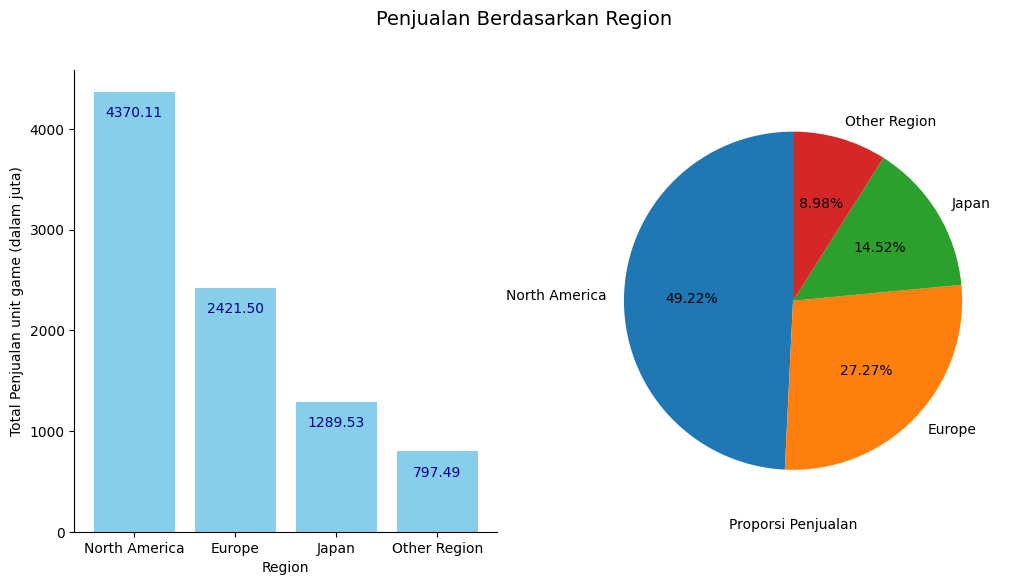

In [345]:
fig, (ax_left, ax_right) = plt.subplots(1,2, figsize=(12, 6))

# Barplot Penjualan per Region
ax_left.bar(Total_Penjualan['Region'], Total_Penjualan['Total Penjualan'], color='skyblue')
ax_left.set(
    xlabel='Region',
    ylabel='Total Penjualan unit game (dalam juta)'
)

for i in ax_left.patches:
    ax_left.text(
        i.get_x() + i.get_width()/2,    # Mengatur posisi x
        i.get_height() - 250,   # Mengatur posisi y
        f'{i.get_height():.2f}',           # teks yang ditampilkan
        color='darkblue',                      # mengatur warna
        fontsize=10,                        # mengatur ukuran huruf
        ha='center'
            )

despine(ax_left)

ax_right.pie(
    data=Total_Penjualan,
    x='Proporsi (%)',
    labels='Region',
    startangle=90,
    autopct='%1.2f%%')
ax_right.set(
    xlabel='Proporsi Penjualan'
)

fig.suptitle('Penjualan Berdasarkan Region', fontsize=14)

plt.show()

In [346]:
Global = Total_Penjualan['Total Penjualan'].sum()
print('Total penjualan secara global:', Global)

Total penjualan secara global: 8878.63


> Dari grafik di atas, total keseluruhan (Global) penjualan lebih dari 8,8 miliar unit game, kita tahu bahwa penjualan terbesar berada di region _North America_ (49.22%) dan diikuti oleh _Europe_ (27.27%), _Japan_ (14.52%), dan _Other Region_ (8.98%). Artinya penjualan game di region North America lebih menguntungkan dibandingkan dengan region lain.

##### North America

Yang menjadi pertanyaan adalah `'apakah penjualan game di North America mempengaruhi penjualan game secara global?'`. Untuk menjawab pertanyaan ini perlu diuji secara statistik apakah penjualan di North America signifikan terhadap penjualan global

`Ho`: Penjualan game di region North America tidak signifikan terhadap penjualan game secara global

`Ha`: Penjualan game di region North America signifikan terhadap penjualan game secara global

In [347]:
# Uji Statistik
from scipy.stats import spearmanr

r, pvalue = spearmanr(df['NA_Sales'], df['Global_Sales'])
print('Koefisien korelasi:', f'{r:.3f}')
print('Nilai p-value     :', pvalue)

Koefisien korelasi: 0.794
Nilai p-value     : 0.0


In [348]:
# Uji Hipotesis
alpha = 0.05

if pvalue > alpha:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue >= {alpha}
        Fail to Reject Ho
        Kita tidak punya cukup bukti untuk mengatakan bahwa penjualan game di region North America signifikan terhadap penjualan game secara global (dependent).
          ''')
else:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue <= {alpha}
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region North America signifikan terhadap penjualan game secara global.
        ''')


        pvalue = 0.00000. pvalue <= 0.05
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region North America signifikan terhadap penjualan game secara global.
        


Karena `NA_Sales` dan `Global_Sales` adalah variabel numerik, lalu keduanya tidak berdistribusi normal, maka untuk uji statistik digunakan metode `Spearman`. Dari pengujian tersebut didapatkan koefisien korelasi `0.794` yang artinya tingkat _dependency_-nya (korelasi) penjualan game di region _North America_ terhadap penjualan game secara global itu `Kuat`. Argumen ini didukung dengan uji hipotesis dengan tingkat kepercayaan 95%(alpha = 0.05) dan nilai p-value (0.0), karena nilai p-value-nya lebih kecil daripada nilai alpha-nya, artinya Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region _North America_ signifikan terhadap penjualan game secara global

##### Lalu `apakah wilayah lain juga signifikan terhadap penjualan secara global?`

Untuk menjawab pertanyaan ini kita bisa melihat grafik heatmap berikut.

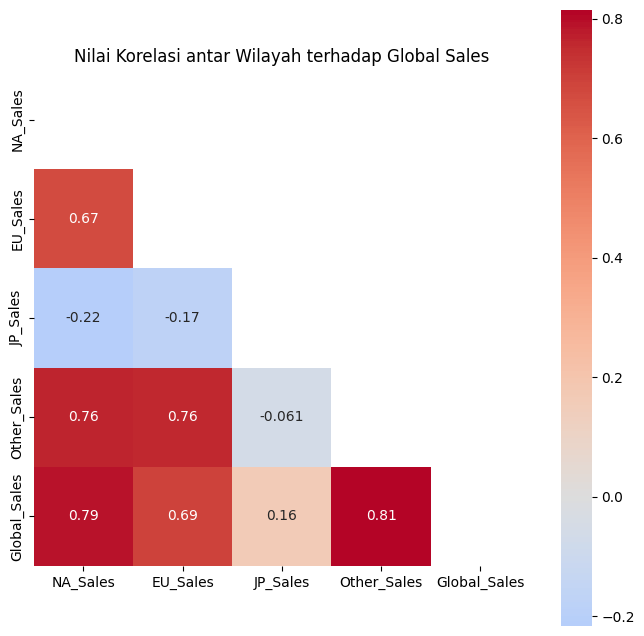

In [349]:
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(method='spearman')

plt.figure(figsize=(8,8))
matrix = np.triu(correlation_matrix)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, mask=matrix)
plt.title('Nilai Korelasi antar Wilayah terhadap Global Sales')
plt.show()

#### Other Region

In [350]:
# Uji Statistik Other Sales dan Global Sales
r, pvalue = spearmanr(df['Other_Sales'], df['Global_Sales'])
print('Koefisien korelasi:', f'{r:.3f}')
print('Nilai p-value     :', pvalue)

Koefisien korelasi: 0.814
Nilai p-value     : 0.0


Dari grafik heatmap di atas terlihat bahwa `Other_Sales` memiliki nilai koefisien korelasi yang paling tinggi, hal ini dianggap wajar karena selain region _North America_, _Europe_, ataupun _Japan_ terdapat region lain:
- _Asia_ (Rusia, China, India, dll.);
- _Oceania_ (Australia, Papua Nugini, New Zealand, dll.);
- _Africa_ (Mesir, Etiopia, Nigeria, dll.);
- _South America_(Argentina, Bolivia, Brazil, dll.)

Dilihat dari geografis dan jumlah populasi penduduknya (pada _Other Region_) bisa lebih besar dibanding ketiga wilayah yang sebelumnya disebutkan. Walaupun begitu kita tidak tahu pasti persebaran data penjualan _game_-nya bagaimana, sehingga kita tidak dapat menganalisis lebih lanjut. Namun, kita bisa menganalisis wilayah selain _North America_ (_Europe_ & _Japan_).

#### _Europe_

`Ho`: Penjualan game di region _Europe_ tidak signifikan terhadap penjualan game secara global

`Ha`: Penjualan game di region _Europe_ signifikan terhadap penjualan game secara global

In [351]:
# Uji Statistik Europe Sales dan Global Sales
r, pvalue = spearmanr(df['EU_Sales'], df['Global_Sales'])
print('Koefisien korelasi:', f'{r:.3f}')
print('Nilai p-value     :', pvalue)

Koefisien korelasi: 0.695
Nilai p-value     : 0.0


In [352]:
# Uji Hipotesis
alpha = 0.05

if pvalue > alpha:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue >= {alpha}
        Fail to Reject Ho
        Kita tidak punya cukup bukti untuk mengatakan bahwa penjualan game di region Europe signifikan terhadap penjualan game secara global (dependent).
          ''')
else:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue <= {alpha}
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region Europe signifikan terhadap penjualan game secara global.
        ''')


        pvalue = 0.00000. pvalue <= 0.05
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region Europe signifikan terhadap penjualan game secara global.
        


Hasil uji hipotesis menunjukkan bahwa penjualan game di region Europe signifikan terhadap penjualan game secara global, hal ini didasari dengan koefisien korelasi spearman pada nilai `0.695`, nilai ini masih menunjukkan bahwa tingkat korelasinya `kuat`. Artinya selain penjualan game di region _North America_, penjualan game region _Europe_ juga berperan andil dalam penjualan game secara global.

#### _Japan_

`Ho`: Penjualan game di region _Japan_ tidak signifikan terhadap penjualan game secara global

`Ha`: Penjualan game di region _Japan_ signifikan terhadap penjualan game secara global

In [353]:
# Uji Statistik Japan Sales dan Global Sales
r, pvalue = spearmanr(df['JP_Sales'], df['Global_Sales'])
print('Koefisien korelasi:', f'{r:.3f}')
print('Nilai p-value     :', pvalue)

Koefisien korelasi: 0.163
Nilai p-value     : 1.1723365645890408e-98


In [354]:
# Uji Hipotesis
alpha = 0.05

if pvalue > alpha:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue >= {alpha}
        Fail to Reject Ho
        Kita tidak punya cukup bukti untuk mengatakan bahwa penjualan game di region Japan signifikan terhadap penjualan game secara global (dependent).
          ''')
else:
    print(f'''
        pvalue = {pvalue:.5f}. pvalue <= {alpha}
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region Japan signifikan terhadap penjualan game secara global.
        ''')


        pvalue = 0.00000. pvalue <= 0.05
        Reject Ho
        Kita punya cukup bukti untuk mengatakan bahwa penjualan game di region Japan signifikan terhadap penjualan game secara global.
        


Koefisien korelasi antara _Japan Sales_ dan _Global Sales_ berada pada nilai `0.163`, artinya korelasi antar keduanya `Sangat Lemah`. Tetapi yang mengejutkannya adalah nilai __p-value__ lebih rendah dari pada __alpha__-nya `(1,172e-98 < 0.05)`, sehingga kita masih memiliki bukti bahwa penjualan game di region _Japan_ signifikan terhadap penjualan game secara global walaupun korelasinya sangat lemahl.

> Kesimpulan: Semakin tinggi penjualan di wilayah NA, EU, JP, maka semakin tinggi pula penjualan secara global. Hal ini didasari pada nilai koefisien korelasi pada wilayah-wilayah tersebut terhadap penjualan secara global bernilai positif.

### **2. Berdasarkan `'Genre'`**

In [355]:
ByGenre = df.groupby('Genre', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('NA_Sales', ascending=False)
ByGenre

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0         Action    873.97    521.20    159.31       187.26       1741.74
10        Sports    678.19    376.31    135.08       134.88       1324.46
8        Shooter    581.64    312.12     38.20       102.69       1034.65
4       Platform    444.28    200.31    130.77        51.57        826.93
3           Misc    408.44    215.72    107.46        75.31        806.93
6         Racing    357.49    237.92     56.80        77.26        729.47
7   Role-Playing    325.64    186.92    351.90        59.59        924.05
2       Fighting    222.15    101.09     87.35        36.66        447.25
9     Simulation    181.25    112.57     63.65        31.49        388.96
5         Puzzle    122.70     49.59     57.08        12.55        241.92
1      Adventure    105.66     63.28     52.07        16.86        237.87
11      Strategy     68.70     44.47     49.86        11.37        174.40

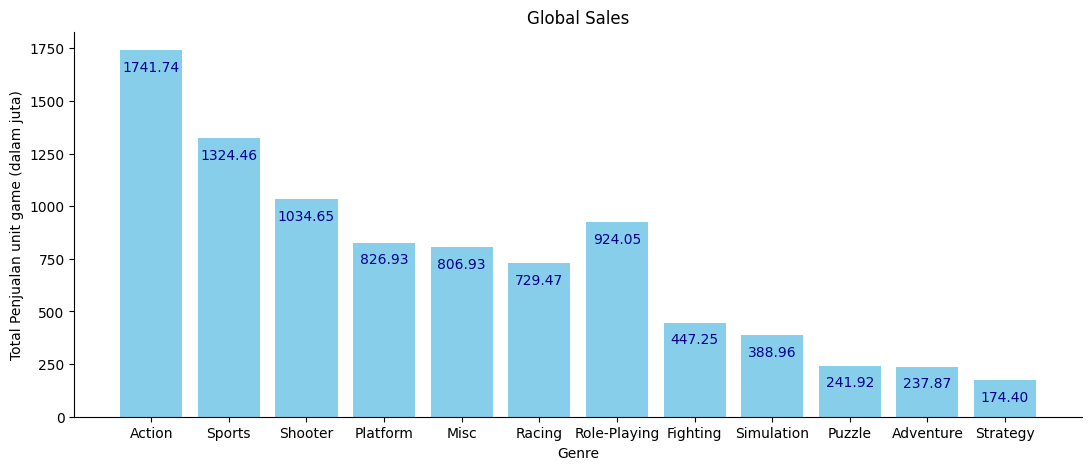

In [356]:
# Figure untuk Sales Wilayah berdasarkan Genre
fig = make_subplots(
    rows=2,                     # jumlah baris pada figure
    cols=2,                     # jumlah kolom pada figure
    x_title='Genre',
    y_title='Total Penjualan Unit Game (dalam juta)',
    subplot_titles=['North America', 'Europe', 'Japan', 'Other Sales']
)

# Membuat barplot region North America
NA_barplot = go.Bar(
    x=ByGenre['Genre'],     # Sumbu-x
    y=ByGenre['NA_Sales'],  # Sumbu-y
    orientation='v',        # Orientasi dari vertikal menjadi horizontal (by default vertikal)
    name='North America',   # label
    hoverinfo='all'         # menampilkan semua info saat di-hover
)

# Membuat barplot region Europe
EU_barplot = go.Bar(
    x=ByGenre['Genre'],     # Sumbu-x
    y=ByGenre['EU_Sales'],  # Sumbu-y
    orientation='v',        # Orientasi dari vertikal menjadi horizontal (by default vertikal)
    name='Europe',          # label
    hoverinfo='all'         # menampilkan semua info saat di-hover
)

# Membuat barplot region Japan
JP_barplot = go.Bar(
    x=ByGenre['Genre'],     # Sumbu-x
    y=ByGenre['JP_Sales'],  # Sumbu-y
    orientation='v',        # Orientasi dari vertikal menjadi horizontal (by default vertikal)
    name='Japan',           # label
    hoverinfo='all'         # menampilkan semua info saat di-hover
)

# Membuat barplot Other Region
Other_barplot = go.Bar(
    x=ByGenre['Genre'],         # Sumbu-x
    y=ByGenre['Other_Sales'],   # Sumbu-y
    orientation='v',            # Orientasi dari vertikal menjadi horizontal (by default vertikal)
    name='Other Region',        # label
    hoverinfo='all'             # menampilkan semua info saat di-hover
)

# Menambahkan barplot North America ke dalam figure
fig.add_trace(NA_barplot, 1, 1)

# Menambahkan barplot Europe ke dalam figure
fig.add_trace(EU_barplot, 1, 2)

# Menambahkan barplot Japan ke dalam figure
fig.add_trace(JP_barplot, 2, 1)

# Menambahkan barplot Other Region ke dalam figure
fig.add_trace(Other_barplot, 2, 2)

fig.update_layout(
    title={
        'text': 'Total Penjualan Berdasarkan Genre',
        'x': 0.5,  # Posisi judul di tengah (nilai 0-1, relatif terhadap lebar figure)
        'y': 0.95,  # Posisi judul di atas (nilai 0-1, relatif terhadap tinggi figure)
        'xanchor': 'center',
        'yanchor': 'top'
    },
    hoverlabel=dict(
        bgcolor='white',
        font_size=16,
        font_family='Rockwell'
    )
)

#==========================================================================================================
# Figure untuk Global Sales
fig2, ax = plt.subplots(figsize=(13, 5))

# Barplot Penjualan Global
ax.bar(ByGenre['Genre'], ByGenre['Global_Sales'], color='skyblue')
ax.set(
    title='Global Sales',
    xlabel='Genre',
    ylabel='Total Penjualan unit game (dalam juta)'
)

for i in ax.patches:
    ax.text(
        i.get_x() + i.get_width()/2,    # Mengatur posisi x
        i.get_height() - 100,   # Mengatur posisi y
        f'{i.get_height():.2f}',           # teks yang ditampilkan
        color='darkblue',                      # mengatur warna
        fontsize=10,                        # mengatur ukuran huruf
        ha='center'
            )

despine(ax)

display(fig)

Setelah diperhatikan dari tabel dan grafik di atas, genre yang paling banyak diminati secara global adalah `Action` diikuti oleh `Sports` dan `Shooter`. Uniknya di pasar Jepang genre yang paling diminati adalah `Role-Playing`.



Jika kita mencari detail secara mendalam tentang dunia _game_ di Jepang, salah satu yang paling laris dan populer di sana adalah Pokemon yang bergenre `Role-Playing` tersebar di berbagai platform seperti Nintendo 64(`N64`), Game Boy Advance (`GBA`), Game Cube (`GC`), Nintendo DS (`DS`), Nintendo 3DS (`3DS`), Wii, Wii-U, sampai ke Nintendo Switch konsol _handheld_ yang paling baru. Platform-platform tersebut berasal dari 1 perusahaan yang sama dari Jepang yaitu `Nintendo`, bahkan seri _game_ Pokemon itu sendiri diterbitkan oleh Nintendo, alhasil game ini menjadi sangat populer sampai sekarang di Jepang.



Peminatan _game_ berdasarkan genre dari setiap wilayah cukup variatif sehingga `apakah genre-genre yang ada itu memengaruhi penjualan _game_ wilayah/region ataupun secara global?` maka akan dilakukan pengujian statistik untuk menjawab pertanyaan itu. Dikarenakan data terkait tidak berdistribusi normal maka digunakan metode Kruskal-Wallis untuk mengecek apakah median dari setiap genre sama atau tidak.

#### Median Global Sales by Genre

- `Ho`: Secara global median untuk setiap genre adalah sama
- `Ha`: Secara global minimal ada 1 genre yang berbeda mediannya

In [357]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
        df[df['Genre']=='Platform']['Global_Sales'],
        df[df['Genre']=='Shooter']['Global_Sales'],
        df[df['Genre']=='Sports']['Global_Sales'],
        df[df['Genre']=='Action']['Global_Sales'],
        df[df['Genre']=='Racing']['Global_Sales'],
        df[df['Genre']=='Fighting']['Global_Sales'],
        df[df['Genre']=='Misc']['Global_Sales'],
        df[df['Genre']=='Simulation']['Global_Sales'],
        df[df['Genre']=='Puzzle']['Global_Sales'],
        df[df['Genre']=='Role-Playing']['Global_Sales'],
        df[df['Genre']=='Adventure']['Global_Sales'],
        df[df['Genre']=='Strategy']['Global_Sales']
)

print(f"Kruskal-Wallis stat: {stat}")
print(f"p-value            : {pvalue}")

Kruskal-Wallis stat: 955.2041995079677
p-value            : 8.33849065004093e-198


In [358]:
alpha = 0.05

if pvalue > alpha:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= {alpha}
          Fail to Reject Ho
          Kita tidak punya cukup bukti untuk mengatakan bahwa secara global minimal ada 1 genre yang mediannya berbeda.
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= {alpha}
          Reject Ho
          Kita punya cukup bukti untuk mengatakan bahwa secara global minimal ada 1 genre yang mediannya berbeda.
          ''')


          pvalue = 0.00000. pvalue <= 0.05
          Reject Ho
          Kita punya cukup bukti untuk mengatakan bahwa secara global minimal ada 1 genre yang mediannya berbeda.
          


Dari hasil uji hipotesis, penjualan game secara global memiliki nilai `pvalue` yang lebih rendah dibandingkan dengan `alpha`-nya, kita bisa simpulkan bahwa distribusi data atau `Measure of Central Tendency` penjualan game berdasarkan genre tidak sama satu dengan lainnya, atau setidaknya satu genre memiliki nilai tengah (median) yang cukup berbeda sehingga perbedaan ini tidak mungkin terjadi secara kebetulan.

#### Median North America Sales by Genre

In [359]:
stat, pvalue = kruskal(
        df[df['Genre']=='Platform']['NA_Sales'],
        df[df['Genre']=='Shooter']['NA_Sales'],
        df[df['Genre']=='Sports']['NA_Sales'],
        df[df['Genre']=='Action']['NA_Sales'],
        df[df['Genre']=='Racing']['NA_Sales'],
        df[df['Genre']=='Fighting']['NA_Sales'],
        df[df['Genre']=='Misc']['NA_Sales'],
        df[df['Genre']=='Simulation']['NA_Sales'],
        df[df['Genre']=='Puzzle']['NA_Sales'],
        df[df['Genre']=='Role-Playing']['NA_Sales'],
        df[df['Genre']=='Adventure']['NA_Sales'],
        df[df['Genre']=='Strategy']['NA_Sales']
)

print(f"Kruskal-Wallis stat: {stat}")
print(f"p-value            : {pvalue}")

Kruskal-Wallis stat: 1313.3741035766154
p-value            : 5.843526854131511e-275


In [360]:
alpha = 0.05

if pvalue > alpha:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= {alpha}
          Fail to Reject Ho
          Kita tidak punya cukup bukti untuk mengatakan bahwa minimal ada 1 genre yang mediannya di region North America berbeda
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= {alpha}
          Reject Ho
          Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 genre yang mediannya di region North America berbeda
          ''')


          pvalue = 0.00000. pvalue <= 0.05
          Reject Ho
          Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 genre yang mediannya di region North America berbeda
          


#### Median Europe Sales by Genre

In [361]:
stat, pvalue = kruskal(
        df[df['Genre']=='Platform']['EU_Sales'],
        df[df['Genre']=='Shooter']['EU_Sales'],
        df[df['Genre']=='Sports']['EU_Sales'],
        df[df['Genre']=='Action']['EU_Sales'],
        df[df['Genre']=='Racing']['EU_Sales'],
        df[df['Genre']=='Fighting']['EU_Sales'],
        df[df['Genre']=='Misc']['EU_Sales'],
        df[df['Genre']=='Simulation']['EU_Sales'],
        df[df['Genre']=='Puzzle']['EU_Sales'],
        df[df['Genre']=='Role-Playing']['EU_Sales'],
        df[df['Genre']=='Adventure']['EU_Sales'],
        df[df['Genre']=='Strategy']['EU_Sales']
)

print(f"Kruskal-Wallis stat: {stat}")
print(f"p-value            : {pvalue}")

Kruskal-Wallis stat: 1132.7947960784563
p-value            : 4.902102463732629e-236


#### Median Japan Sales by Genre

In [362]:
stat, pvalue = kruskal(
        df[df['Genre']=='Platform']['JP_Sales'],
        df[df['Genre']=='Shooter']['JP_Sales'],
        df[df['Genre']=='Sports']['JP_Sales'],
        df[df['Genre']=='Action']['JP_Sales'],
        df[df['Genre']=='Racing']['JP_Sales'],
        df[df['Genre']=='Fighting']['JP_Sales'],
        df[df['Genre']=='Misc']['JP_Sales'],
        df[df['Genre']=='Simulation']['JP_Sales'],
        df[df['Genre']=='Puzzle']['JP_Sales'],
        df[df['Genre']=='Role-Playing']['JP_Sales'],
        df[df['Genre']=='Adventure']['JP_Sales'],
        df[df['Genre']=='Strategy']['JP_Sales']
)

print(f"Kruskal-Wallis stat: {stat}")
print(f"p-value            : {pvalue}")

Kruskal-Wallis stat: 1547.8337336010602
p-value            : 0.0


#### Median Other Sales by Genre

In [363]:
stat, pvalue = kruskal(
        df[df['Genre']=='Platform']['Other_Sales'],
        df[df['Genre']=='Shooter']['Other_Sales'],
        df[df['Genre']=='Sports']['Other_Sales'],
        df[df['Genre']=='Action']['Other_Sales'],
        df[df['Genre']=='Racing']['Other_Sales'],
        df[df['Genre']=='Fighting']['Other_Sales'],
        df[df['Genre']=='Misc']['Other_Sales'],
        df[df['Genre']=='Simulation']['Other_Sales'],
        df[df['Genre']=='Puzzle']['Other_Sales'],
        df[df['Genre']=='Role-Playing']['Other_Sales'],
        df[df['Genre']=='Adventure']['Other_Sales'],
        df[df['Genre']=='Strategy']['Other_Sales']
)

print(f"Kruskal-Wallis stat: {stat}")
print(f"p-value            : {pvalue}")

Kruskal-Wallis stat: 760.4488661136229
p-value            : 5.849341536992745e-156


Dengan tingkat kepercayaan 95%, bila kita perhatikan di setiap wilayah, nilai p-value-nya terlampau kecil (lebih rendah dibandingkan dengan alpha). Artinya `Measure of Central Tendency` dari setiap genre dan setiap wilayah itu berbeda, atau minimal ada 1 genre yang cukup berbeda dengan yang lain. Artinya ada hubungan antara genre dan penjualan game secara global maupun di setiap wilayah, atau minimal 1 genre yang dapat memengaruhi penjualan game di setiap wilayah sehingga memengaruhi penjualan secara global.

### **3. Berdasarkan `'Platform'`**



Akan dilakukan analisis bagaimana pengaruh `'Platform'` permainan terhadap *sales* dari permainan. Beberapa persoalan yang akan dijawab:

* Apakah penggunaan `'Platform'` yang berbeda berpengaruh terhadap volume penjualan permainan?
* Bagaimana hubungan antara usia `'Platform'` saat permainan *publish* dengan penjualan permainan?
* Bagaimana hubungan antara jumlah permainan `'Name'` yang sama menggunakan beberapa `'Platform'` sekaligus dengan volume penjualan permainan?

Secara umum, berikut adalah grafik jenis `'Platform'` dengan **total** volume sales untuk masing-masing region.

In [364]:
gbPlatform = df.groupby('Platform', as_index=False).agg(
    sum_NA_Sales=('NA_Sales', 'sum'),
    sum_EU_Sales=('EU_Sales', 'sum'),
    sum_JP_Sales=('JP_Sales', 'sum'),
    sum_Other_Sales=('Other_Sales', 'sum'),
    sum_Global_Sales=('Global_Sales', 'sum'),
)
gbPlatform.head()

Platform  sum_NA_Sales  sum_EU_Sales  sum_JP_Sales  sum_Other_Sales  \
0         3DO          0.00          0.00          0.10             0.00   
1         3DS         78.87         57.57         97.35            12.63   
2  Atari 2600         90.25          5.47          0.00             0.91   
3          DC          5.43          1.69          8.56             0.27   
4          DS        388.38        194.21        175.56            60.51   

   sum_Global_Sales  
0              0.10  
1            246.42  
2             96.63  
3             15.95  
4            818.66

In [365]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width()+5, y + bar.get_height()/2, f'{bar.get_width():.2f} ',
            va='center', ha='left', color='black'
        )
    return ax

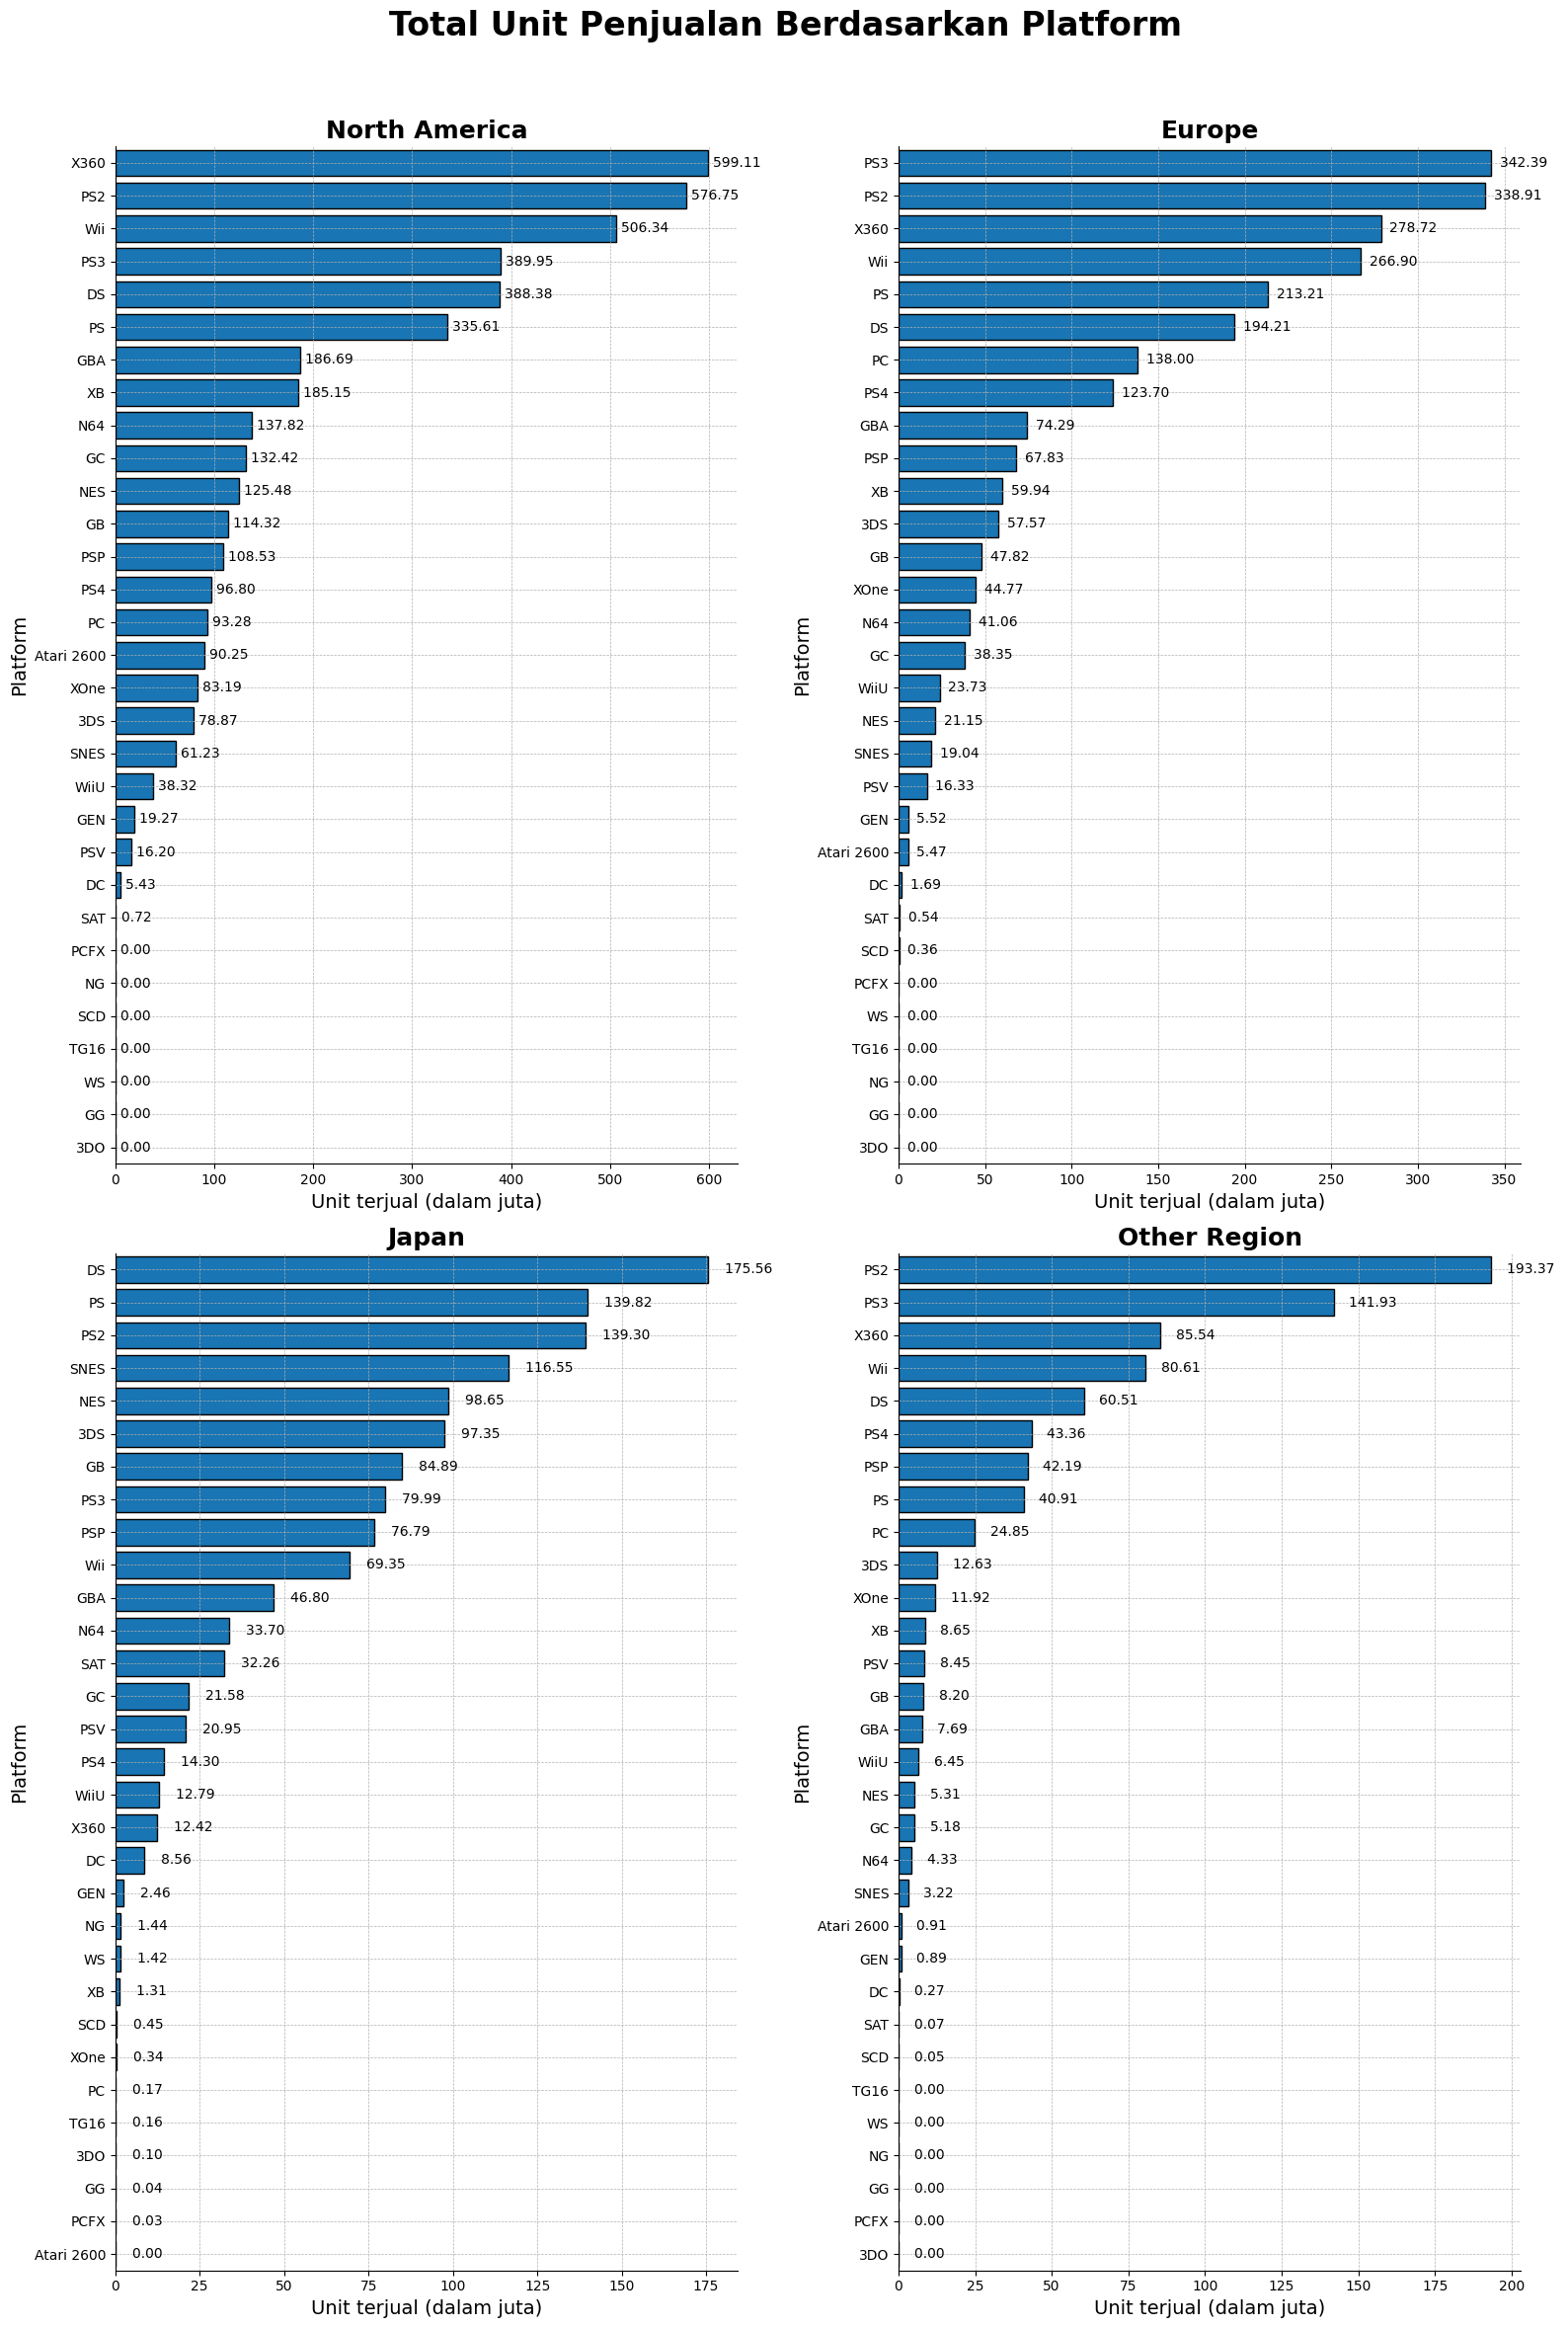

In [366]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 24))
neutral_color = '#007ACC'

sns.barplot(
    data=gbPlatform.sort_values('sum_NA_Sales', ascending=False),
    y='Platform',
    x='sum_NA_Sales',
    ax=axes[0, 0],
    color=neutral_color,
    edgecolor='black'
)

sns.barplot(
    data=gbPlatform.sort_values('sum_EU_Sales', ascending=False),
    y='Platform',
    x='sum_EU_Sales',
    ax=axes[0, 1],
    color=neutral_color,
    edgecolor='black'
)

sns.barplot(
    data=gbPlatform.sort_values('sum_JP_Sales', ascending=False),
    y='Platform',
    x='sum_JP_Sales',
    ax=axes[1, 0],
    color=neutral_color,
    edgecolor='black'
)

sns.barplot(
    data=gbPlatform.sort_values('sum_Other_Sales', ascending=False),
    y='Platform',
    x='sum_Other_Sales',
    ax=axes[1, 1],
    color=neutral_color,
    edgecolor='black'
)

titles = ['North America', 'Europe', 'Japan', 'Other Region']
for ax, title in zip(axes.flat, titles):
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel('Unit terjual (dalam juta)', fontsize=14)
    ax.set_ylabel('Platform', fontsize=14)
    despine(ax)
    annotate_bars(ax)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.suptitle('Total Unit Penjualan Berdasarkan Platform', fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [367]:
fig = make_subplots(
    rows=1,
    cols=1,
    x_title='Unit Terjual (dalam juta)',
    y_title='Platform',
    subplot_titles=['Global']
)

globalBar = go.Bar(
    x=gbPlatform.sort_values('sum_Global_Sales', ascending=True)['sum_Global_Sales'],
    y=gbPlatform.sort_values('sum_Global_Sales', ascending=True)['Platform'],
    orientation='h',
    name='Global Sales',
    hoverinfo='all'
)

fig.add_trace(globalBar, 1, 1)
fig.update_layout(height=800)
fig

Berdasarkan data dan grafik diatas, dapat dilihat bahwa game dengan volume penjualan tertinggi secara global menggunakan `Platform` secara berurutan yaitu `PS2`, `X360`, dan `PS3`. Masing-masing **region** memiliki top `Platform` dalam volume penjualan yang berbeda-beda. Untuk **region** Amerika Utara, Eropa, Jepang, dan Region lainnya secara berurutan adalah `X360`, `PS3`, `DS`, dan `PS2`.

Berdasarkan data dan grafik diatas, dapat ditentukan solusi dari persoalan *`Apakah penggunaan 'Platform' yang berbeda berpengaruh terhadap volume penjualan permainan?`*. Hal ini dikarenakan pada seluruh region terdapat data dengan volume penjualan paling rendah **dibawah 100,000 unit** *(sesuai dengan asumsi awal, data 0.0 juta unit menandakan volume penjualan dibawah 100,000 unit TETAPI TIDAK HARUS 0 unit)* dan volume penjualan tertinggi setidaknya sebanyak **170 juta unit**. Berdasarkan hal tersebut, perbedaan nilai yang sangat signifikan ini menandakan bahwa **penggunaan 'Platform' yang berbeda berpengaruh terhadap volume penjualan permainan** untuk seluruh region yang dikonsiderasi.

Selain menjawab persoalan tersebut menggunakan data **total volume penjualan tiap-tiap 'Platform'**, dapat dilakukan pengujian secara statistik dengan nilai ***Measure of Central Tendency***. Berdasarkan uji normalitas yang telah dilakukan pada sub-bab sebelumnya, didapat persebaran data volume penjualan **tidak terdistribusi normal** sehingga digunakan nilai **median** dalam uji statistik. Data yang akan diuji statistik merupakan data numerikal(volume penjualan) dan kategorikal(`Platform`) yang memiliki lebih dari 3 level/grup. Oleh karena itu, dilakukan uji statistik **`Kruskal-Walis test`** dengan rincian:

* `H0`: Median dari volume penjualan tiap unit adalah **sama**
* `H1`: Minimal ada 1 kelompok yang **berbeda** median volume penjualannya. Tetapi kita tidak tahu yang mana.

Akan dilakukan uji **`Kruskal-Walis test`** untuk tiap-tiap region.

In [368]:
# Menentukan unique values dari platform
plUnique = df['Platform'].unique()

# Meng-ekstrak value volume sales di tiap-tiap region berdasarkan platform
plNA_Sales = [df[df['Platform'] == p]['NA_Sales'] for p in plUnique]
plEU_Sales = [df[df['Platform'] == p]['EU_Sales'] for p in plUnique]
plJP_Sales = [df[df['Platform'] == p]['JP_Sales'] for p in plUnique]
plOther_Sales = [df[df['Platform'] == p]['Other_Sales'] for p in plUnique]
plGlobal_Sales = [df[df['Platform'] == p]['Global_Sales'] for p in plUnique]

# UJI KRUSKAL WALIS UNTUK REGION NORTH AMERICA
statsNA, pvalueNA = kruskal(*plNA_Sales)

# UJI KRUSKAL WALIS UNTUK REGION EROPA
statsEU, pvalueEU = kruskal(*plEU_Sales)

# UJI KRUSKAL WALIS UNTUK REGION JEPANG
statsJP, pvalueJP = kruskal(*plJP_Sales)

# UJI KRUSKAL WALIS UNTUK REGION OTHER REGION
statsOther, pvalueOther = kruskal(*plOther_Sales)

# UJI KRUSKAL WALIS UNTUK REGION GLOBAL
statsGlobal, pvalueGlobal = kruskal(*plGlobal_Sales)

alpha = 0.05
stats = [f'{statsNA:.2f}', f'{statsEU:.2f}', f'{statsJP:.2f}', f'{statsOther:.2f}', f'{statsGlobal:.2f}']
pvalues = [pvalueNA, pvalueEU, pvalueJP, pvalueOther, pvalueGlobal]
results = [f'P-Value ({i}) > alpha ({alpha}) FAIL TO REJECT H0' if i > alpha else f'P-Value ({i}) <= alpha (0.05) REJECT H0' for i in pvalues]
summ = ['kita TIDAK punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang BERBEDA median volume penjualannya.' if i > alpha else 'Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.' for i in pvalues]

plKruskal = pd.DataFrame(
    data={
        'Region': ['North America', 'Europe', 'Japan', 'Other', 'Global'],
        'Kruskal-Wallis stat': stats,
        'P-Value': pvalues,
        'Hasil': results,
        'Kesimpulan': summ
    },
    columns=['Region', 'Kruskal-Wallis stat', 'P-Value', 'Hasil', 'Kesimpulan']
)
plKruskal

Region Kruskal-Wallis stat  P-Value  \
0  North America             2863.35      0.0   
1         Europe             2809.14      0.0   
2          Japan             4082.81      0.0   
3          Other             2911.85      0.0   
4         Global             1947.47      0.0   

                                     Hasil  \
0  P-Value (0.0) <= alpha (0.05) REJECT H0   
1  P-Value (0.0) <= alpha (0.05) REJECT H0   
2  P-Value (0.0) <= alpha (0.05) REJECT H0   
3  P-Value (0.0) <= alpha (0.05) REJECT H0   
4  P-Value (0.0) <= alpha (0.05) REJECT H0   

                                                                                                                                        Kesimpulan  
0  Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.  
1  Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.  
2  Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.  
3  Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.  
4  Kita punya cukup bukti untuk mengatakan bahwa MINIMAL ada 1 kelompok yang berbeda median volume penjualannya. Tetapi kita tidak tahu yang mana.

Dari hasil uji hipotesis diatas, kelima region memiliki hasil P-Value yang lebih rendah dibandingkan dengan nilai `alpha`. Hal ini menandakan bahwa untuk kelima region, **minimal terdapat 1 kelompok `Platform` dengan nilai `median` dari volume penjualan yang nilainya berbeda**.

Berdasarkan analisis diatas, dapat timbul pertanyaan baru. Jika penggunaan `'Platform'` yang berbeda berpengaruh terhadap volume penjualan permainan, maka *bagaimana cara menentukan `'Platform'` yang sesuai agar diperoleh volume penjualan yang tinggi?* Persoalan tersebut akan memiliki banyak faktor yang dapat mempengaruhi tergantung dari aspek atau variabel yang ditinjau. Sebagai salah satu contoh, apabila persoalan tersebut ditinjau dari segi `total volume penjualan berdasarkan 'Platform'` akan merujuk pada `Platform PS2` untuk region global. Hal ini dikarenakan telah terbuktinya oleh data `PS2` memiliki total volume penjualan tertinggi yaitu sebesar `1,248 Juta` unit.

Perlu diketahui, dataset yang tersedia memiliki persebaran berdasarkan tahun *publish*nya permainan sebagai berikut.

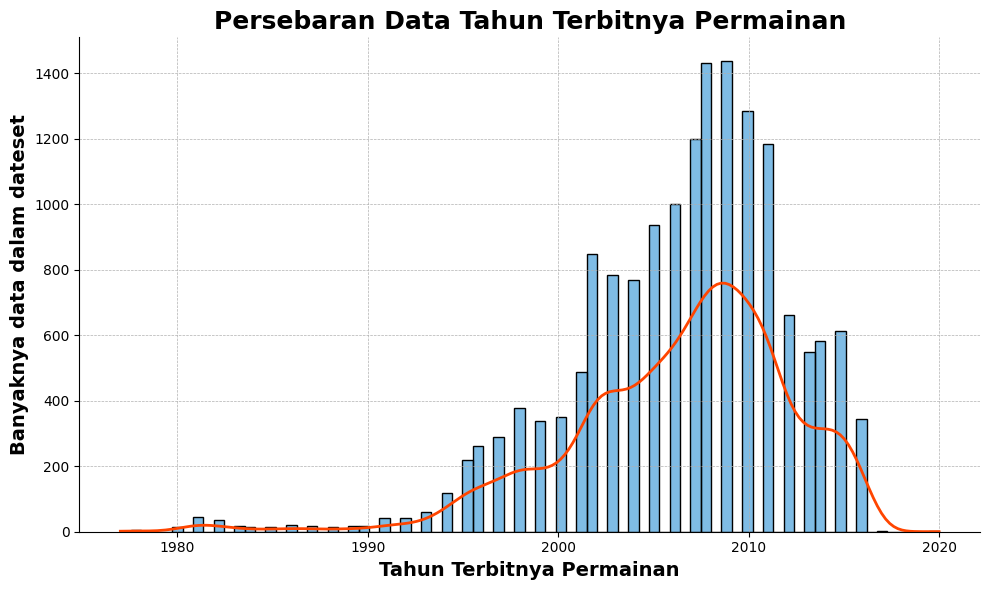

In [369]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x='Year',
    ax=ax,
    kde=True,
    color='#007ACC',
    edgecolor='black',
    linewidth=1
)

kde_line = ax.lines[0]
kde_line.set_color('#FF4500')
kde_line.set_linewidth(2)

ax.set(
    xlabel='Tahun Terbitnya Permainan',
    ylabel='Banyaknya data dalam dateset',
    title='Persebaran Data Tahun Terbitnya Permainan'
)

ax.set_xlabel('Tahun Terbitnya Permainan', fontsize=14, fontweight='bold')
ax.set_ylabel('Banyaknya data dalam dateset', fontsize=14, fontweight='bold')
ax.set_title('Persebaran Data Tahun Terbitnya Permainan', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)
plt.tight_layout()
plt.show()

Berdasarkan grafik dan data diatas, dapat dilihat bahwa data terbanyak terdapat pada rentang tahun 2007 - 2011. Meskipun rentang tahun tersebut tidak terlihat terlalu jauh jaraknya dengan tahun-tahun sekarang, `Platform` permainan yang berbasis teknologi digital sedang berkembang sangat pesat. Hal ini menyebabkan perlu dianalisis apakah dataset mentah tersebut masih relevan untuk tahun-tahun sekarang? sebagai salah satu contoh, platform `PS2` **telah berhenti diproduksi sejak tahun 2013** sehingga tidak memungkinkan platform `PS2` direkomendasikan sebagai platform yang sesuai untuk digunakan di tahun-tahun sekarang.

Salah satu metode yang dapat digunakan untuk merekomendasikan jenis `Platform` adalah dengan `membandingkan usia 'Platform' saat permainan dipublish dengan volume penjualan`. Dengan cara ini, dari dataset yang tersedia dapat disesuaikan kembali dengan platform-platform baru yang ada di tahun-tahun sekarang.

Akan dibentuk dataframe baru `dfPlatform` berupa salinan dataframe `df` agar tidak merusak dataframe utama.

In [370]:
dfPlatform = df.copy()
dfPlatform.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.83  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.38

Selanjutnya, akan ditambahkan dua kolom baru:
* `Year_Platform` : tahun *release* platform. Ditambahkan menggunakan fungsi yang telah didefinisikan sebelumnya saat data cleaning
* `Year_Difference` : `Year` - `Year_Platform` : usia `Platform` saat permainan di*publish*

In [371]:
dfPlatform['Year_Platform'] = dfPlatform.apply(platform_year, axis=1)
dfPlatform['Year_Difference'] = dfPlatform['Year'] - dfPlatform['Year_Platform']

dfPlatform.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Year_Platform  \
0     41.49     29.02      3.77         8.46         82.74           2006   
1     29.08      3.58      6.81         0.77         40.24           1983   
2     15.85     12.88      3.79         3.31         35.83           2006   
3     15.75     11.01      3.28         2.96         33.00           2006   
4     11.27      8.89     10.22         1.00         31.38           1989   

   Year_Difference  
0                0  
1                2  
2                2  
3                3  
4                7

Variabel `Year_Difference` dan `Global_Sales` merupakan data numerikal, akan dilakukan uji korelasi menggunakan metode `Spearman` untuk menentukan tingkat hubungan kedua variabel tersebut **menggunakan *raw data* atau *direct correlation calculation***

In [372]:
dfPlatform[['Year_Difference', 'Global_Sales']].corr(method='spearman', numeric_only=True)

Year_Difference  Global_Sales
Year_Difference         1.000000     -0.154352
Global_Sales           -0.154352      1.000000

Berdasarkan hasil uji korelasi diatas menggunakan data mentah, didapat nilai korelasi sebesar **-0.15**. Hal ini menandakan hubungan antara variabel `Year_Difference` dan `Global_Sales` merupakan hubungan yang negatif dan lemah. Dengan kata lain, **terdapat sedikit kecenderungan turunnya volume penjualan saat umur platform meningkat tetapi hubungan ini tidak kuat.**

Berikut adalah persebaran data `Global_Sales` dari tiap-tiap kelompok `Year_Difference`

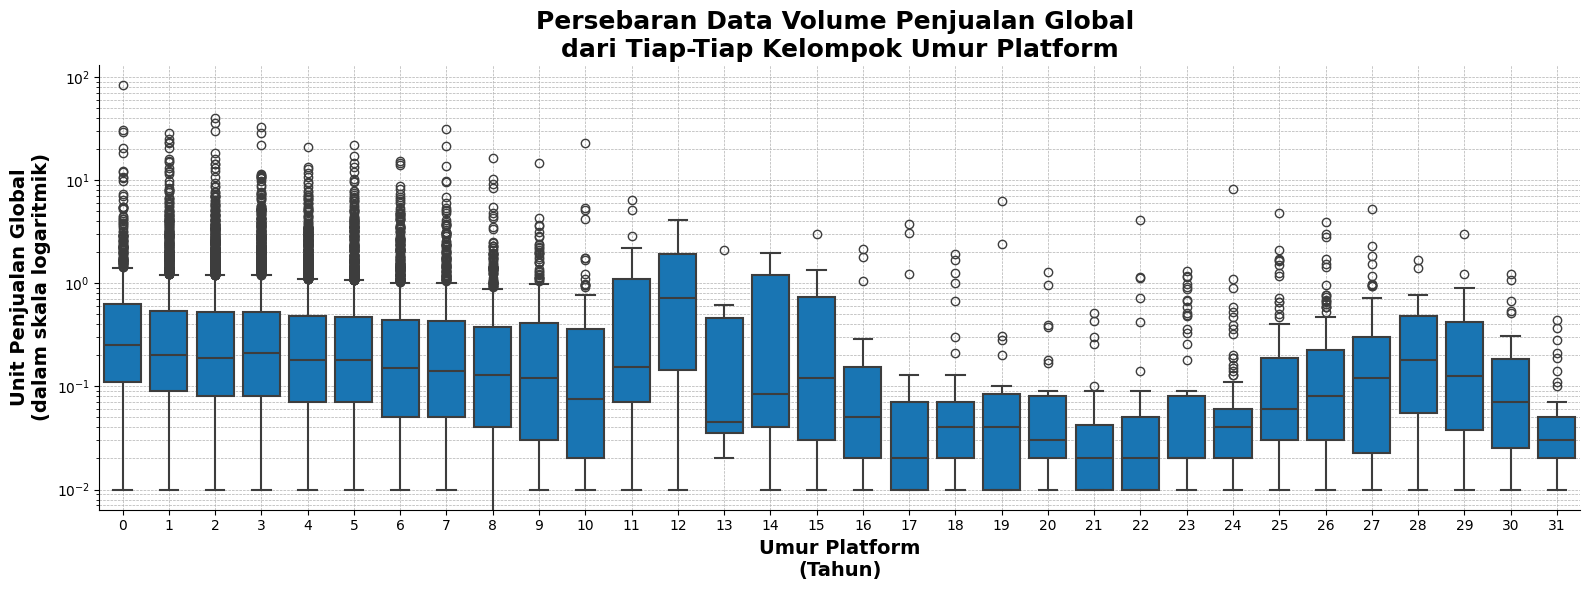

In [373]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(
    x='Year_Difference',
    y='Global_Sales',
    data=dfPlatform,
    color='#007ACC',
    linewidth=1.5
)

ax.set(
    yscale='log',
    xlabel='Umur Platform\n(Tahun)',
    ylabel='Unit Penjualan Global\n(dalam skala logaritmik)',
    title='Persebaran Data Volume Penjualan Global \ndari Tiap-Tiap Kelompok Umur Platform'
)

ax.set_xlabel('Umur Platform\n(Tahun)', fontsize=14, fontweight='bold')
ax.set_ylabel('Unit Penjualan Global\n(dalam skala logaritmik)', fontsize=14, fontweight='bold')
ax.set_title('Persebaran Data Volume Penjualan Global \ndari Tiap-Tiap Kelompok Umur Platform', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)

plt.tight_layout()
plt.show()

Dari grafik persebaran diatas, dapat dilihat banyaknya data *outlier* dari masing-masing kelompok umur `Platform` terutama untuk kelompok umur `Platform` 0 hingga 10 tahun. Dapat dilihat pula jarak dari nilai tertinggi data outlier ke data inliner yang sangat signifikan. Hasil perhitungan *direct correlation* menggunakan *raw data* diatas memperhitungkan variabilitas dan efek dari outlier untuk volume penjualan dari masing-masing individu permainan. Korelasi antar dua variabel tersebut juga dapat ditentukan dengan menggunakan median dari masing-masing kelompok umur platform. Metode dengan median ini menghilangkan efek variabilitas dan outlier volume penjualan dari masing-masing individu permainan sehingga tren keseluruhan atau yang lebih general dapat terlihat

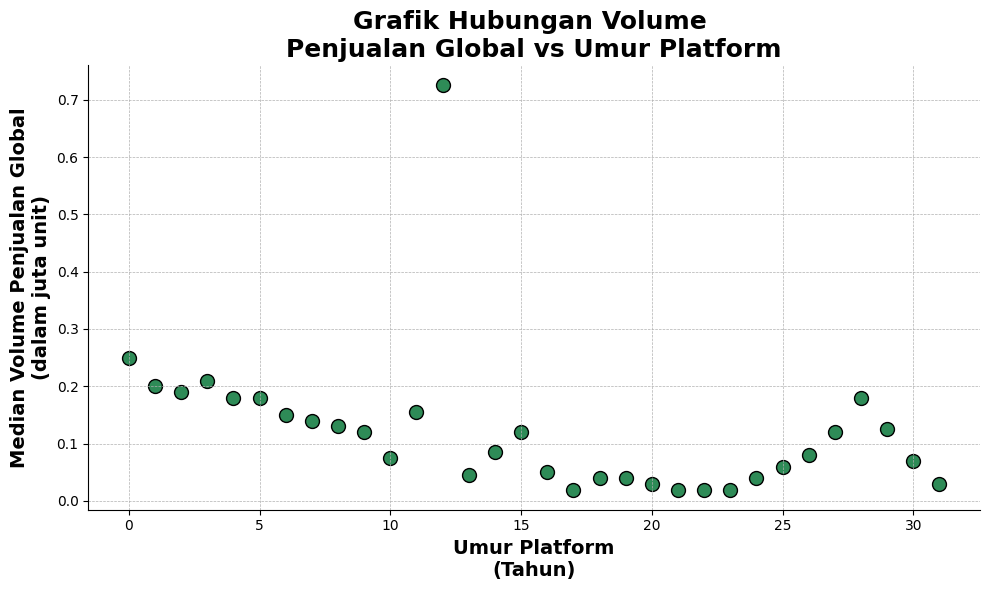

In [374]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=dfPlatform.groupby('Year_Difference', as_index=False)[['Global_Sales']].median(),
    x='Year_Difference',
    y='Global_Sales',
    ax=ax,
    color='#2E8B57',
    s=100,
    edgecolor='black',
    linewidth=1
)

ax.set(
    title='Grafik Hubungan Volume \nPenjualan Global vs Umur Platform',
    xlabel='Umur Platform\n(Tahun)',
    ylabel='Median Volume Penjualan Global\n(dalam juta unit)'
)

ax.set_xlabel('Umur Platform\n(Tahun)', fontsize=14, fontweight='bold')
ax.set_ylabel('Median Volume Penjualan Global\n(dalam juta unit)', fontsize=14, fontweight='bold')
ax.set_title('Grafik Hubungan Volume \nPenjualan Global vs Umur Platform', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)
plt.tight_layout()
plt.show()

Dapat ditentukan nilai korelasi dari median volume penjualan global dengan umur platform sebagai berikut.

In [375]:
dfPlatform.groupby('Year_Difference', as_index=False)[['Global_Sales']].median().corr(method='spearman',numeric_only=True)

Year_Difference  Global_Sales
Year_Difference         1.000000     -0.629995
Global_Sales           -0.629995      1.000000

Berdasarkan perhitungan korelasi menggunakan median volume penjualan dari masing-masing kelompok umur platform, dapat dikatakan bahwa korelasi antar kedua variabel tersebut **kuat dan negatif**. Dengan kata lain, saat umur platform bertambah nilai ***Measure of Central Tendency*** (median) dari volume penjualan global cenderung turun.

Hasil perhitungan korelasi dengan menggunakan `keseluruhan data` dan dengan menggunakan nilai `Measure of Central Tendency` menyimpulkan **dua hal yang berbeda** dan saling melengkapi. Berikut adalah kesimpulan yang bisa ditarik dari kedua metode yang digunakan.

In [376]:
summYear = pd.DataFrame(
    data={
        'Metode':['Individual Variability', 'Overall Trend'],
        'Variabel 1':['Umur platform', 'Umur platform'],
        'Variabel 2':['Keseluruhan data volume penjualan global', 'Median volume penjualan global'],
        'Nilai korelasi Spearman':[-0.15, -0.63],
        'Hasil':['Korelasi negatif lemah', 'Korelasi negatif kuat'],
        'Pembacaan':['Ada sedikit kecenderungan turunnya volume penjualan global saat umur platform meningkat', 'Ada kecenderungan besar turunnya median penjualan global saat umur platform meningkat']
    },
    columns=['Metode', 'Variabel 1', 'Variabel 2', 'Nilai korelasi Spearman', 'Hasil', 'Pembacaan'],
    index=[1, 2]
)

summYear

Metode     Variabel 1  \
1  Individual Variability  Umur platform   
2           Overall Trend  Umur platform   

                                 Variabel 2  Nilai korelasi Spearman  \
1  Keseluruhan data volume penjualan global                    -0.15   
2            Median volume penjualan global                    -0.63   

                    Hasil  \
1  Korelasi negatif lemah   
2   Korelasi negatif kuat   

                                                                                 Pembacaan  
1  Ada sedikit kecenderungan turunnya volume penjualan global saat umur platform meningkat  
2    Ada kecenderungan besar turunnya median penjualan global saat umur platform meningkat

> Dengan menggunakan kedua metode, didapat *insight* yang lebih komprehensif tentang hubungan antara perbedaan tahun dan penjualan global. Metode kedua menunjukkan bahwa secara **tren keseluruhan**, penjualan cenderung **menurun** seiring bertambahnya perbedaan tahun, menunjukkan bahwa game yang dirilis lebih lama setelah platform diluncurkan cenderung memiliki median penjualan volume yang lebih rendah. Sebaliknya, metode pertama mengkonsiderasi variabilitas tinggi dalam penjualan game individual, menunjukkan bahwa didapati **sedikit tren keseluruhan**, banyak faktor lain yang mempengaruhi penjualan setiap game.

> Hasil dari kedua metode ini saling melengkapi: analisis yang dikelompokkan (Metode 2) memberikan gambaran yang lebih jelas tentang bagaimana waktu perilisan game relatif terhadap platform mempengaruhi kinerja penjualan tipikal, sementara korelasi langsung (Metode 1) mengkonsiderasi variabilitas dan kompleksitas penjualan game individual. Secara bersamaan, wawasan ini dapat membantu dalam pemahaman dinamika penjualan game dalam kaitannya dengan waktu peluncuran platform.

Dari grafik diatas, dapat diamati terdapat *dua anomali* dari median volume penjualan global berdasarkan kelompok-kelompok umur platform:

1. Terdapat peningkatan median yang **sangat signifikan** pada umur platform 12 tahun.
2. Tren median untuk umur platform 22 hingga 28 tahun **terbalik**, menjadi **positif** atau tren naik dan kemudian turun kembali dari rentang umur platform 28 hingga 31 tahun.

Berikut adalah pembahasan temuan *anomali*

`1. Terdapat peningkatan median yang sangat signifikan pada umur platform 12 tahun.`

Berikut adalah data permainan dengan umur platform 12 tahun.

In [377]:
dfPlatform[dfPlatform['Year_Difference'] == 12].head()

Rank                                 Name Platform  Year      Genre  \
281   255                            Half-Life       PC  1997    Shooter   
635   479            Riven: The Sequel to Myst       PC  1997  Adventure   
648   484                       Theme Hospital       PC  1997   Strategy   
694   502                       Tomb Raider II       PC  1997     Action   
894   566  The Legend of Zelda: Oracle of Ages       GB  2001     Action   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
281  Activision Blizzard      4.03      0.00      0.09         0.00   
635              Red Orb      1.52      0.82      0.00         0.10   
648      Electronic Arts      2.30      0.10      0.00         0.00   
694    Eidos Interactive      0.91      1.25      0.00         0.13   
894             Nintendo      0.92      0.53      0.41         0.06   

     Global_Sales  Year_Platform  Year_Difference  
281          4.12           1985               12  
635          2.44           1985               12  
648          2.40           1985               12  
694          2.29           1985               12  
894          1.92           1989               12

Dari data diatas, dapat dilihat bahwa peningkatan signifikan dalam median volume penjualan global untuk kelompol permainan ini dapat diakibatkan oleh popularitas permainan tersebut. Sebagai contoh, permainan `Half-Life`, `Tomb Raider II`, `Harry Potter and the Sorcerer's Stone`, dan `The Legend of Zelda` sangat populer. Permainan `Half-Life` merevolusi genre *first-person shooter* serta `Harry Potter and the Sorcerer's Stone` menarik banyak peminat akibat popularitas besar dari *franchise* tersebut. `The Legend of Zelda` terkenal karena memiliki gameplay berkualitas tinggi dan memiliki basis penggemar yang setia.

Popularitas dari game maupun *franchise* dari game tersebut akan membawa **peminat** dari kalangan penggemar dan akan berkontribusi pada **volume penjualan yang lebih tinggi** Faktor-faktor ini secara kolektif berkontribusi pada **kinerja pemasaran** dari permainan-permainan ini sehingga menghasilkan anomali yang diamati dalam median volume penjualan.

`2. Tren median untuk umur platform 22 hingga 28 tahun terbalik, menjadi positif atau tren naik dan kemudian turun kembali dari rentang umur platform 28 hingga 31 tahun.`

Berikut adalah keterangan lebih detail terkait platform yang digunakan pada rentang tahun tersebut.

In [378]:
dfPlatform[(dfPlatform['Year_Difference'] >= 22) & (dfPlatform['Year_Difference'] <= 31)].groupby(['Year_Difference', 'Platform'], as_index=False).agg(
    count_platform=('Platform', 'count')
)

Year_Difference Platform  count_platform
0               22       PC              63
1               23       PC              77
2               24       PC             110
3               25       PC              93
4               26       PC             142
5               27       PC              62
6               28       PC              40
7               29       PC              44
8               30       PC              51
9               31       PC              39

Berdasarkan data diatas, dapat dilihat bahwa umur platform direntang 22-31 tahun hanya berisikan permainan dari platform `PC`. Hal ini diakibatkan `Platform` seperi `PC` memiliki karakteristik yang berbeda dengan beberapa `Platform` lainnya. Hingga saat ini, `PC` masih `terus diproduksi`, menerima `pembaruan perangkat lunak` secara rutin, dan memiliki fleksibilitas untuk mendukung perangkat lunak dan pembaruan game yang lebih baru dengan lebih mudah.

Tidak seperti `PC`, platform lainnya yang terdapat di dataset merupakan perangkat yang meskipun masih memiliki beberapa basis pengguna, tidak diproduksi lagi secara akitf atau diperbarui secara menyeluruh.

Berdasarkan analisis tersebut, `Platform` dari permainan dapat di kategorisasi menjadi:

* `Berbasis konsol`: sudah tidak diproduksi lagi secara aktif dan tidak menerima pembaruan perangkat lagi (dalam dataset ini, **Platform selain PC**)

* `Platform persisten`: masih diproduksi secara aktif dan masih menerima pembaruan perangkat (dalam dataset ini, **PC**)

Akan dilakukan analisis performa platform `Berbasis konsol` serta `Platform persisten` dalam menghasilkan volume penjualan global dengan menggunakan `median` sebagai `Measure of Central Tendency`. Digunakan platform `PS2`, `X360`, serta `PS3` sebagai pembanding dari platform `Berbasis konsol`.


In [379]:
pivot_compare = dfPlatform.pivot_table(
    index='Platform',
    columns='Year_Difference',
    values='Global_Sales',
    aggfunc='median'
)
pivot_sum = dfPlatform.pivot_table(
    index='Platform',
    columns='Year_Difference',
    values='Global_Sales',
    aggfunc='sum'
)
display(pivot_compare.head(), pivot_sum.head())

Year_Difference    0      1     2     3      4     5     6     7     8   \
Platform                                                                  
3DO               NaN  0.020  0.04   NaN    NaN   NaN   NaN   NaN   NaN   
3DS              0.14  0.180  0.10  0.10  0.085  0.06   NaN   NaN   NaN   
Atari 2600       0.98  0.290   NaN  0.52  0.465  0.54  0.43  0.27  0.45   
DC               0.14  0.275  0.12  0.12  0.290   NaN   NaN   NaN   NaN   
DS               0.16  0.140  0.12  0.12  0.100  0.11  0.11  0.09  0.03   

Year_Difference     9   ...  22  23  24  25  26  27  28  29  30  31  
Platform                ...                                          
3DO                NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3DS                NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Atari 2600       0.335  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
DC               0.020  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
DS               0.150  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 32 columns]

Year_Difference     0       1       2       3       4       5      6      7   \
Platform                                                                       
3DO                NaN    0.02    0.08     NaN     NaN     NaN    NaN    NaN   
3DS              62.77   51.15   55.86   43.12   26.97    6.55    NaN    NaN   
Atari 2600        2.50    1.75     NaN   16.95   35.33   29.35   6.05   0.27   
DC                3.38    5.16    5.99    1.07    0.29     NaN    NaN    NaN   
DS               17.12  131.30  121.23  149.03  148.55  121.96  86.81  28.79   

Year_Difference     8     9   ...  22  23  24  25  26  27  28  29  30  31  
Platform                      ...                                          
3DO                NaN   NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3DS                NaN   NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Atari 2600        0.45  0.67  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
DC                 NaN  0.02  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
DS               11.60  1.96  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 32 columns]

In [380]:
pivot_compare = pivot_compare.loc[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PC']]
pivot_compare

Year_Difference    0      1      2     3     4      5      6      7      8   \
Platform                                                                      
PS2              0.28  0.305  0.295  0.37  0.32  0.290  0.110  0.120  0.160   
X360             0.30  0.250  0.315  0.46  0.27  0.275  0.215  0.410  0.460   
PS3              0.39  0.410  0.410  0.34  0.33  0.235  0.320  0.310  0.160   
Wii              0.23  0.240  0.210  0.20  0.20  0.180  0.160  0.225  0.515   
DS               0.16  0.140  0.120  0.12  0.10  0.110  0.110  0.090  0.030   
PC               0.04    NaN    NaN   NaN   NaN    NaN    NaN  0.420    NaN   

Year_Difference     9   ...    22    23    24    25    26    27    28     29  \
Platform                ...                                                    
PS2              0.165  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
X360             0.255  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
PS3              0.070  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
Wii              0.160  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
DS               0.150  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
PC               2.240  ...  0.02  0.02  0.04  0.06  0.08  0.12  0.18  0.125   

Year_Difference    30    31  
Platform                     
PS2               NaN   NaN  
X360              NaN   NaN  
PS3               NaN   NaN  
Wii               NaN   NaN  
DS                NaN   NaN  
PC               0.07  0.03  

[6 rows x 32 columns]

In [381]:
pivot_sum = pivot_sum.loc[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PC']]
pivot_sum

Year_Difference      0       1       2       3       4       5       6   \
Platform                                                                  
PS2               38.00  166.77  211.26  194.53  210.16  160.00  104.53   
X360               7.87   52.19   98.27  137.37  121.45  170.05  148.75   
PS3               21.54   75.37  119.71  131.10  147.02  162.21  109.54   
Wii              140.80  155.47  180.83  210.33  132.81   64.79   22.80   
DS                17.12  131.30  121.23  149.03  148.55  121.96   86.81   
PC                 0.04     NaN     NaN     NaN     NaN     NaN     NaN   

Year_Difference      7      8      9   ...    22     23     24     25     26  \
Platform                               ...                                     
PS2               77.07  53.66  26.26  ...   NaN    NaN    NaN    NaN    NaN   
X360             100.00  89.56  36.46  ...   NaN    NaN    NaN    NaN    NaN   
PS3              116.54  50.97  17.71  ...   NaN    NaN    NaN    NaN    NaN   
Wii                9.38   4.43   1.56  ...   NaN    NaN    NaN    NaN    NaN   
DS                28.79  11.60   1.96  ...   NaN    NaN    NaN    NaN    NaN   
PC                 2.99    NaN  12.86  ...  9.35  12.57  17.26  26.31  35.99   

Year_Difference     27     28     29    30    31  
Platform                                          
PS2                NaN    NaN    NaN   NaN   NaN  
X360               NaN    NaN    NaN   NaN   NaN  
PS3                NaN    NaN    NaN   NaN   NaN  
Wii                NaN    NaN    NaN   NaN   NaN  
DS                 NaN    NaN    NaN   NaN   NaN  
PC               23.54  12.33  13.33  8.04  2.65  

[6 rows x 32 columns]

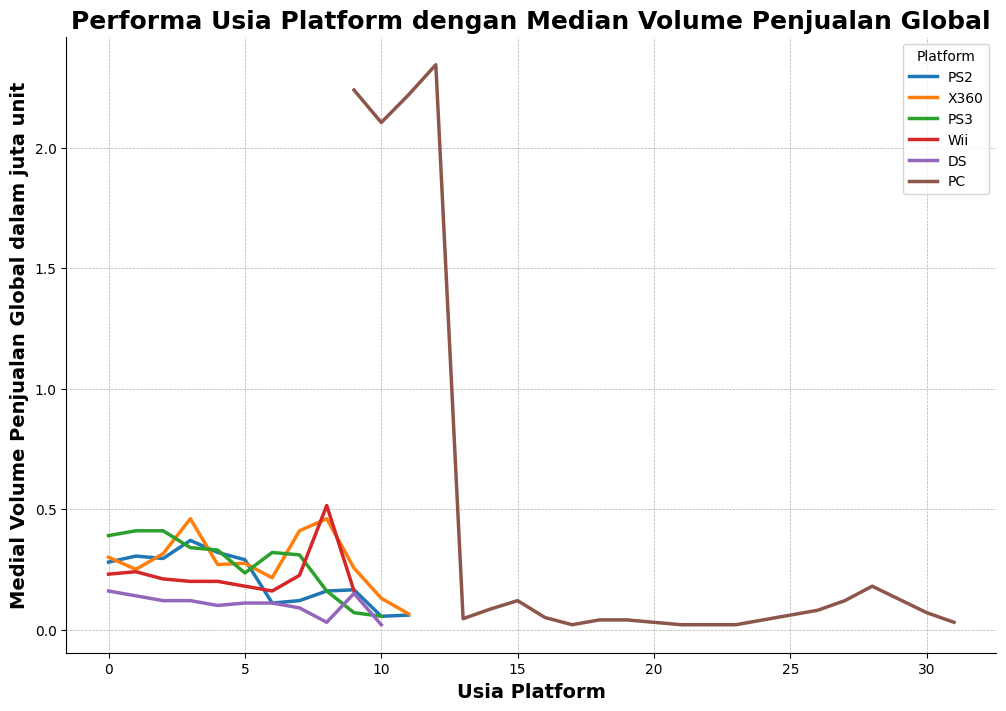

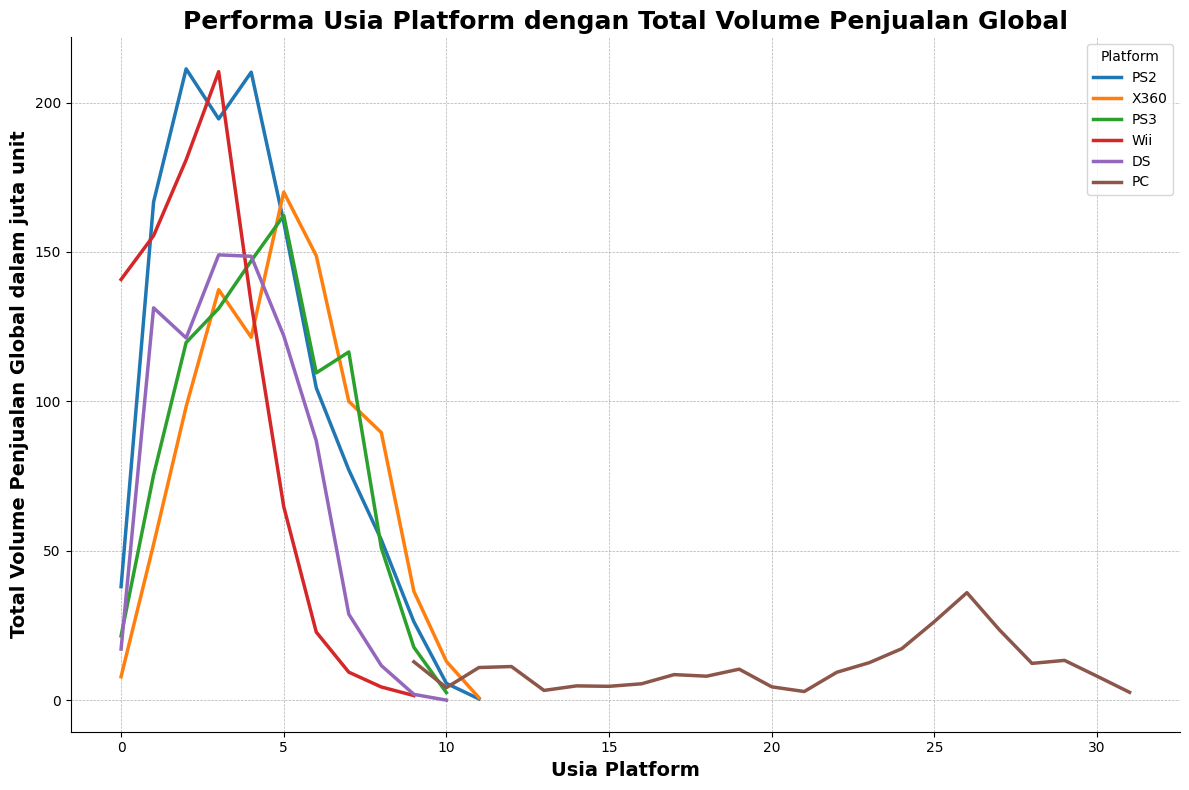

In [382]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, (style, color) in enumerate(zip(pivot_compare.index, colors)):
    ax.plot(
        pivot_compare.columns,
        pivot_compare.loc[style],
        label=style,
        color=color,
        linewidth=2.5
    )

ax.legend(loc='upper right', title='Platform')

ax.set(
    title='Performa Usia Platform dengan Median Volume Penjualan Global',
    xlabel='Usia Platform',
    ylabel='Median Volume Penjualan Global dalam juta unit',
)

ax.set_xlabel('Usia Platform', fontsize=14, fontweight='bold')
ax.set_ylabel('Medial Volume Penjualan Global dalam juta unit', fontsize=14, fontweight='bold')
ax.set_title('Performa Usia Platform dengan Median Volume Penjualan Global', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)

fig, ax = plt.subplots(figsize=(12, 8))

for i, (style, color) in enumerate(zip(pivot_sum.index, colors)):
    ax.plot(
        pivot_sum.columns,
        pivot_sum.loc[style],
        label=style,
        color=color,
        linewidth=2.5
    )

ax.legend(loc='upper right', title='Platform')

ax.set(
    title='Performa Usia Platform dengan Total Volume Penjualan Global',
    xlabel='Usia Platform',
    ylabel='Total Volume Penjualan Global dalam juta unit',
)

ax.set_xlabel('Usia Platform', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Volume Penjualan Global dalam juta unit', fontsize=14, fontweight='bold')
ax.set_title('Performa Usia Platform dengan Total Volume Penjualan Global', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)
plt.tight_layout()
plt.show()

Berdasarkan dua grafik diatas, dapat disimpulkan:
> 1. Dari segi usia platform, `PC` memiliki performa yang lebih bagus daripada `Console Based` platform apabila dilihat dari performa berkepanjangan. Dari grafik Performa Usia Platform dengan Median Volume Penjualan Global, dapat dilihat permainan dengan platform `PC` masih terus bertambah dan berkembang dari usia platform 7 hingga 31 tahun dengan range 24 tahun. Dapat dilihat pula performa platform `Console Based` berhenti bertambah dan berkembang di usia platform 16 tahun. Hal ini menandakan `PC` akan menjadi pilihan platform yang lebih baik apabila ingin mendapatkan volume penjualan yang berkepanjangan.

> 2. Dari grafik Performa Usia Platform dengan Total Volume Penjualan Global, dapat dilihat performa platform `Console Based` dalam total volume penjualan akan optimal saat usia platform berada dalam range 0 hingga 3 tahun. Selebihnya, total volume penjualan `Console Based` cenderung menurun.

`Bagaimana hubungan antara jumlah permainan 'Name' yang sama menggunakan beberapa 'Platform' sekaligus dengan penjualan permainan?`

Pihak *developer* permainan memiliki pilihan untuk mem-*publish* suatu permainan yang sama ke beberapa platform sekaligus. Kasus tersebut dapat dilihat pada dataset seperti berikut.

In [383]:
same_game = dfPlatform[['Name', 'Platform', 'Global_Sales']].copy()
same_game['n_same_game'] = same_game.groupby('Name')['Platform'].transform('nunique')
same_game = same_game[same_game['n_same_game'] > 1]
same_game

Name Platform  \
1                                         Super Mario Bros.      NES   
5                                                    Tetris       GB   
16                                       Grand Theft Auto V      PS3   
17                            Grand Theft Auto: San Andreas      PS2   
18                                        Super Mario World     SNES   
...                                                     ...      ...   
16065                          Aquaman: Battle for Atlantis       XB   
16069  SeaWorld Adventure Parks: Shamu's Deep Sea Adventure       XB   
16071                                      World Poker Tour      GBA   
16597                                      Spirits & Spells      GBA   
16595      SCORE International Baja 1000: The Official Game      PS2   

       Global_Sales  n_same_game  
1             40.24            2  
5             30.26            2  
16            21.39            5  
17            20.81            4  
18            20.62            2  
...             ...          ...  
16065          0.01            2  
16069          0.01            5  
16071          0.01            4  
16597          0.01            2  
16595          0.00            4  

[7873 rows x 4 columns]

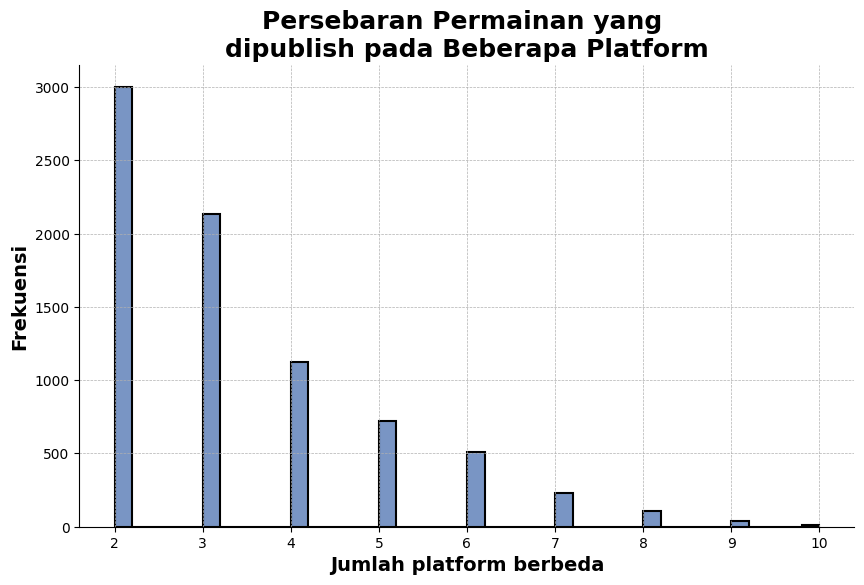

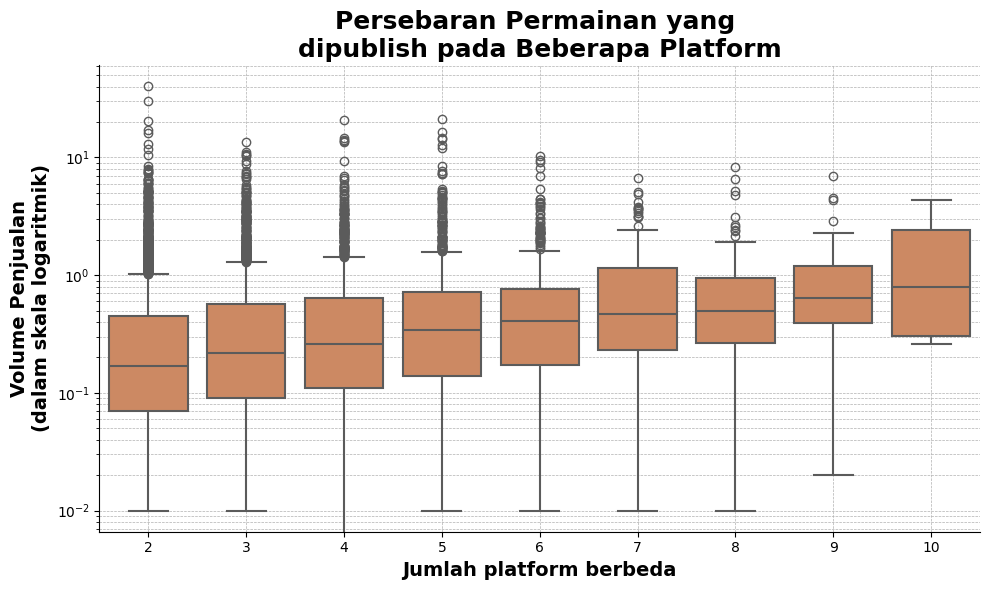

In [384]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=same_game,
    x='n_same_game',
    ax=ax,
    color='#4c72b0',
    edgecolor='black',
    linewidth=1.5
)

ax.set(
    title='Persebaran Permainan yang \ndipublish pada Beberapa Platform',
    xlabel='Jumlah platform berbeda',
    ylabel='Frekuensi'
)

ax.set_xlabel('Jumlah platform berbeda', fontsize=14, fontweight='bold')
ax.set_ylabel('Frekuensi', fontsize=14, fontweight='bold')
ax.set_title('Persebaran Permainan yang \ndipublish pada Beberapa Platform', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    x='n_same_game',
    y='Global_Sales',
    data=same_game,
    color='#dd8452',
    linewidth=1.5
)

ax.set(
    title='Persebaran Permainan yang \ndipublish pada Beberapa Platform',
    xlabel='Jumlah platform berbeda',
    ylabel='Volume Penjualan\n(dalam skala logaritmik)',
    yscale='log'
)

ax.set_xlabel('Jumlah platform berbeda', fontsize=14, fontweight='bold')
ax.set_ylabel('Volume Penjualan\n(dalam skala logaritmik)', fontsize=14, fontweight='bold')
ax.set_title('Persebaran Permainan yang \ndipublish pada Beberapa Platform', fontsize=18, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

despine(ax)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa banyaknya permainan yang sama di*publish* ke beberapa platform berbeda paling banyak di*publish* ke `2 platform`. Dapat dilihat juga banyaknya jenis permainan yang sama di*publish* ke beberapa platform berbeda **akan turun** berbanding terbalik dengan bertambahnya **jumlah platform yang berbeda**

Dari grafik persebaran diatas, dapat dilihat banyaknya data *outlier* dari masing-masing kelompok jumlah `Platform` berbeda terutama untuk kelompok jumlah `Platform` berbeda 2 hingga 5 platform. Dapat dilihat pula jarak dari nilai tertinggi data outlier ke data inliner yang sangat signifikan. Sama seperti pada bagian umur platform, akan dilakukan 2 metode korelasi dengan menggunakan *raw data* dan dengan menggunakan *median* dari kelompok tersebut.

Akan dilakukan pengujian korelasi antara `jumlah platform yang berbeda` dengan `volume penjualan global`

In [385]:
same_game.corr(method='spearman', numeric_only=True)

Global_Sales  n_same_game
Global_Sales      1.000000     0.202372
n_same_game       0.202372     1.000000

Akan dilakukan pengujian korelasi antara `jumlah platform yang berbeda` dengan `median volume penjualan global`

In [386]:
same_game_median=same_game.groupby('n_same_game', as_index=False).agg(
    median_global_sales=('Global_Sales', 'median')
)
same_game_median

n_same_game  median_global_sales
0            2                0.170
1            3                0.220
2            4                0.260
3            5                0.340
4            6                0.405
5            7                0.470
6            8                0.495
7            9                0.645
8           10                0.800

In [387]:
same_game_median.corr(method='spearman', numeric_only=True)

n_same_game  median_global_sales
n_same_game                  1.0                  1.0
median_global_sales          1.0                  1.0

In [388]:
summSame = pd.DataFrame(
    data={
        'Metode':['Individual Variability', 'Overall Trend'],
        'Variabel 1':['Jumlah platform', 'Jumlah platform'],
        'Variabel 2':['Keseluruhan data volume penjualan global', 'Median volume penjualan global'],
        'Nilai korelasi Spearman':[0.2, 1],
        'Hasil':['Korelasi positif lemah', 'Korelasi positif sangat kuat'],
        'Pembacaan':['Ada sedikit kecenderungan naiknya volume penjualan global saat jenis platform yang digunakan banyak', 'Ada kecenderungan samgat besar naiknya volume penjualan global saat jenis platform yang digunakan banyak']
    },
    columns=['Metode', 'Variabel 1', 'Variabel 2', 'Nilai korelasi Spearman', 'Hasil', 'Pembacaan'],
    index=[1, 2]
)

summSame

Metode       Variabel 1  \
1  Individual Variability  Jumlah platform   
2           Overall Trend  Jumlah platform   

                                 Variabel 2  Nilai korelasi Spearman  \
1  Keseluruhan data volume penjualan global                      0.2   
2            Median volume penjualan global                      1.0   

                          Hasil  \
1        Korelasi positif lemah   
2  Korelasi positif sangat kuat   

                                                                                                  Pembacaan  
1       Ada sedikit kecenderungan naiknya volume penjualan global saat jenis platform yang digunakan banyak  
2  Ada kecenderungan samgat besar naiknya volume penjualan global saat jenis platform yang digunakan banyak

> Dengan menggunakan kedua metode, didapat *insight* yang lebih komprehensif tentang hubungan antara jumlah platform berbeda yang digunakan untuk permainan yang sama terhadap volume penjualan global. Metode kedua menunjukkan bahwa secara **tren keseluruhan**, penjualan akan **ikut naik** seiring bertambahnya jumlah platform yang digunakan, menunjukkan bahwa semakin banyaknya jumlah platform yang digunakan nilai median volume penjualan cenderung juga akan naik. Metode pertama juga menunjukkan hal yang serupa yaitu seiring bertambahnya jenis platform yang digunakan, volume penjualan global juga ikut naik tetapi tidak signifikan.

### **4. Berdasarkan `'Publisher'`**

> Terdapat 597 Publisher dalam dataset sehingga dibuat klasifikasi Publisher. Klasifikasi tersebut berdasarkan asal dari Publisher, sebagai 'Amerika' jika Publisher berasal dari Amerika, 'Eropa' jika Publisher berasal dari Eropa, , 'Jepang' jika Publisher tersebut berasal dari Jepang, serta 'Other' jika Publisher tersebut berasal bukan dari negara-negara Eropa/Amerika/Jepang. Amerika, Eropa, Jepang, dan Other selanjutnya akan disebut sebagai region.
> Hal tersebut dilakukan guna melakukan analisa terhadap publisher secara keseluruhan, maupun secara klasifikasi publisher. Klasifikasi tersebut kan tertuang pada kolom 'Publisher_Origin'.

In [389]:
# membuat list publisher_origin dengan tuple berisi (nama publisher, asal publisher)
publisher_origin=[("10TACLE Studios","Eropa"), ("1C Company","Eropa"),("20th Century Fox Video Games","Amerika"),("2D Boy","Amerika"),("3 O'Clock","Jepang"),("3DO","Amerika"),
("49Games","Eropa"),("505 Games","Eropa"),("5pb","Jepang"),("7G//AMES","Jepang"),("989 Sports","Amerika"),("989 Studios","Amerika"),("Abylight","Eropa"),("Acclaim Entertainment","Amerika"),
("Accolade","Amerika"),("Ackkstudios","Amerika"),("Acquire","Jepang"),("Activision","Amerika"),("Activision Blizzard","Amerika"),("Activision Value","Amerika"),
("Adeline Software","Eropa"),("Aerosoft","Eropa"),("Agatsuma Entertainment","Jepang"),("Agetec","Amerika"),("Aksys Games","Amerika"),("Alawar Entertainment","Eropa"),
("Alchemist","Jepang"),("Alternative Software","Eropa"),("Altron","Jepang"),("Alvion","Jepang"),("American Softworks","Amerika"),("Angel Studios","Amerika"),("Answer Software","Amerika"),("AQ Interactive","Jepang"),
("Aqua Plus","Jepang"),("Aques","Jepang"),("Arc System Works","Jepang"),("Arena Entertainment","Amerika"),("Aria","Jepang"),("Arika","Jepang"),("ArtDink","Jepang"),("Aruze Corp","Jepang"),
("ASC Games","Amerika"),("Ascaron Entertainment","Eropa"),("Ascaron Entertainment GmbH","Eropa"),("ASCII Entertainment","Jepang"),("ASCII Media Works","Jepang"),("Asgard","Jepang"),("ASK","Jepang"),("Asmik Ace Entertainment","Jepang"),
("Asmik Corp","Jepang"),("Aspyr","Amerika"),("Astragon","Eropa"),("Asylum Entertainment","Amerika"),("Atari","Amerika"),("Athena","Jepang"),("Atlus","Jepang"),("Avalon Interactive","Amerika"),("Avanquest","Eropa"),
("Avanquest Software","Eropa"),("Axela","Jepang"),("BAM! Entertainment","Amerika"),("Bandai Namco Entertainment","Jepang"),("Banpresto","Jepang"),("Barnstorm Games","Eropa"),("Benesse","Jepang"),("Berkeley","Amerika"),
("Bethesda Softworks","Amerika"),("Big Ben Interactive","Eropa"),("Big Fish Games","Amerika"),("Bigben Interactive","Eropa"),("bitComposer Games","Eropa"),("Black Bean Games","Eropa"),("Black Label Games","Amerika"),
("Blast! Entertainment Ltd","Eropa"),("Blue Byte","Eropa"),("BMG Interactive Entertainment","Amerika"),("Bohemia Interactive","Eropa"),("Bomb","Jepang"),("Boost On","Jepang"),("BPS","Jepang"),("Brash Entertainment","Amerika"),
("Brightrock Games","Eropa"),("Broccoli","Jepang"),("BushiRoad","Jepang"),("Capcom","Jepang"),("Cave","Jepang"),("CBS Electronics","Amerika"),("CCP","Eropa"),("CDV Software Entertainment","Eropa"),("Chromatic Games","Amerika"),
("ChunSoft","Jepang"),("City Interactive","Eropa"),("Cloud Imperium Games Corporation","Amerika"),("Coconuts Japan","Jepang"),("Codemasters","Eropa"),("Codemasters Online","Eropa"),("CokeM Interactive","Amerika"),
("Coleco","Amerika"),("Comfort","Jepang"),("Commseed","Jepang"),("Compile","Jepang"),("Compile Heart","Jepang"),("Conspiracy Entertainment","Amerika"),("Core Design Ltd.","Eropa"),("CPG Products","Jepang"),
("Crave Entertainment","Amerika"),("Creative Core","Jepang"),("Crimson Cow","Eropa"),("Crystal Dynamics","Amerika"),("CTO SpA","Eropa"),("Culture Brain","Jepang"),("Culture Publishers","Jepang"),("CyberFront","Jepang"),
("Cygames","Jepang"),("D3Publisher","Jepang"),("Daedalic","Eropa"),("Daedalic Entertainment","Eropa"),("Daito","Jepang"),("Data Age","Amerika"),("Data Design Interactive","Eropa"),("Data East","Jepang"),
("Datam Polystar","Jepang"),("Deep Silver","Eropa"),("Destination Software, Inc","Amerika"),("Destineer","Amerika"),("Detn8 Games","Amerika"),("Devolver Digital","Amerika"),("DHM Interactive","Other"),
("DigiCube","Jepang"),("Disney Interactive Studios","Amerika"),("Dorart","Jepang"),("Dovetail Games","Eropa"),("dramatic create","Jepang"),("DreamCatcher Interactive","Amerika"),("DreamWorks Interactive","Amerika"),
("DSI Games","Amerika"),("DTP Entertainment","Eropa"),("Dusenberry Martin Racing","Amerika"),("EA Games","Amerika"),("Easy Interactive","Eropa"),("Ecole","Jepang"),("Edia","Jepang"),("Edmund McMillen","Amerika"),
("Eidos Interactive","Eropa"),("Electronic Arts","Amerika"),("Elf","Jepang"),("Elite","Eropa"),("Empire Interactive","Eropa"),("Encore","Amerika"),("Enix Corporation","Jepang"),("Enjoy Gaming ltd.","Jepang"),("Enterbrain","Jepang"),
("EON Digital Entertainment","Jepang"),("Epic Games","Amerika"),("Ertain","Jepang"),("ESP","Jepang"),("Essential Games","Amerika"),("Evolution Games","Eropa"),("Evolved Games","Amerika"),("Excalibur Publishing","Eropa"),
("Experience Inc.","Jepang"),("Extreme Entertainment Group","Jepang"),("Falcom Corporation","Jepang"),("Fields","Jepang"),("Flashpoint Games","Eropa"),("Flight-Plan","Jepang"),("Focus Home Interactive","Eropa"),("Focus Multimedia","Eropa"),("fonfun","Other"),("Foreign Media Games","Eropa"),("Fortyfive","Jepang"),("Fox Interactive","Amerika"),
("From Software","Jepang"),("Fuji","Jepang"),("Funbox Media","Eropa"),("Funcom","Eropa"),("FunSoft","Amerika"),("Funsta","Jepang"),("FuRyu","Jepang"),("FuRyu Corporation","Jepang"),("G.Rev","Jepang"),("Gaga","Jepang"),
("Gainax Network Systems","Jepang"),("Gakken","Jepang"),("Game Factory","Eropa"),("Game Life","Jepang"),("Gamebridge","Amerika"),("Gamecock","Amerika"),("Gameforge","Eropa"),("Gameloft","Eropa"),("GameMill Entertainment","Amerika"),
("GameTek","Amerika"),("Gamigo US","Amerika"),("Gaslamp Games","Amerika"),("Gathering of Developers","Amerika"),("Gearbox Software","Amerika"),("General Entertainment","Amerika"),("Genki","Jepang"),("Genterprise","Jepang"),
("Ghostlight","Eropa"),("Giga","Jepang"),("Giza10","Jepang"),("Glams","Jepang"),("Global A Entertainment","Jepang"),("Global Star","Amerika"),("GN Software","Eropa"),("GOA","Other"),("Gotham Games","Amerika"),
("Graffiti","Jepang"),("Grand Prix Games","Jepang"),("Graphsim Entertainment","Jepang"),("Gremlin Interactive Ltd","Eropa"),("Griffin International","Amerika"),("Groove Games","Amerika"),("GSP","Eropa"),("GT Interactive","Amerika"),
("GungHo","Jepang"),("Gust","Jepang"),("Hackberry","Jepang"),("HAL Laboratory","Jepang"),("Hamster Corporation","Jepang"),("Happinet","Jepang"),("Harmonix Music Systems","Amerika"),("Hasbro Interactive","Amerika"),
("Havas Interactive","Eropa"),("HB Studios","Amerika"),("Headup Games","Eropa"),("Hearty Robin","Jepang"),("Hect","Jepang"),("Hello Games","Eropa"),("Her Interactive","Amerika"),("Hip Interactive","Amerika"),
("HMH Interactive","Eropa"),("Home Entertainment Suppliers","Amerika"),("Hudson Entertainment","Jepang"),("Hudson Soft","Jepang"),("Human Entertainment","Jepang"),("HuneX","Jepang"),("Iceberg Interactive","Eropa"),
("Idea Factory","Jepang"),("Idea Factory International","Amerika"),("IE Institute","Jepang"),("Ignition Entertainment","Amerika"),("Illusion Softworks","Eropa"),("Imadio","Amerika"),("Image Epoch","Jepang"),("imageepoch Inc.","Jepang"),
("Imageworks","Jepang"),("Imagic","Amerika"),("Imagineer","Jepang"),("Imax","Jepang"),("Indie Games","Jepang"),("Infogrames","Eropa"),("Insomniac Games","Amerika"),("Interchannel","Jepang"),("Interchannel-Holon","Jepang"),
("Intergrow","Jepang"),("Interplay","Amerika"),("Interplay Productions","Amerika"),("Interworks Unlimited, Inc.","Amerika"),("Inti Creates","Jepang"),("Introversion Software","Eropa"),("inXile Entertainment","Amerika"),
("Irem Software Engineering","Jepang"),("ITT Family Games","Amerika"),("Ivolgamus","Eropa"),("iWin","Amerika"),("Jack of All Games","Amerika"),("Jaleco","Jepang"),("Jester Interactive","Eropa"),("Jorudan","Jepang"),
("JoWood Productions","Eropa"),("Just Flight","Eropa"),("JVC","Jepang"),("Kadokawa Shoten","Jepang"),("Kaga Create","Jepang"),("Kalypso Media","Eropa"),("Kamui","Jepang"),("Kando Games","Jepang"),("Karin Entertainment","Jepang"),
("Kemco","Jepang"),("KID","Jepang"),("Kids Station","Jepang"),("King Records","Jepang"),("Knowledge Adventure","Amerika"),("Koch Media","Eropa"),("Kokopeli Digital Studios","Amerika"),("Konami","Jepang"),("Kool Kizz","Eropa"),
("KSS","Jepang"),("Laguna","Jepang"),("Legacy Interactive","Amerika"),("LEGO Media","Eropa"),("Level 5","Jepang"),("Lexicon Entertainment","Eropa"),("Licensed 4U","Jepang"),("Lighthouse Interactive","Eropa"),
("Liquid Games","Eropa"),("Little Orbit","Amerika"),("Locus","Jepang"),("LSP Games","Jepang"),("LucasArts","Amerika"),("Mad Catz","Amerika"),("Magical Company","Jepang"),("Magix","Eropa"),("Majesco Entertainment","Amerika"),
("Majesco Entertainment Company","Amerika"),("Mamba Games","Eropa"),("Marvel Entertainment","Amerika"),("Marvelous Entertainment","Jepang"),("Marvelous Games","Jepang"),("Marvelous Interactive","Jepang"),("Masque Publishing","Amerika"),
("Mastertronic","Eropa"),("Mastiff","Amerika"),("Mattel Interactive","Amerika"),("Max Five","Jepang"),("Maximum Family Games","Amerika"),("Maximum Games, Ravenscourt","Amerika"),("Maxis","Amerika"),("MC2 Entertainment","Amerika"),
("Media Factory","Jepang"),("Media Rings","Jepang"),("Media Sales & Licensing","Jepang"),("Media Works","Jepang"),("MediaQuest","Jepang"),("Men-A-Vision","Amerika"),("Mentor Interactive","Eropa"),("Mercury Games","Amerika"),
("Merscom LLC","Amerika"),("Metro 3D","Amerika"),("Michaelsoft","Other"),("Micro Cabin","Jepang"),("Microids","Eropa"),("Microprose","Amerika"),("Microsoft Game Studios","Amerika"),("Midas Interactive Entertainment","Eropa"),
("Midway Games","Amerika"),("Milestone","Eropa"),("Milestone S.r.l","Eropa"),("Milestone S.r.l.","Eropa"),("Minato Station","Jepang"),("Mindscape","Amerika"),("Mirai Shounen","Jepang"),("Misawa","Jepang"),("Mitsui","Jepang"),
("mixi, Inc","Jepang"),("MLB.com","Amerika"),("Mojang","Eropa"),("Monte Christo Multimedia","Eropa"),("Moss","Jepang"),("MTO","Jepang"),("MTV Games","Amerika"),("Mud Duck Productions","Amerika"),("Mumbo Jumbo","Amerika"),
("Mycom","Jepang"),("Myelin Media","Amerika"),("Mystique","Amerika"),("Namco Bandai Games","Jepang"),("Natsume","Amerika"),("Navarre Corp","Amerika"),("Naxat Soft","Jepang"),("NCS","Jepang"),("NCSoft","Other"),
("NDA Productions","Amerika"),("NEC","Jepang"),("Neko Entertainment","Eropa"),("NekoNyan","Eropa"),("NetRevo","Jepang"),("New","Jepang"),("New World Computing","Amerika"),("NewKidCo","Amerika"),("Nexon","Other"),
("Nichibutsu","Jepang"),("Nihon Falcom Corporation","Jepang"),("Nintendo","Jepang"),("Nippon Amuse","Jepang"),("Nippon Columbia","Jepang"),("Nippon Ichi Software","Jepang"),("Nippon Telenet","Jepang"),("Nitroplus","Jepang"),
("Nobilis","Eropa"),("Nordcurrent","Eropa"),("Nordic Games","Eropa"),("NovaLogic","Amerika"),("Number None","Amerika"),("O3 Entertainment","Amerika"),("Ocean","Eropa"),("Office Create","Jepang"),("O-Games","Amerika"),
("On Demand","Amerika"),("Ongakukan","Jepang"),("Origin Systems","Amerika"),("Otomate","Jepang"),("Oxygen Interactive","Eropa"),("P2 Games","Eropa"),("Pacific Century Cyber Works","Other"),("Pack In Soft","Jepang"),
("Pack-In-Video","Jepang"),("Palcom","Jepang"),("Panther Software","Eropa"),("Paon","Jepang"),("Paon Corporation","Jepang"),("Paradox Development","Eropa"),("Parker Bros.","Amerika"),("Performance Designed Products","Amerika"),
("Phantagram","Other"),("Phantom EFX","Amerika"),("Phenomedia","Eropa"),("Phoenix Games","Eropa"),("Piacci","Jepang"),("Pinnacle","Amerika"),("Pioneer LDC","Jepang"),("Planet G","Jepang"),("Play It","Eropa"),("Playlogic Game Factory","Eropa"),
("Playmates","Jepang"),("Playmore","Other"),("PlayV","Eropa"),("Plenty","Jepang"),("PM Studios","Amerika"),("Pony Canyon","Jepang"),("PopCap Games","Amerika"),("Popcorn Arcade","Eropa"),("PopTop Software","Amerika"),("Pow","Eropa"),
("PQube","Eropa"),("Princess Soft","Jepang"),("Prototype","Jepang"),("Psygnosis","Eropa"),("Purple Hills","Eropa"),("Quelle","Eropa"),("Quest","Amerika"),("Quinrose","Jepang"),("Quintet","Jepang"),("Rage Software","Eropa"),
("Rain Games","Eropa"),("Rebellion","Eropa"),("Rebellion Developments","Eropa"),("RED Entertainment","Jepang"),("Red Orb","Amerika"),("Red Storm Entertainment","Amerika"),("RedOctane","Amerika"),("Reef Entertainment","Eropa"),
("Rejet","Jepang"),("Re-Logic","Amerika"),("responDESIGN","Amerika"),("Revolution (Japan)","Jepang"),("Revolution Software","Eropa"),("Rising Star Games","Eropa"),("Riverhillsoft","Jepang"),("Rocket Company","Jepang"),("Rombax Games","Eropa"),
("Rondomedia","Eropa"),("RTL","Eropa"),("Russel","Jepang"),("Sammy Corporation","Jepang"),("Saurus","Jepang"),("Scholastic Inc.","Amerika"),("SCi","Eropa"),("Screenlife","Amerika"),("SCS Software","Eropa"),("Sears","Amerika"),
("Sega","Jepang"),("Seta Corporation","Jepang"),("Seven45 Studios","Amerika"),("Seventh Chord","Jepang"),("Shogakukan","Jepang"),("Sierra Entertainment","Amerika"),("SimBin Studios","Eropa"),("Simon & Schuster Interactive","Amerika"),
("Slightly Mad Studios","Eropa"),("Slitherine Software","Eropa"),("SNK","Jepang"),("SNK Playmore","Jepang"),("Societa","Jepang"),("Sold Out","Eropa"),("Sonnet","Jepang"),("Sony Computer Entertainment","Jepang"),("Sony Computer Entertainment America","Amerika"),
("Sony Computer Entertainment Europe","Eropa"),("Sony Online Entertainment","Amerika"),("SouthPeak Games","Amerika"),("Spike","Jepang"),("Spike Chunsoft","Jepang"),("SPS","Jepang"),("Square Enix","Jepang"),("SquareSoft","Jepang"),
("SSI","Amerika"),("Stainless Games","Eropa"),("Starfish","Jepang"),("Starpath Corp.","Amerika"),("Sting","Jepang"),("Storm City Games","Amerika"),("Storm City Gamesa","Amerika"),("Strategy First","Amerika"),("Success","Jepang"),
("Summitsoft","Amerika"),("Sunflowers","Eropa"),("Sunrise Interactive","Jepang"),("Sunsoft","Jepang"),("Sweets","Jepang"),("Swing! Entertainment","Eropa"),("Syscom","Jepang"),("System 3","Eropa"),("System 3 Arcade Software","Eropa"),
("System Soft","Jepang"),("T&E Soft","Jepang"),("Taito","Jepang"),("Takara","Jepang"),("Takara Tomy","Jepang"),("Take-Two Interactive","Amerika"),("Takuyo","Jepang"),("Talking Stick Games","Amerika"),("TalonSoft","Amerika"),
("TDK Core","Jepang"),("TDK Mediactive","Amerika"),("Team Meat","Amerika"),("Team17 Software","Eropa"),("Technos Japan Corporation","Jepang"),("TechnoSoft","Jepang"),("Tecmo Koei","Jepang"),("Telegames","Amerika"),("Telesys","Amerika"),
("Telltale Games","Amerika"),("Telstar","Amerika"),("Tetris Online","Jepang"),("Teyon","Eropa"),("TGL","Jepang"),
("The Adventure Company","Amerika"),("The Learning Company","Amerika"),("THQ","Amerika"),("Tigervision","Amerika"),("Time Warner Interactive","Amerika"),("Titus","Eropa"),("Tivola","Eropa"),("TOHO","Jepang"),("Tommo","Amerika"),
("Tomy Corporation","Jepang"),("TopWare Interactive","Eropa"),("Touchstone","Amerika"),("Tradewest","Amerika"),("Trion Worlds","Amerika"),("Tripwire Interactive","Amerika"),("Tru Blu Entertainment","Other"),("Tryfirst","Other"),
("Tubby Games","Eropa"),("TYO","Jepang"),("Type-Moon","Jepang"),("U.S. Gold","Amerika"),("Ubisoft","Eropa"),("UEP Systems","Amerika"),("UFO Interactive","Amerika"),("UIG Entertainment","Eropa"),("Ultravision","Amerika"),
("Universal Gamex","Other"),("Universal Interactive","Amerika"),("Valcon Games","Amerika"),("ValuSoft","Amerika"),("Valve","Amerika"),("Valve Software","Amerika"),("Vap","Jepang"),("Vatical Entertainment","Amerika"),
("Vic Tokai","Jepang"),("Victor Interactive","Jepang"),("Video System","Jepang"),("Views","Jepang"),("Vir2L Studios","Amerika"),("Virgin Interactive","Eropa"),("Virtual Play Games","Amerika"),("Visco","Jepang"),("Wanadoo","Eropa"),
("Warashi","Jepang"),("Wargaming","Eropa"),("Wargaming.net","Other"),("Warner Bros. Interactive Entertainment","Amerika"),("Warp","Jepang"),("WayForward Technologies","Amerika"),("Westwood Studios","Amerika"),("White Park Bay Software","Amerika"),
("Wizard Video Games","Amerika"),("Xicat Interactive","Amerika"),("Xing Entertainment","Jepang"),("Xplosiv","Eropa"),("XS Games","Amerika"),("Xseed Games","Amerika"),("Yacht Club Games","Amerika"),("Yamasa Entertainment","Jepang"),("Yeti","Jepang"),
("Yoostar Entertainment Group","Amerika"),("Yuke's","Jepang"),("Yumedia","Jepang"),("Zenrin","Jepang"),("Zoo Digital Publishing","Eropa"),("Zoo Games","Amerika"),("Zushi Games","Eropa")
]


In [390]:
#membuat copy dataframe baru bernama publisherSALES agar tidak mengganggu data asli
publisher_sales= df
publisher_sales

#inisiasi awal df['asalpublisher'] = kosong
publisher_sales['Publisher_Origin']=''

# mengisi df['asalpublisher'] dengan cara mencocokan publisher dengan asal publisher pada list publisher_origin[]
for publ, asal in publisher_origin:
  publisher_sales.loc[publisher_sales['Publisher'] == publ, 'Publisher_Origin']=asal

# menampilkan sample
publisher_sales.sample(5, random_state=56)

Rank                                  Name Platform  Year     Genre  \
3905    887             Dragon Ball: Raging Blast     X360  2009  Fighting   
13023  1008                       Mortal Kombat X       PC  2015  Fighting   
13747  1009  Dragon's Lair 3D: Return to the Lair       GC  2002  Platform   
469     384    Dragon Ball Z: Budokai Tenkaichi 3      PS2  2007  Fighting   
1307    670                       Mortal Kombat 4       PS  1998  Fighting   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
3905                       Namco Bandai Games      0.36      0.09      0.02   
13023  Warner Bros. Interactive Entertainment      0.01      0.04      0.00   
13747                                     THQ      0.03      0.01      0.00   
469                                     Atari      1.15      0.00      0.76   
1307                           GT Interactive      0.81      0.55      0.00   

       Other_Sales  Global_Sales Publisher_Origin  
3905          0.04          0.51           Jepang  
13023         0.00          0.05          Amerika  
13747         0.00          0.04          Amerika  
469           1.09          3.00          Amerika  
1307          0.10          1.46          Amerika

In [391]:
# menampilkan jumlah publisher yang berasal dari Jepang, Amerika, Eropa, dan Other
publisher_sales.groupby('Publisher_Origin')['Publisher'].nunique().sort_values(ascending=False)

Publisher_Origin
Jepang     242
Amerika    198
Eropa      143
Other       13
Name: Publisher, dtype: int64

> Kami mendapatkan bahwa terdapat 597 Publisher berbeda pada data, dengan 242 Publisher berasal dari Jepang, 199 Publisher yang berasal dari Amerika, 143 Publisher yang berasal dari Eropa, serta 13 Publisher lainnya yang tidak berasal dari Amerika, Eropa, ataupun Jepang.


#### **TOP 10 Publisher Keseluruhan dan Region Publisher terhadap Volume Penjualan**

> **Top 10 Publisher Keseluruhan**

>> Dari seluruh Publisher yang ada pada data, akan dilakukan analisa terhadap 10 Publisher terbaik yang menghasilkan volume penjualan tertinggi secara global maupun setiap regionnya.

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

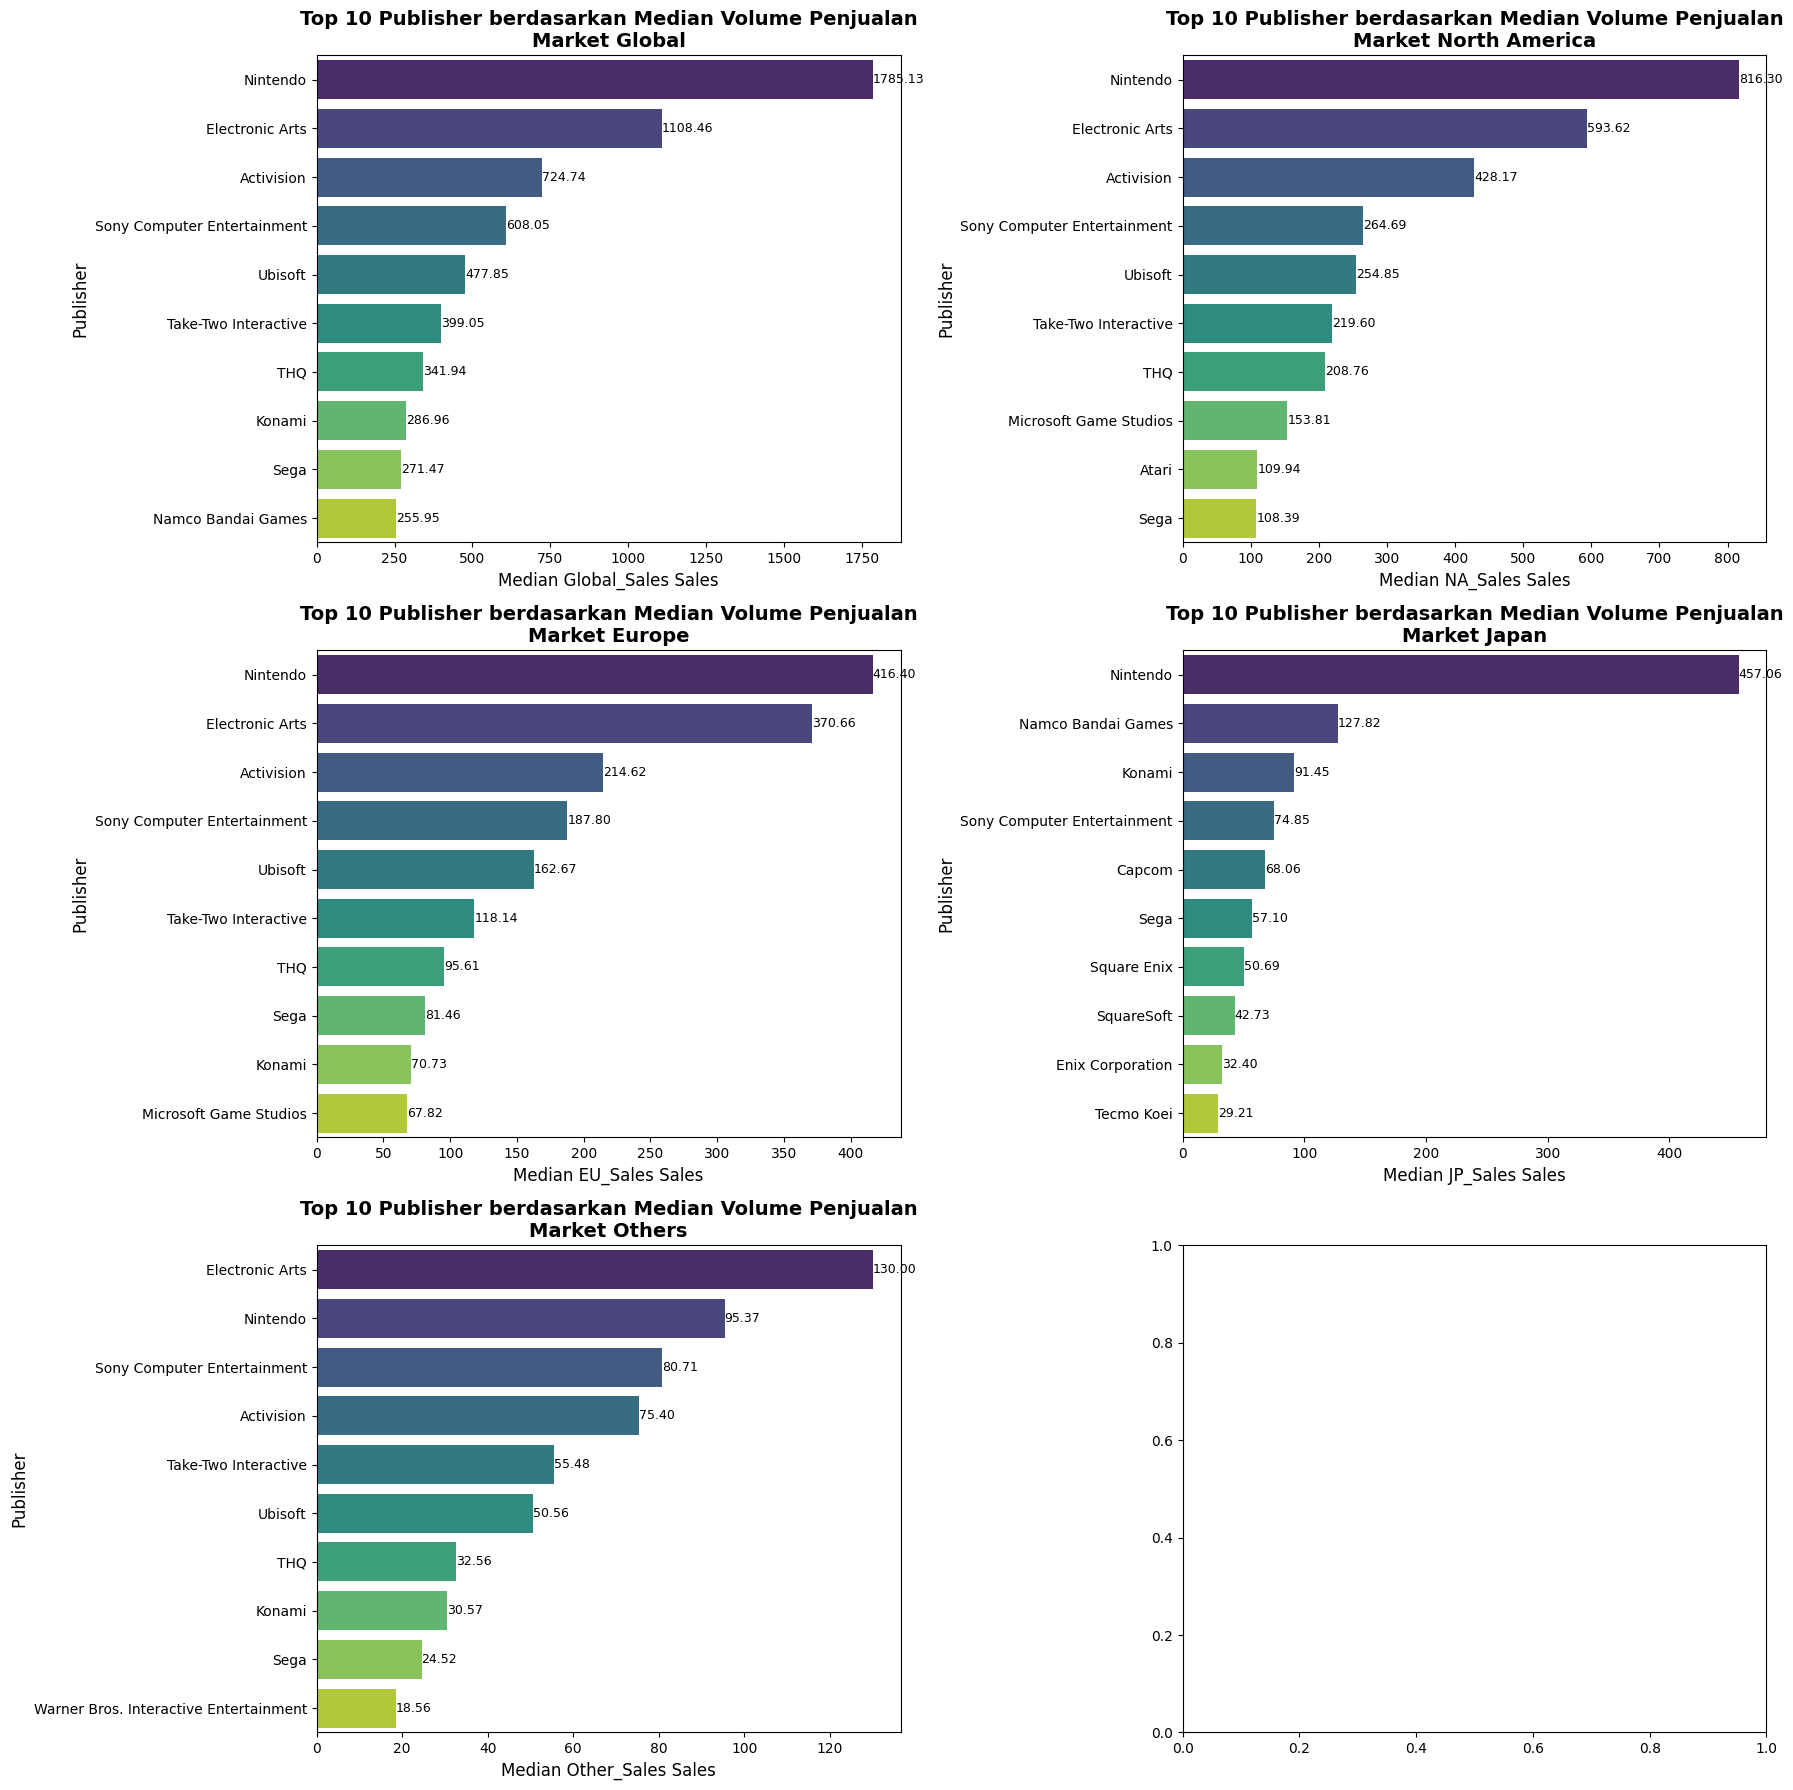

In [393]:
# visualisasi top 10 publisher berdasarkan volume penjualan secara global dan per region dalam bar chart
regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
market=['Global','North America', "Europe", "Japan", "Others"]

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
for i, region in enumerate(regions):
    top_median_sales = publisher_sales.groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False).head(10)

    sns.barplot(ax=axs[i//2,i%2], data=top_median_sales, y='Publisher', x=region, palette='viridis',hue='Publisher', legend=False)
    axs[i//2,i%2].set_ylabel('Publisher', fontsize=12)
    axs[i//2,i%2].set_xlabel(f'Median {region} Sales', fontsize=12)
    axs[i//2,i%2].set_title(f'Top 10 Publisher berdasarkan Median Volume Penjualan\nMarket {market[i]}', fontsize=14, fontweight='bold')
    for a in axs[i//2,i%2].patches:
        axs[i//2,i%2].annotate(f'{a.get_width():.2f}', (a.get_width(), a.get_y()+a.get_height()/2),ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [394]:
# dilakukan uji kruskall willis terhadap Top 10 Publisher yang telah didapatkan
from scipy.stats import kruskal

top_med_all= publisher_sales.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)
unik_all=top_med_all['Publisher'].unique()
top_med_all=publisher_sales[publisher_sales['Publisher'].isin(unik_all)]

top_med_na= publisher_sales.groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)
unik_na=top_med_na['Publisher'].unique()
top_med_na=publisher_sales[publisher_sales['Publisher'].isin(unik_na)]

top_med_eu= publisher_sales.groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)
unik_eu=top_med_eu['Publisher'].unique()
top_med_eu=publisher_sales[publisher_sales['Publisher'].isin(unik_eu)]

top_med_jp= publisher_sales.groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)
unik_jp=top_med_jp['Publisher'].unique()
top_med_jp=publisher_sales[publisher_sales['Publisher'].isin(unik_jp)]

top_med_ot= publisher_sales.groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)
unik_ot=top_med_ot['Publisher'].unique()
top_med_ot=publisher_sales[publisher_sales['Publisher'].isin(unik_ot)]

dataframes = [top_med_all, top_med_na, top_med_eu, top_med_jp, top_med_ot]
markets=['Global', 'North America', 'Europe', 'Japan', 'Others']
sales = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def _kruskal_wallis(data,market,sales):
    sales_data={}
    df=data
    alpha=0.05

    for publisher in df['Publisher'].unique():
        sales_data[publisher] = df[df['Publisher'] == publisher][sales]

    stat, pvalue = kruskal(*sales_data.values())

    if pvalue > alpha:
        print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher di market {market}.')
    else:
        print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market {market}. Tapi kita tidak tahu yang mana.")

for i in range(len(dataframes)):
    _kruskal_wallis(dataframes[i],markets[i],sales[i])

P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market Global. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market North America. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market Europe. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market Japan. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher di market Others. Tapi kita tidak tahu yang mana.


> Dari hasil diatas dapat diartikan bahwa TOP 10 Publisher tertera memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Hal ini dapat menjadi indikator potensial untuk mengatakan bahwa publisher tersebut memiliki produk yang berkualitas atau strategi pemasaran yang efektif.

> Publisher tersebut dapat dijadikan pertimbangan sebagai partner apabila tujuan kita untuk bekerja dengan publisher yang kemungkinan memiliki pengaruh besar di pasar global. Namun, jika memiliki tujuan spesifik seperti fokus pada permainan tertentu, platform tertentu, publisher tertentu atau waktu tertentu, dibutuhkan analisa pasar lebih lanjut yang lebih spesifik, seperti tren industri, preferensi konsumen, keadaan ekonomi, dan lainnya. Kesimpulannya, Top 10 Publisher dari total volume penjualan, memberikan gambaran tentang kontribusi mereka yang tinggi, terhadap industri games.

> Berikut merupakan ringkasan Top 10 Publisher yang dapat dijadikan pertimbangan.

In [395]:
# menampilkan Top 10 seluruh Publisher Berdasarkan Volume Penjualan Secara Global dan per Region
publisher_sales_all=publisher_sales
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_all={}

for col in sales:
    top_pub=publisher_sales_all.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    dict_pub_sales_all[col]=top_pub['Publisher'].tolist()

result=pd.DataFrame(dict_pub_sales_all)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP 10 North America', 'TOP 10 Europe', 'TOP 10 Japan', 'TOP 10 Other']
print('Top 10 Publisher Berdasarkan Volume Penjualan Secara Global dan per Region')
result

Top 10 Publisher Berdasarkan Volume Penjualan Secara Global dan per Region


Rank                TOP 10 Global         TOP 10 North America  \
0     1                     Nintendo                     Nintendo   
1     2              Electronic Arts              Electronic Arts   
2     3                   Activision                   Activision   
3     4  Sony Computer Entertainment  Sony Computer Entertainment   
4     5                      Ubisoft                      Ubisoft   
5     6         Take-Two Interactive         Take-Two Interactive   
6     7                          THQ                          THQ   
7     8                       Konami       Microsoft Game Studios   
8     9                         Sega                        Atari   
9    10           Namco Bandai Games                         Sega   

                 TOP 10 Europe                 TOP 10 Japan  \
0                     Nintendo                     Nintendo   
1              Electronic Arts           Namco Bandai Games   
2                   Activision                       Konami   
3  Sony Computer Entertainment  Sony Computer Entertainment   
4                      Ubisoft                       Capcom   
5         Take-Two Interactive                         Sega   
6                          THQ                  Square Enix   
7                         Sega                   SquareSoft   
8                       Konami             Enix Corporation   
9       Microsoft Game Studios                   Tecmo Koei   

                             TOP 10 Other  
0                         Electronic Arts  
1                                Nintendo  
2             Sony Computer Entertainment  
3                              Activision  
4                    Take-Two Interactive  
5                                 Ubisoft  
6                                     THQ  
7                                  Konami  
8                                    Sega  
9  Warner Bros. Interactive Entertainment

> **Top 10 Publisher Asal Amerika**
>> Dari seluruh Publisher yang berasal dari Amerika, akan dilakukan analisa terhadap 10 Publisher terbaik yang menghasilkan volume penjualan tertinggi secara global maupun setiap regionnya.

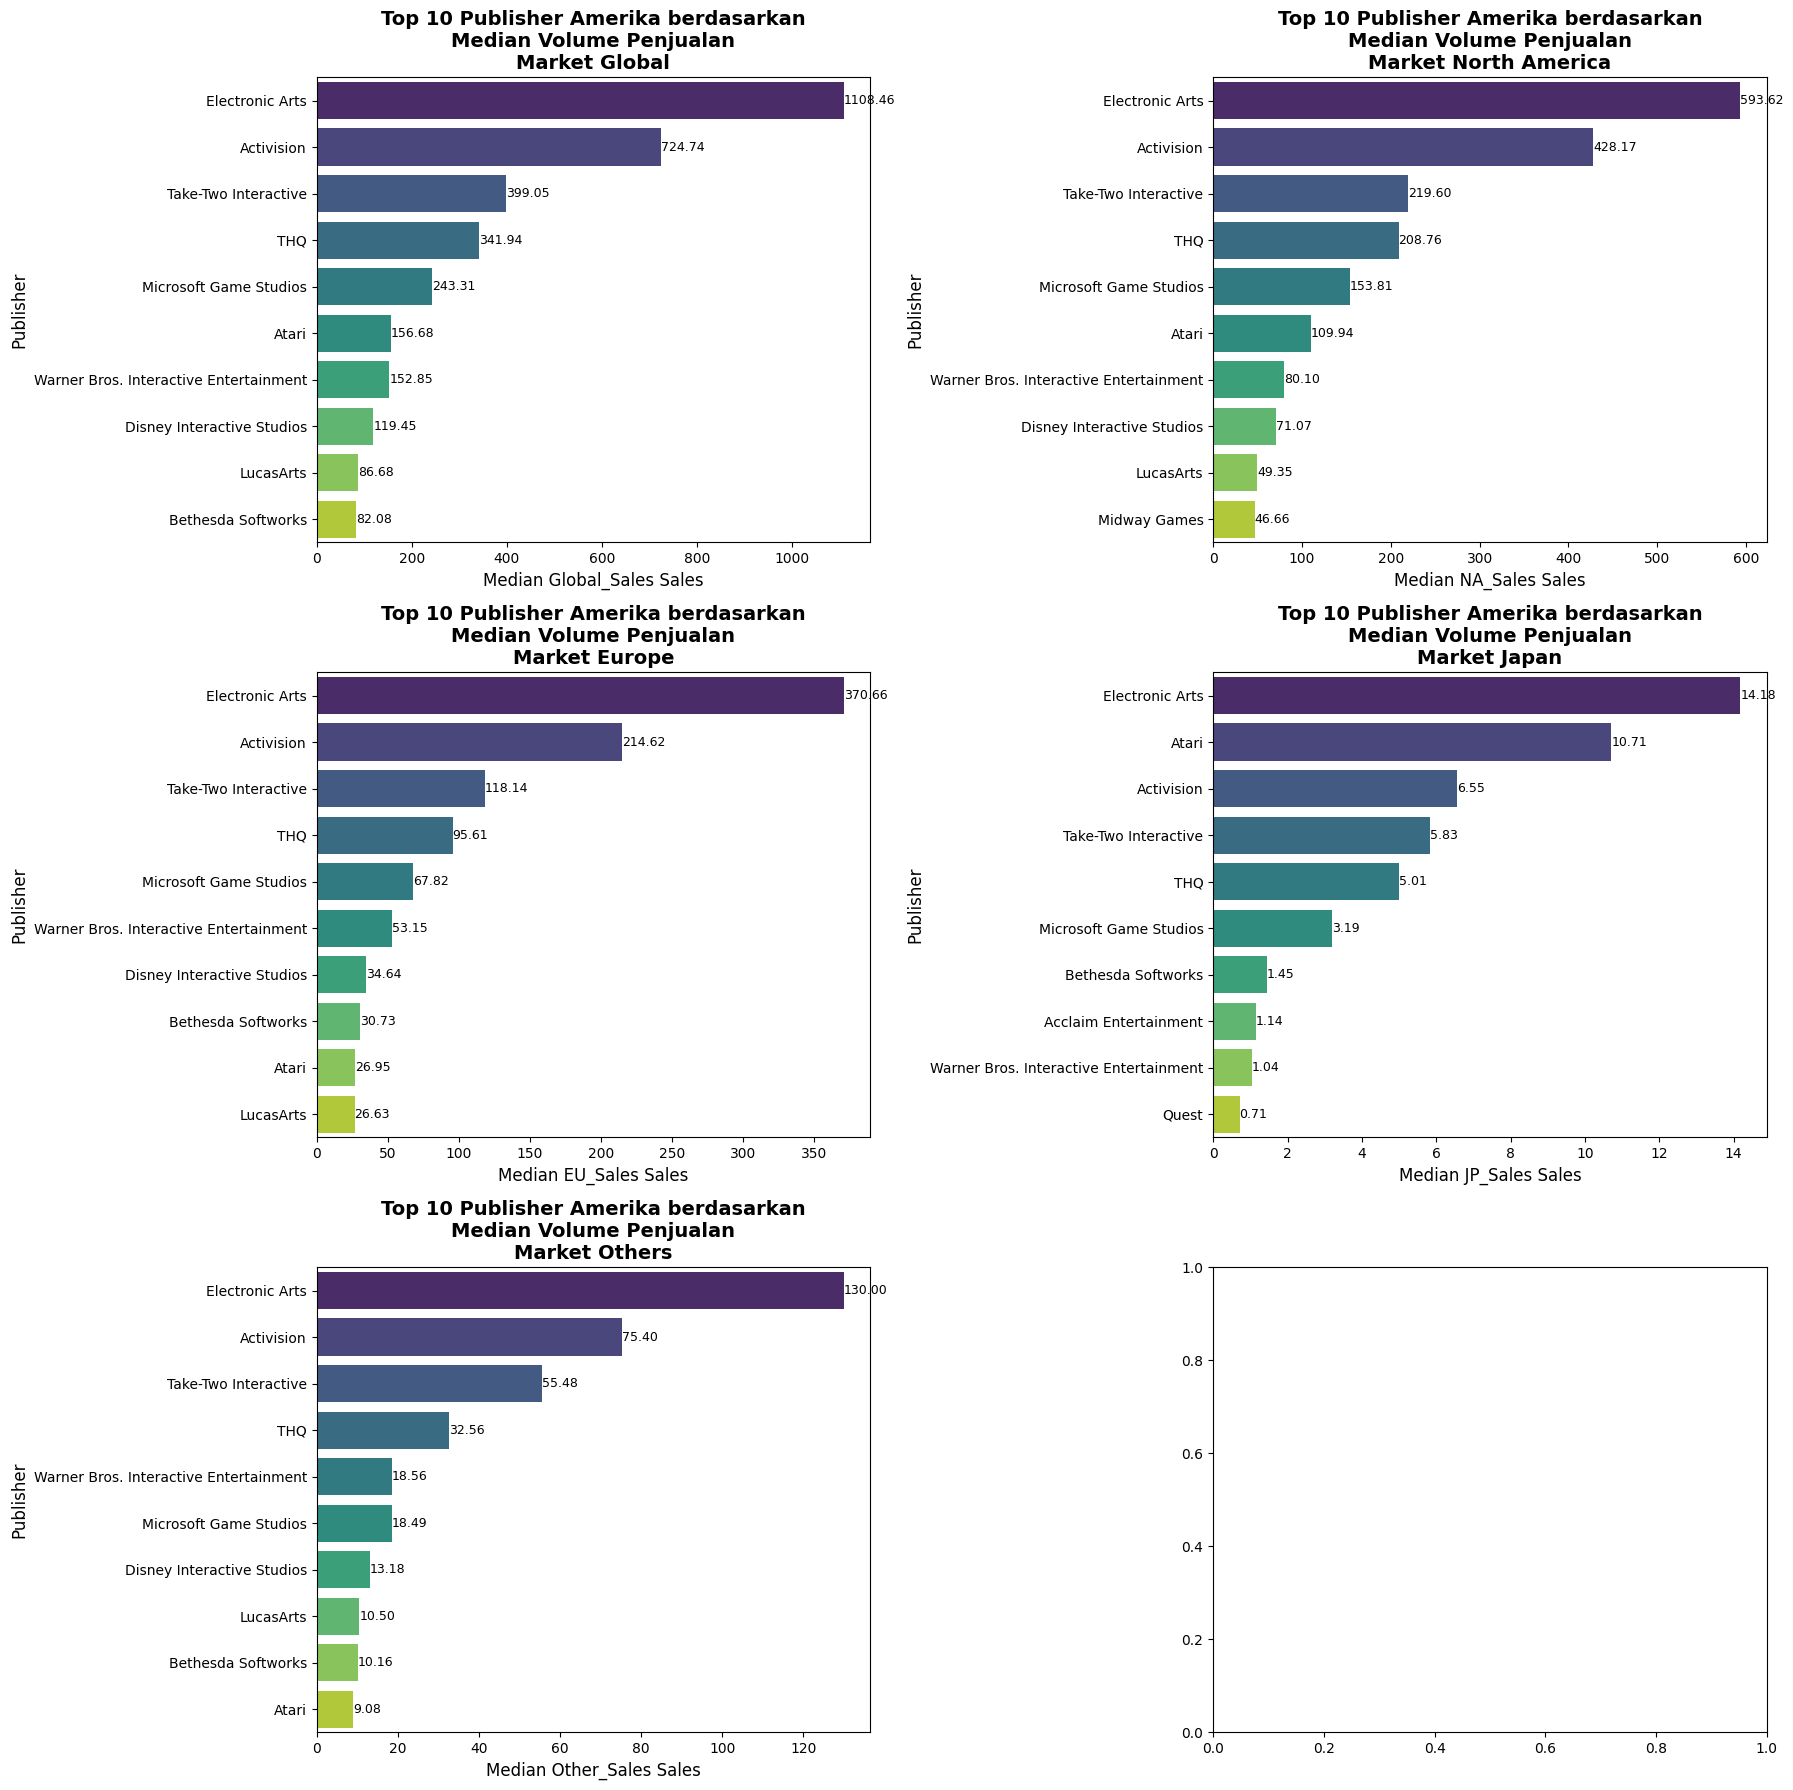

In [396]:
# visualisasi Top 10 Publisher Amerika Berdasarkan Volume Penjualan Secara Global dan per Region dalam bar chart
regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
market=['Global','North America', "Europe", "Japan", "Others"]

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
for i, region in enumerate(regions):
    top_median_sales = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False).head(10)

    sns.barplot(ax=axs[i//2,i%2], data=top_median_sales, y='Publisher', x=region, palette='viridis',hue='Publisher', legend=False)
    axs[i//2,i%2].set_ylabel('Publisher', fontsize=12)
    axs[i//2,i%2].set_xlabel(f'Median {region} Sales', fontsize=12)
    axs[i//2,i%2].set_title(f'Top 10 Publisher Amerika berdasarkan\nMedian Volume Penjualan\nMarket {market[i]}', fontsize=14, fontweight='bold')
    for a in axs[i//2,i%2].patches:
        axs[i//2,i%2].annotate(f'{a.get_width():.2f}', (a.get_width(), a.get_y()+a.get_height()/2),ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [397]:
# uji kruskal
from scipy.stats import kruskal

top_med_us_all = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)
unik_all=top_med_us_all['Publisher'].unique()
top_med_us_all=publisher_sales[publisher_sales['Publisher'].isin(unik_all)]

top_med_us_na = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)
unik_na=top_med_us_na['Publisher'].unique()
top_med_us_na=publisher_sales[publisher_sales['Publisher'].isin(unik_na)]

top_med_us_eu = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)
unik_eu=top_med_us_eu['Publisher'].unique()
top_med_us_eu=publisher_sales[publisher_sales['Publisher'].isin(unik_eu)]

top_med_us_jp = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)
unik_jp=top_med_us_jp['Publisher'].unique()
top_med_us_jp=publisher_sales[publisher_sales['Publisher'].isin(unik_jp)]

top_med_us_ot = publisher_sales[publisher_sales['Publisher_Origin'] == 'Amerika'].groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)
unik_ot=top_med_us_ot['Publisher'].unique()
top_med_us_ot=publisher_sales[publisher_sales['Publisher'].isin(unik_ot)]

dataframes = [top_med_us_all, top_med_us_na, top_med_us_eu, top_med_us_jp, top_med_us_ot]
markets=['Global', 'North America', 'Europe', 'Japan', 'Others']
sales = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def _kruskal_wallis(data,market,sales):
    sales_data={}
    df=data
    alpha=0.05

    for publisher in df['Publisher'].unique():
        sales_data[publisher] = df[df['Publisher'] == publisher][sales]

    stat, pvalue = kruskal(*sales_data.values())

    if pvalue > alpha:
        print(f'P-Value: {pvalue:.5f} > {alpha}. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}.')
    else:
        print(f"P-Value: {pvalue:.5f} <= {alpha}. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}. Tapi kita tidak tahu yang mana.")

for i in range(len(dataframes)):
    _kruskal_wallis(dataframes[i],markets[i],sales[i])

P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Global. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market North America. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Europe. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Japan. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Others. Tapi kita tidak tahu yang mana.


> Dari hasil diatas dapat diartikan bahwa top 10 publisher yang berasal dari Amerika memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Hal ini dapat menjadi indikator potensial untuk mengatakan bahwa publisher tersebut memiliki produk yang berkualitas atau strategi pemasaran yang efektif. Berikut merupakan ringkasan Top 10 Publisher Amerika yang dapat dijadikan pertimbangan.

In [398]:
# menampilkan Top 10 Publisher Amerika Berdasarkan Volume Penjualan Secara Global dan per Region dalam tabel
publisher_sales_us=publisher_sales[publisher_sales['Publisher_Origin']=='Amerika']
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_us={}
for col in sales:
    top_pub=publisher_sales_us.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    dict_pub_sales_us[col]=top_pub['Publisher'].tolist()

result=pd.DataFrame(dict_pub_sales_us)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP 10 North America', 'TOP 10 Europe', 'TOP 10 Japan', 'TOP 10 Other']
print('Top 10 Publisher Asal Amerika Berdasarkan Volume Penjualan Secara Global dan per Region')
result

Top 10 Publisher Asal Amerika Berdasarkan Volume Penjualan Secara Global dan per Region


Rank                           TOP 10 Global  \
0     1                         Electronic Arts   
1     2                              Activision   
2     3                    Take-Two Interactive   
3     4                                     THQ   
4     5                  Microsoft Game Studios   
5     6                                   Atari   
6     7  Warner Bros. Interactive Entertainment   
7     8              Disney Interactive Studios   
8     9                               LucasArts   
9    10                      Bethesda Softworks   

                     TOP 10 North America  \
0                         Electronic Arts   
1                              Activision   
2                    Take-Two Interactive   
3                                     THQ   
4                  Microsoft Game Studios   
5                                   Atari   
6  Warner Bros. Interactive Entertainment   
7              Disney Interactive Studios   
8                               LucasArts   
9                            Midway Games   

                            TOP 10 Europe  \
0                         Electronic Arts   
1                              Activision   
2                    Take-Two Interactive   
3                                     THQ   
4                  Microsoft Game Studios   
5  Warner Bros. Interactive Entertainment   
6              Disney Interactive Studios   
7                      Bethesda Softworks   
8                                   Atari   
9                               LucasArts   

                             TOP 10 Japan  \
0                         Electronic Arts   
1                                   Atari   
2                              Activision   
3                    Take-Two Interactive   
4                                     THQ   
5                  Microsoft Game Studios   
6                      Bethesda Softworks   
7                   Acclaim Entertainment   
8  Warner Bros. Interactive Entertainment   
9                                   Quest   

                             TOP 10 Other  
0                         Electronic Arts  
1                              Activision  
2                    Take-Two Interactive  
3                                     THQ  
4  Warner Bros. Interactive Entertainment  
5                  Microsoft Game Studios  
6              Disney Interactive Studios  
7                               LucasArts  
8                      Bethesda Softworks  
9                                   Atari

> **Top 10 Publisher Asal Eropa**
>> Dari seluruh Publisher yang berasal dari Eropa, akan dilakukan analisa terhadap 10 Publisher terbaik yang menghasilkan volume penjualan tertinggi secara global maupun setiap regionnya.

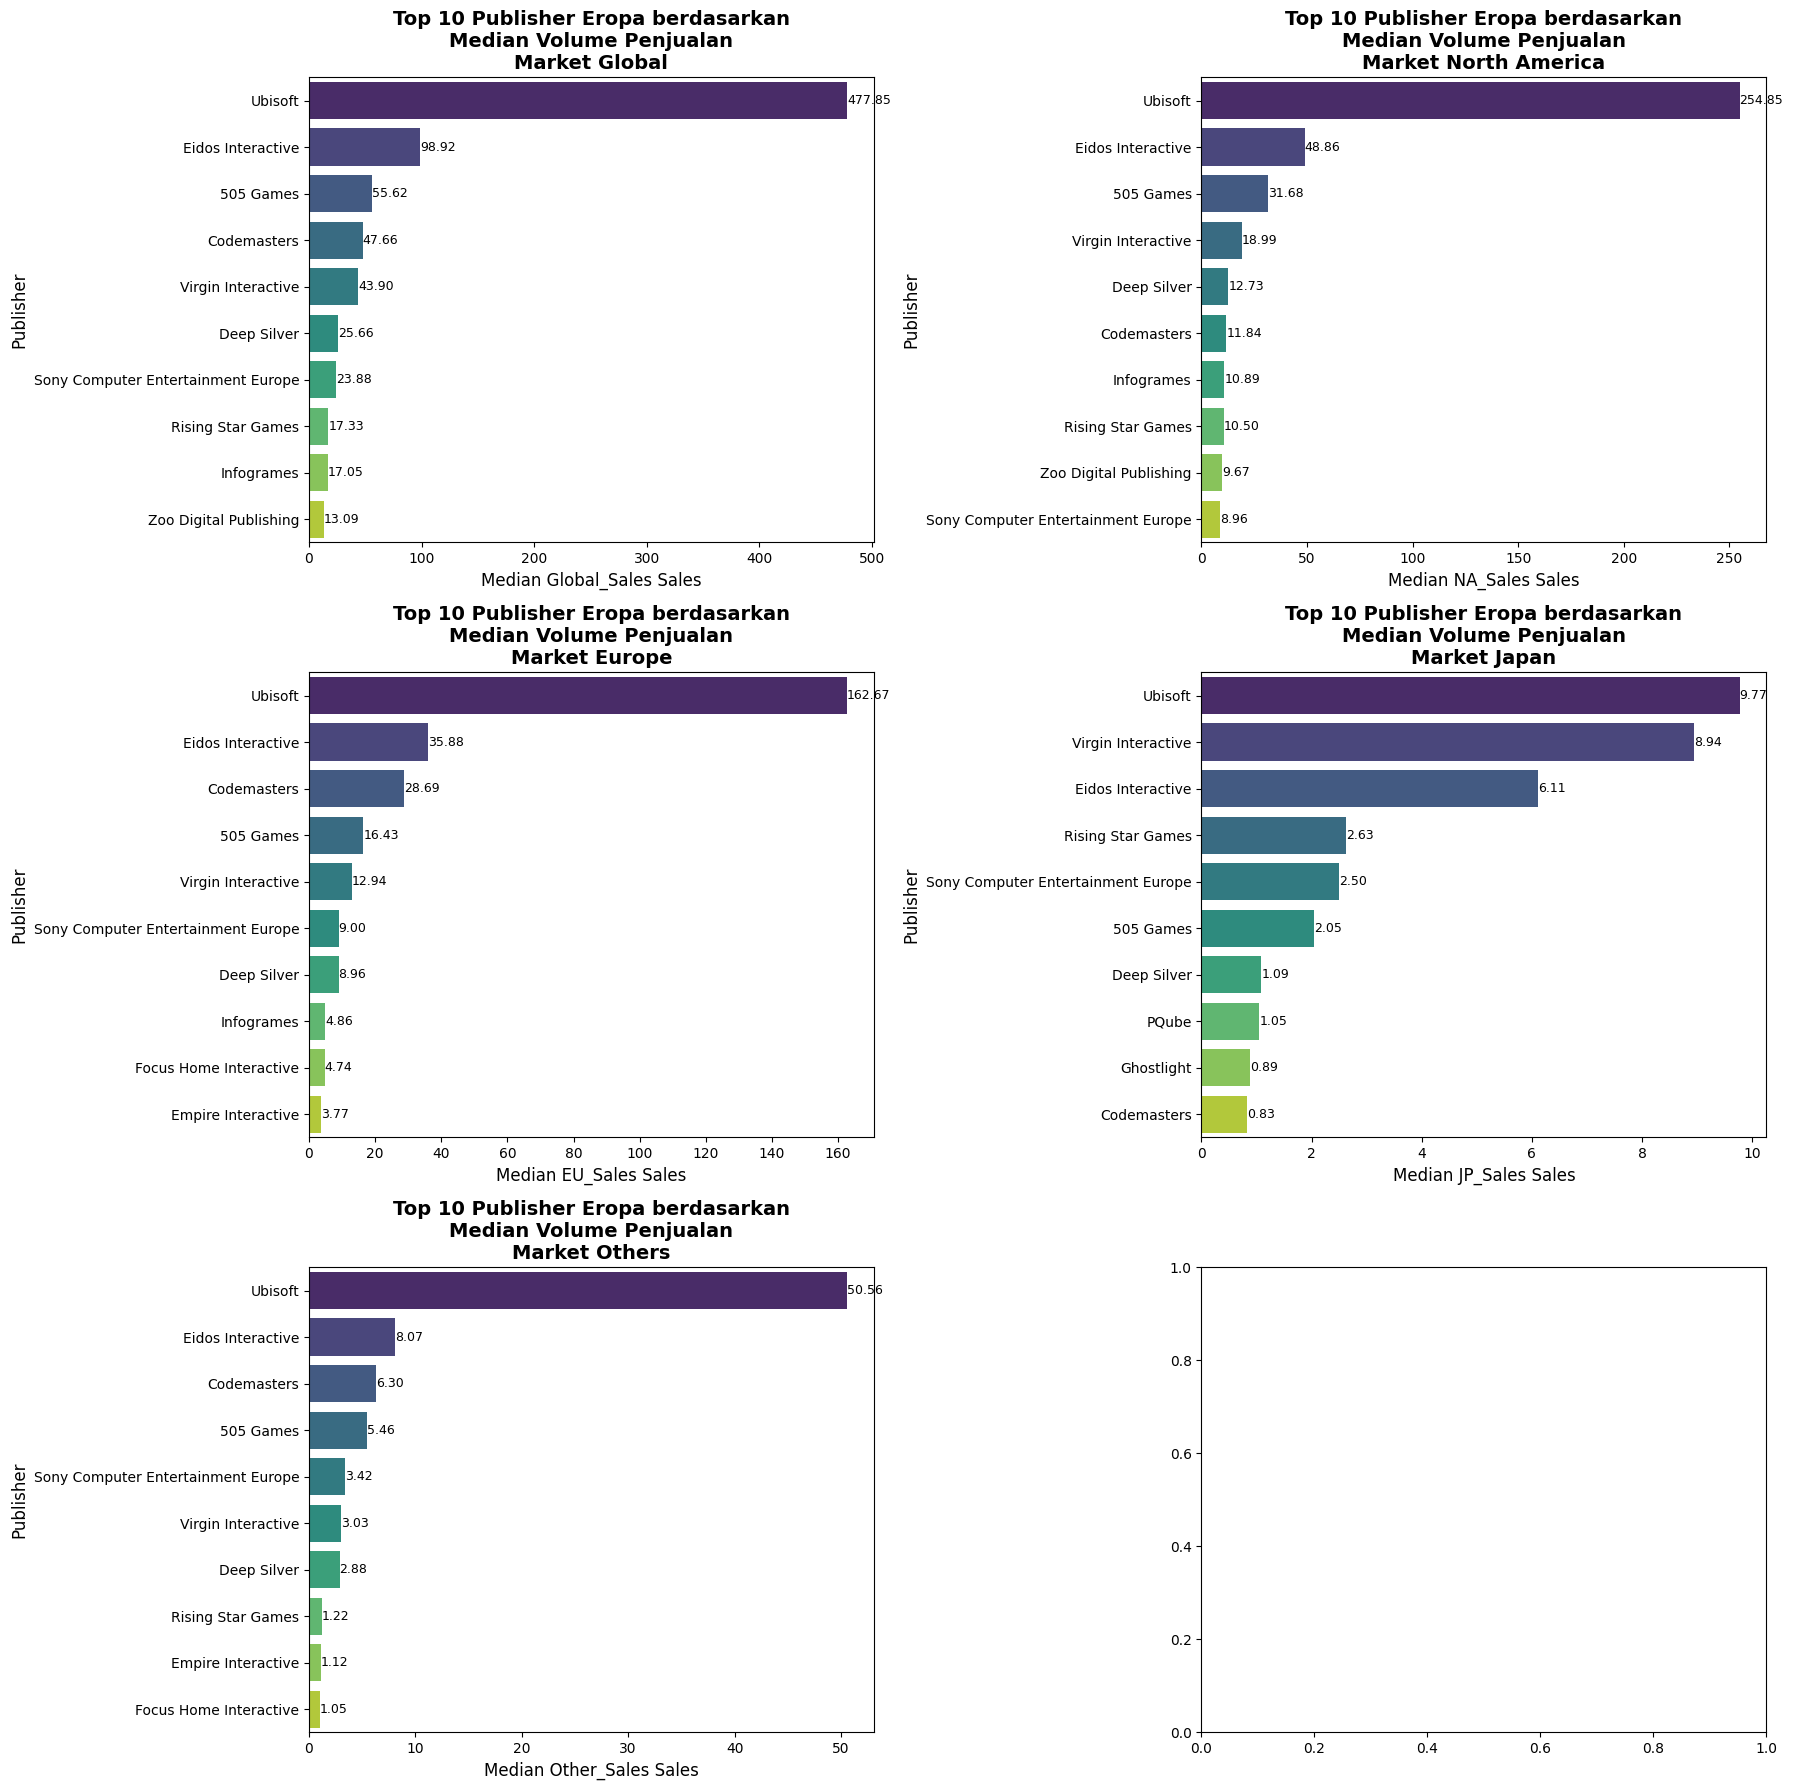

In [399]:
# visualisasi Top 10 Publisher Eropa Berdasarkan Volume Penjualan Secara Global dan per Region dalam bar chart
regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
market=['Global','North America', "Europe", "Japan", "Others"]

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
for i, region in enumerate(regions):
    top_median_sales = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False).head(10)

    sns.barplot(ax=axs[i//2,i%2], data=top_median_sales, y='Publisher', x=region, palette='viridis',hue='Publisher', legend=False)
    axs[i//2,i%2].set_ylabel('Publisher', fontsize=12)
    axs[i//2,i%2].set_xlabel(f'Median {region} Sales', fontsize=12)
    axs[i//2,i%2].set_title(f'Top 10 Publisher Eropa berdasarkan\nMedian Volume Penjualan\nMarket {market[i]}', fontsize=14, fontweight='bold')
    for a in axs[i//2,i%2].patches:
        axs[i//2,i%2].annotate(f'{a.get_width():.2f}', (a.get_width(), a.get_y()+a.get_height()/2),ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [400]:
# uji kruskal
from scipy.stats import kruskal

top_med_us_all = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)
unik_all=top_med_us_all['Publisher'].unique()
top_med_us_all=publisher_sales[publisher_sales['Publisher'].isin(unik_all)]

top_med_us_na = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)
unik_na=top_med_us_na['Publisher'].unique()
top_med_us_na=publisher_sales[publisher_sales['Publisher'].isin(unik_na)]

top_med_us_eu = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)
unik_eu=top_med_us_eu['Publisher'].unique()
top_med_us_eu=publisher_sales[publisher_sales['Publisher'].isin(unik_eu)]

top_med_us_jp = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)
unik_jp=top_med_us_jp['Publisher'].unique()
top_med_us_jp=publisher_sales[publisher_sales['Publisher'].isin(unik_jp)]

top_med_us_ot = publisher_sales[publisher_sales['Publisher_Origin'] == 'Eropa'].groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)
unik_ot=top_med_us_ot['Publisher'].unique()
top_med_us_ot=publisher_sales[publisher_sales['Publisher'].isin(unik_ot)]

dataframes = [top_med_us_all, top_med_us_na, top_med_us_eu, top_med_us_jp, top_med_us_ot]
markets=['Global', 'North America', 'Europe', 'Japan', 'Others']
sales = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def _kruskal_wallis(data,market,sales):
    sales_data={}
    df=data
    alpha=0.05

    for publisher in df['Publisher'].unique():
        sales_data[publisher] = df[df['Publisher'] == publisher][sales]

    stat, pvalue = kruskal(*sales_data.values())

    if pvalue > alpha:
        print(f'P-Value: {pvalue:.5f} > {alpha}. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}.')
    else:
        print(f"P-Value: {pvalue:.5f} <= {alpha}. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}. Tapi kita tidak tahu yang mana.")

for i in range(len(dataframes)):
    _kruskal_wallis(dataframes[i],markets[i],sales[i])

P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Global. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market North America. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Europe. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Japan. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Others. Tapi kita tidak tahu yang mana.


> Dari hasil diatas dapat diartikan bahwa top 10 publisher yang berasal dari Eropa memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Hal ini dapat menjadi indikator potensial untuk mengatakan bahwa publisher tersebut memiliki produk yang berkualitas atau strategi pemasaran yang efektif. Berikut merupakan ringkasan Top 10 Publisher Eropa yang dapat dijadikan pertimbangan.

In [401]:
# menampilkan Top 10 Publisher Eropa Berdasarkan Volume Penjualan Secara Global dan per Region dalam tabel
publisher_sales_eu=publisher_sales[publisher_sales['Publisher_Origin']=='Eropa']
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_eu={}
for col in sales:
    top_pub=publisher_sales_eu.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    dict_pub_sales_eu[col]=top_pub['Publisher'].tolist()

result=pd.DataFrame(dict_pub_sales_eu)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP 10 North America', 'TOP 10 Europe', 'TOP 10 Japan', 'TOP 10 Other']
print('Top 10 Publisher Asal Eropa Berdasarkan Volume Penjualan Secara Global dan per Region')
result

Top 10 Publisher Asal Eropa Berdasarkan Volume Penjualan Secara Global dan per Region


Rank                       TOP 10 Global  \
0     1                             Ubisoft   
1     2                   Eidos Interactive   
2     3                           505 Games   
3     4                         Codemasters   
4     5                  Virgin Interactive   
5     6                         Deep Silver   
6     7  Sony Computer Entertainment Europe   
7     8                   Rising Star Games   
8     9                          Infogrames   
9    10              Zoo Digital Publishing   

                 TOP 10 North America                       TOP 10 Europe  \
0                             Ubisoft                             Ubisoft   
1                   Eidos Interactive                   Eidos Interactive   
2                           505 Games                         Codemasters   
3                  Virgin Interactive                           505 Games   
4                         Deep Silver                  Virgin Interactive   
5                         Codemasters  Sony Computer Entertainment Europe   
6                          Infogrames                         Deep Silver   
7                   Rising Star Games                          Infogrames   
8              Zoo Digital Publishing              Focus Home Interactive   
9  Sony Computer Entertainment Europe                  Empire Interactive   

                         TOP 10 Japan                        TOP 10 Other  
0                             Ubisoft                             Ubisoft  
1                  Virgin Interactive                   Eidos Interactive  
2                   Eidos Interactive                         Codemasters  
3                   Rising Star Games                           505 Games  
4  Sony Computer Entertainment Europe  Sony Computer Entertainment Europe  
5                           505 Games                  Virgin Interactive  
6                         Deep Silver                         Deep Silver  
7                               PQube                   Rising Star Games  
8                          Ghostlight                  Empire Interactive  
9                         Codemasters              Focus Home Interactive

> **Top 10 Publisher Asal Jepang**
>> Dari seluruh Publisher yang berasal dari Jepang, akan dilakukan analisa terhadap 10 Publisher terbaik yang menghasilkan volume penjualan tertinggi secara global maupun setiap regionnya.

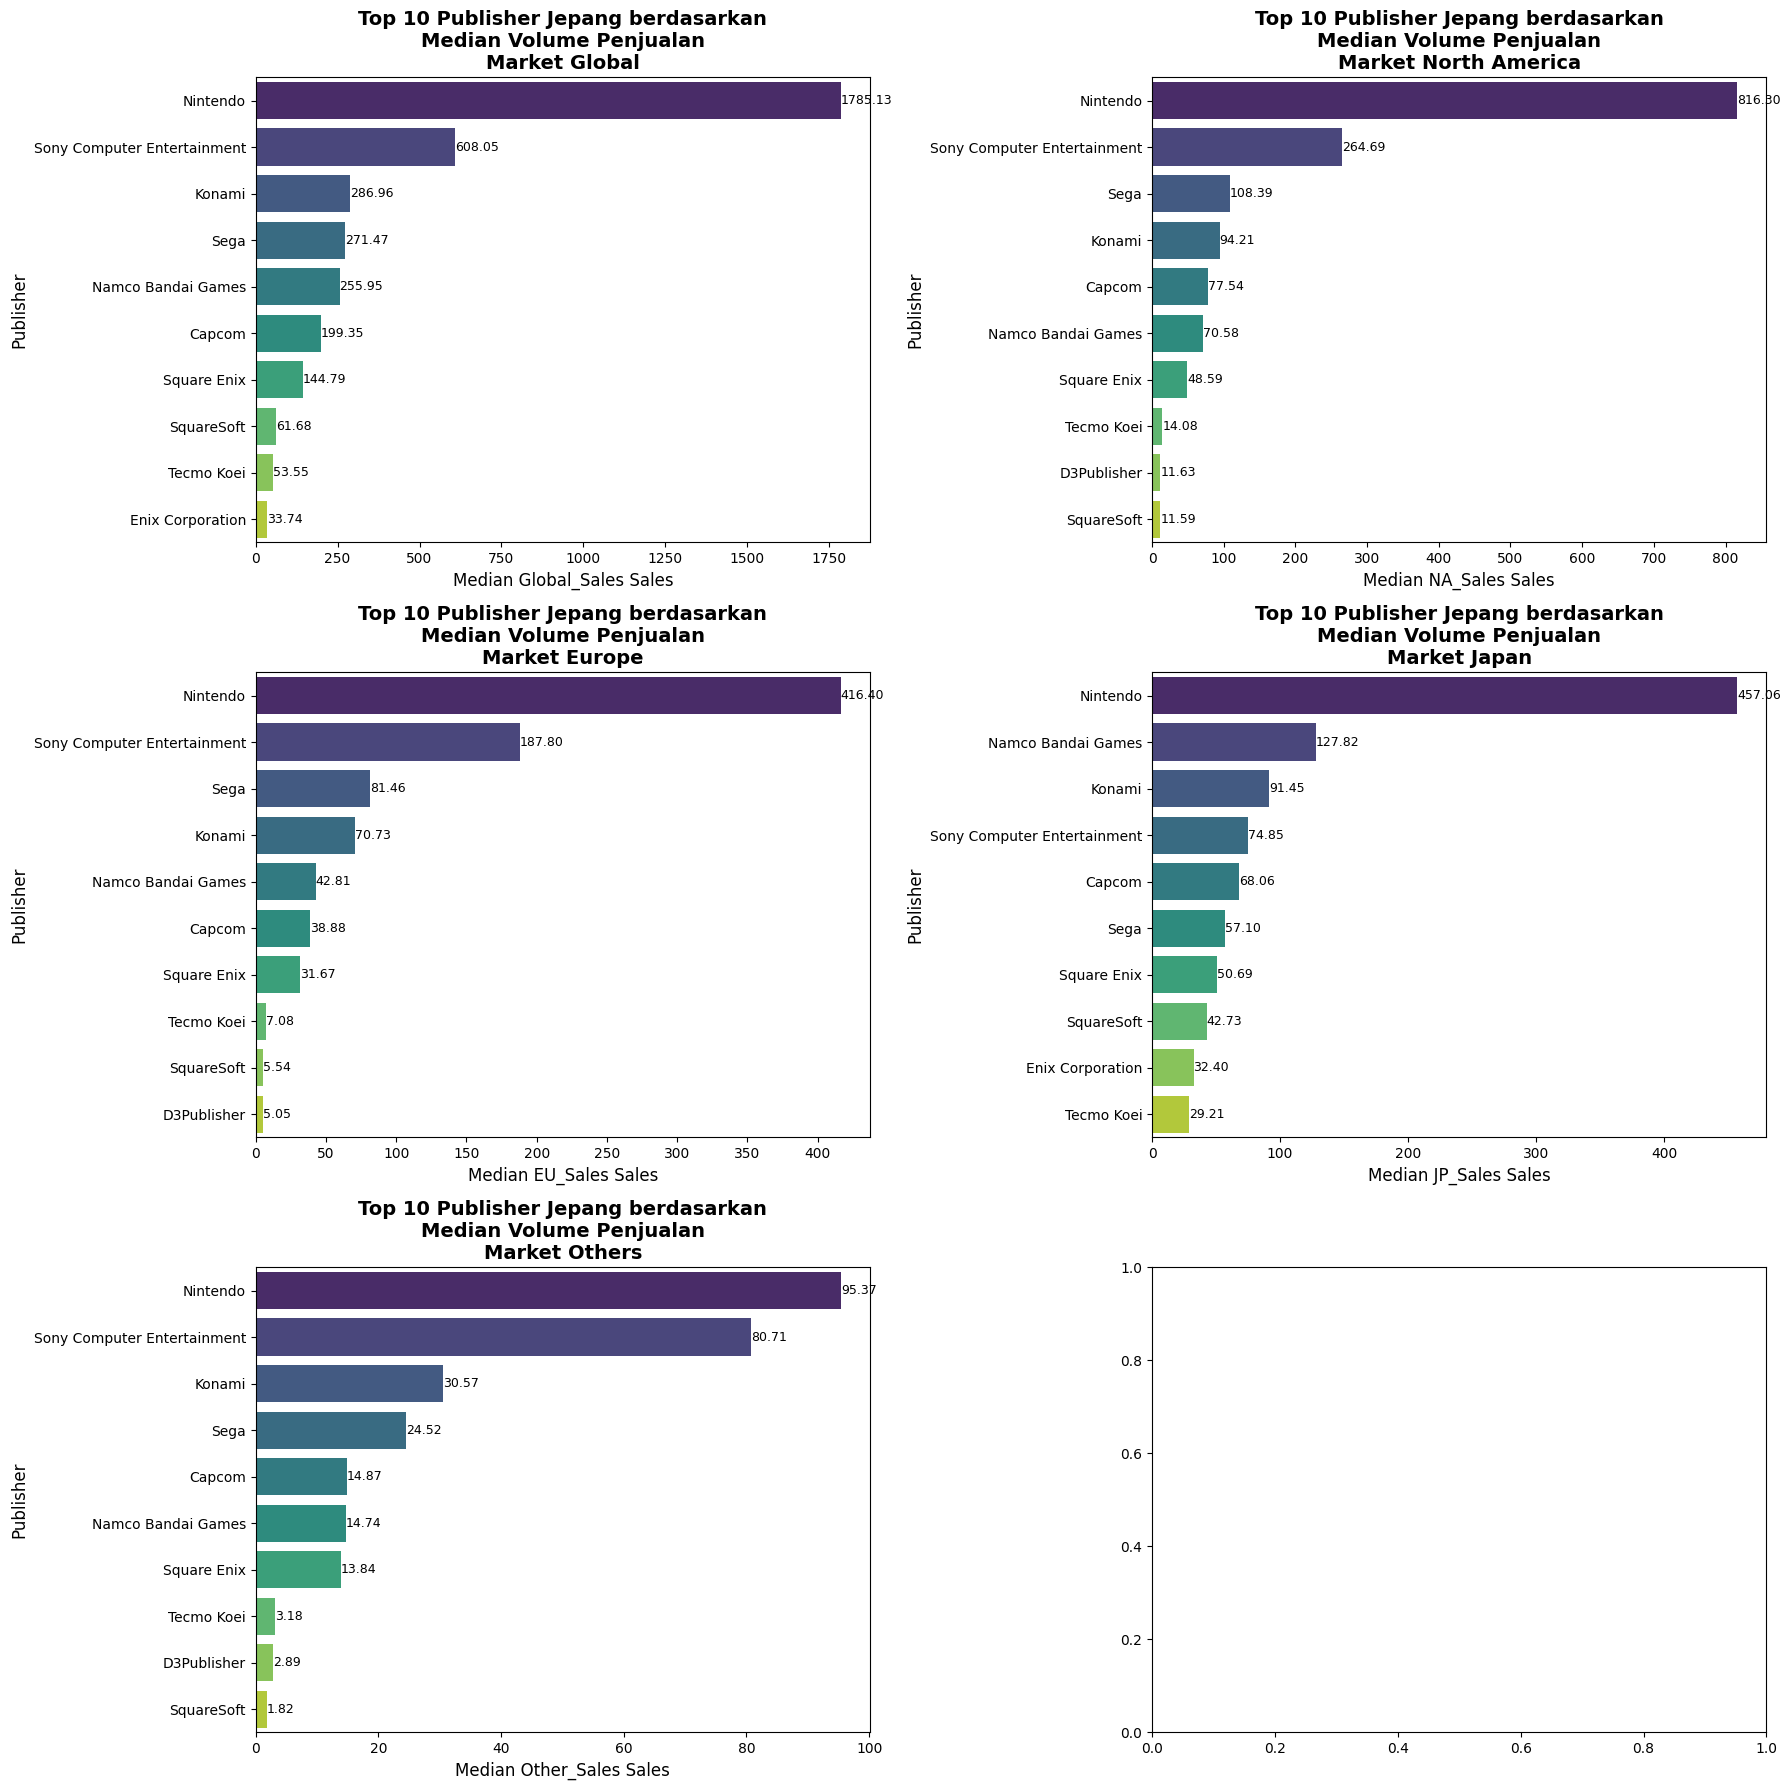

In [402]:
regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
market=['Global','North America', "Europe", "Japan", "Others"]

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
for i, region in enumerate(regions):
    top_median_sales = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False).head(10)

    sns.barplot(ax=axs[i//2,i%2], data=top_median_sales, y='Publisher', x=region, palette='viridis',hue='Publisher', legend=False)
    axs[i//2,i%2].set_ylabel('Publisher', fontsize=12)
    axs[i//2,i%2].set_xlabel(f'Median {region} Sales', fontsize=12)
    axs[i//2,i%2].set_title(f'Top 10 Publisher Jepang berdasarkan\nMedian Volume Penjualan\nMarket {market[i]}', fontsize=14, fontweight='bold')
    for a in axs[i//2,i%2].patches:
        axs[i//2,i%2].annotate(f'{a.get_width():.2f}', (a.get_width(), a.get_y()+a.get_height()/2),ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [403]:
from scipy.stats import kruskal

top_med_us_all = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)
unik_all=top_med_us_all['Publisher'].unique()
top_med_us_all=publisher_sales[publisher_sales['Publisher'].isin(unik_all)]

top_med_us_na = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)
unik_na=top_med_us_na['Publisher'].unique()
top_med_us_na=publisher_sales[publisher_sales['Publisher'].isin(unik_na)]

top_med_us_eu = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)
unik_eu=top_med_us_eu['Publisher'].unique()
top_med_us_eu=publisher_sales[publisher_sales['Publisher'].isin(unik_eu)]

top_med_us_jp = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)
unik_jp=top_med_us_jp['Publisher'].unique()
top_med_us_jp=publisher_sales[publisher_sales['Publisher'].isin(unik_jp)]

top_med_us_ot = publisher_sales[publisher_sales['Publisher_Origin'] == 'Jepang'].groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)
unik_ot=top_med_us_ot['Publisher'].unique()
top_med_us_ot=publisher_sales[publisher_sales['Publisher'].isin(unik_ot)]

dataframes = [top_med_us_all, top_med_us_na, top_med_us_eu, top_med_us_jp, top_med_us_ot]
markets=['Global', 'North America', 'Europe', 'Japan', 'Others']
sales = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def _kruskal_wallis(data,market,sales):
    sales_data={}
    df=data
    alpha=0.05

    for publisher in df['Publisher'].unique():
        sales_data[publisher] = df[df['Publisher'] == publisher][sales]

    stat, pvalue = kruskal(*sales_data.values())

    if pvalue > alpha:
        print(f'P-Value: {pvalue:.5f} > {alpha}. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}.')
    else:
        print(f"P-Value: {pvalue:.5f} <= {alpha}. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}. Tapi kita tidak tahu yang mana.")

for i in range(len(dataframes)):
    _kruskal_wallis(dataframes[i],markets[i],sales[i])

P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Global. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market North America. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Europe. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Japan. Tapi kita tidak tahu yang mana.
P-Value: 0.00000 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Others. Tapi kita tidak tahu yang mana.


> Dari hasil diatas dapat diartikan bahwa top 10 publisher yang berasal dari Jepang memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Hal ini dapat menjadi indikator potensial untuk mengatakan bahwa publisher tersebut memiliki produk yang berkualitas atau strategi pemasaran yang efektif. Berikut merupakan ringkasan Top 10 Publisher Jepang yang dapat dijadikan pertimbangan.

In [404]:
# menampilkan Top 10 Publisher Jepang Berdasarkan Volume Penjualan Secara Global dan per Region dalam tabel
publisher_sales_jpn=publisher_sales[publisher_sales['Publisher_Origin']=='Jepang']
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_jpn={}
for col in sales:
    top_pub=publisher_sales_jpn.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    dict_pub_sales_jpn[col]=top_pub['Publisher'].tolist()

result=pd.DataFrame(dict_pub_sales_jpn)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP 10 North America', 'TOP 10 Europe', 'TOP 10 Japan', 'TOP 10 Other']
print('Top 10 Publisher Asal Jepang Berdasarkan Volume Penjualan Secara Global dan per Region')
result

Top 10 Publisher Asal Jepang Berdasarkan Volume Penjualan Secara Global dan per Region


Rank                TOP 10 Global         TOP 10 North America  \
0     1                     Nintendo                     Nintendo   
1     2  Sony Computer Entertainment  Sony Computer Entertainment   
2     3                       Konami                         Sega   
3     4                         Sega                       Konami   
4     5           Namco Bandai Games                       Capcom   
5     6                       Capcom           Namco Bandai Games   
6     7                  Square Enix                  Square Enix   
7     8                   SquareSoft                   Tecmo Koei   
8     9                   Tecmo Koei                  D3Publisher   
9    10             Enix Corporation                   SquareSoft   

                 TOP 10 Europe                 TOP 10 Japan  \
0                     Nintendo                     Nintendo   
1  Sony Computer Entertainment           Namco Bandai Games   
2                         Sega                       Konami   
3                       Konami  Sony Computer Entertainment   
4           Namco Bandai Games                       Capcom   
5                       Capcom                         Sega   
6                  Square Enix                  Square Enix   
7                   Tecmo Koei                   SquareSoft   
8                   SquareSoft             Enix Corporation   
9                  D3Publisher                   Tecmo Koei   

                  TOP 10 Other  
0                     Nintendo  
1  Sony Computer Entertainment  
2                       Konami  
3                         Sega  
4                       Capcom  
5           Namco Bandai Games  
6                  Square Enix  
7                   Tecmo Koei  
8                  D3Publisher  
9                   SquareSoft

> **Top 10 Publisher Lainnya**
>> Dari Publisher lainnya, akan dilakukan analisa terhadap 10 Publisher terbaik yang menghasilkan volume penjualan tertinggi secara global maupun setiap regionnya.

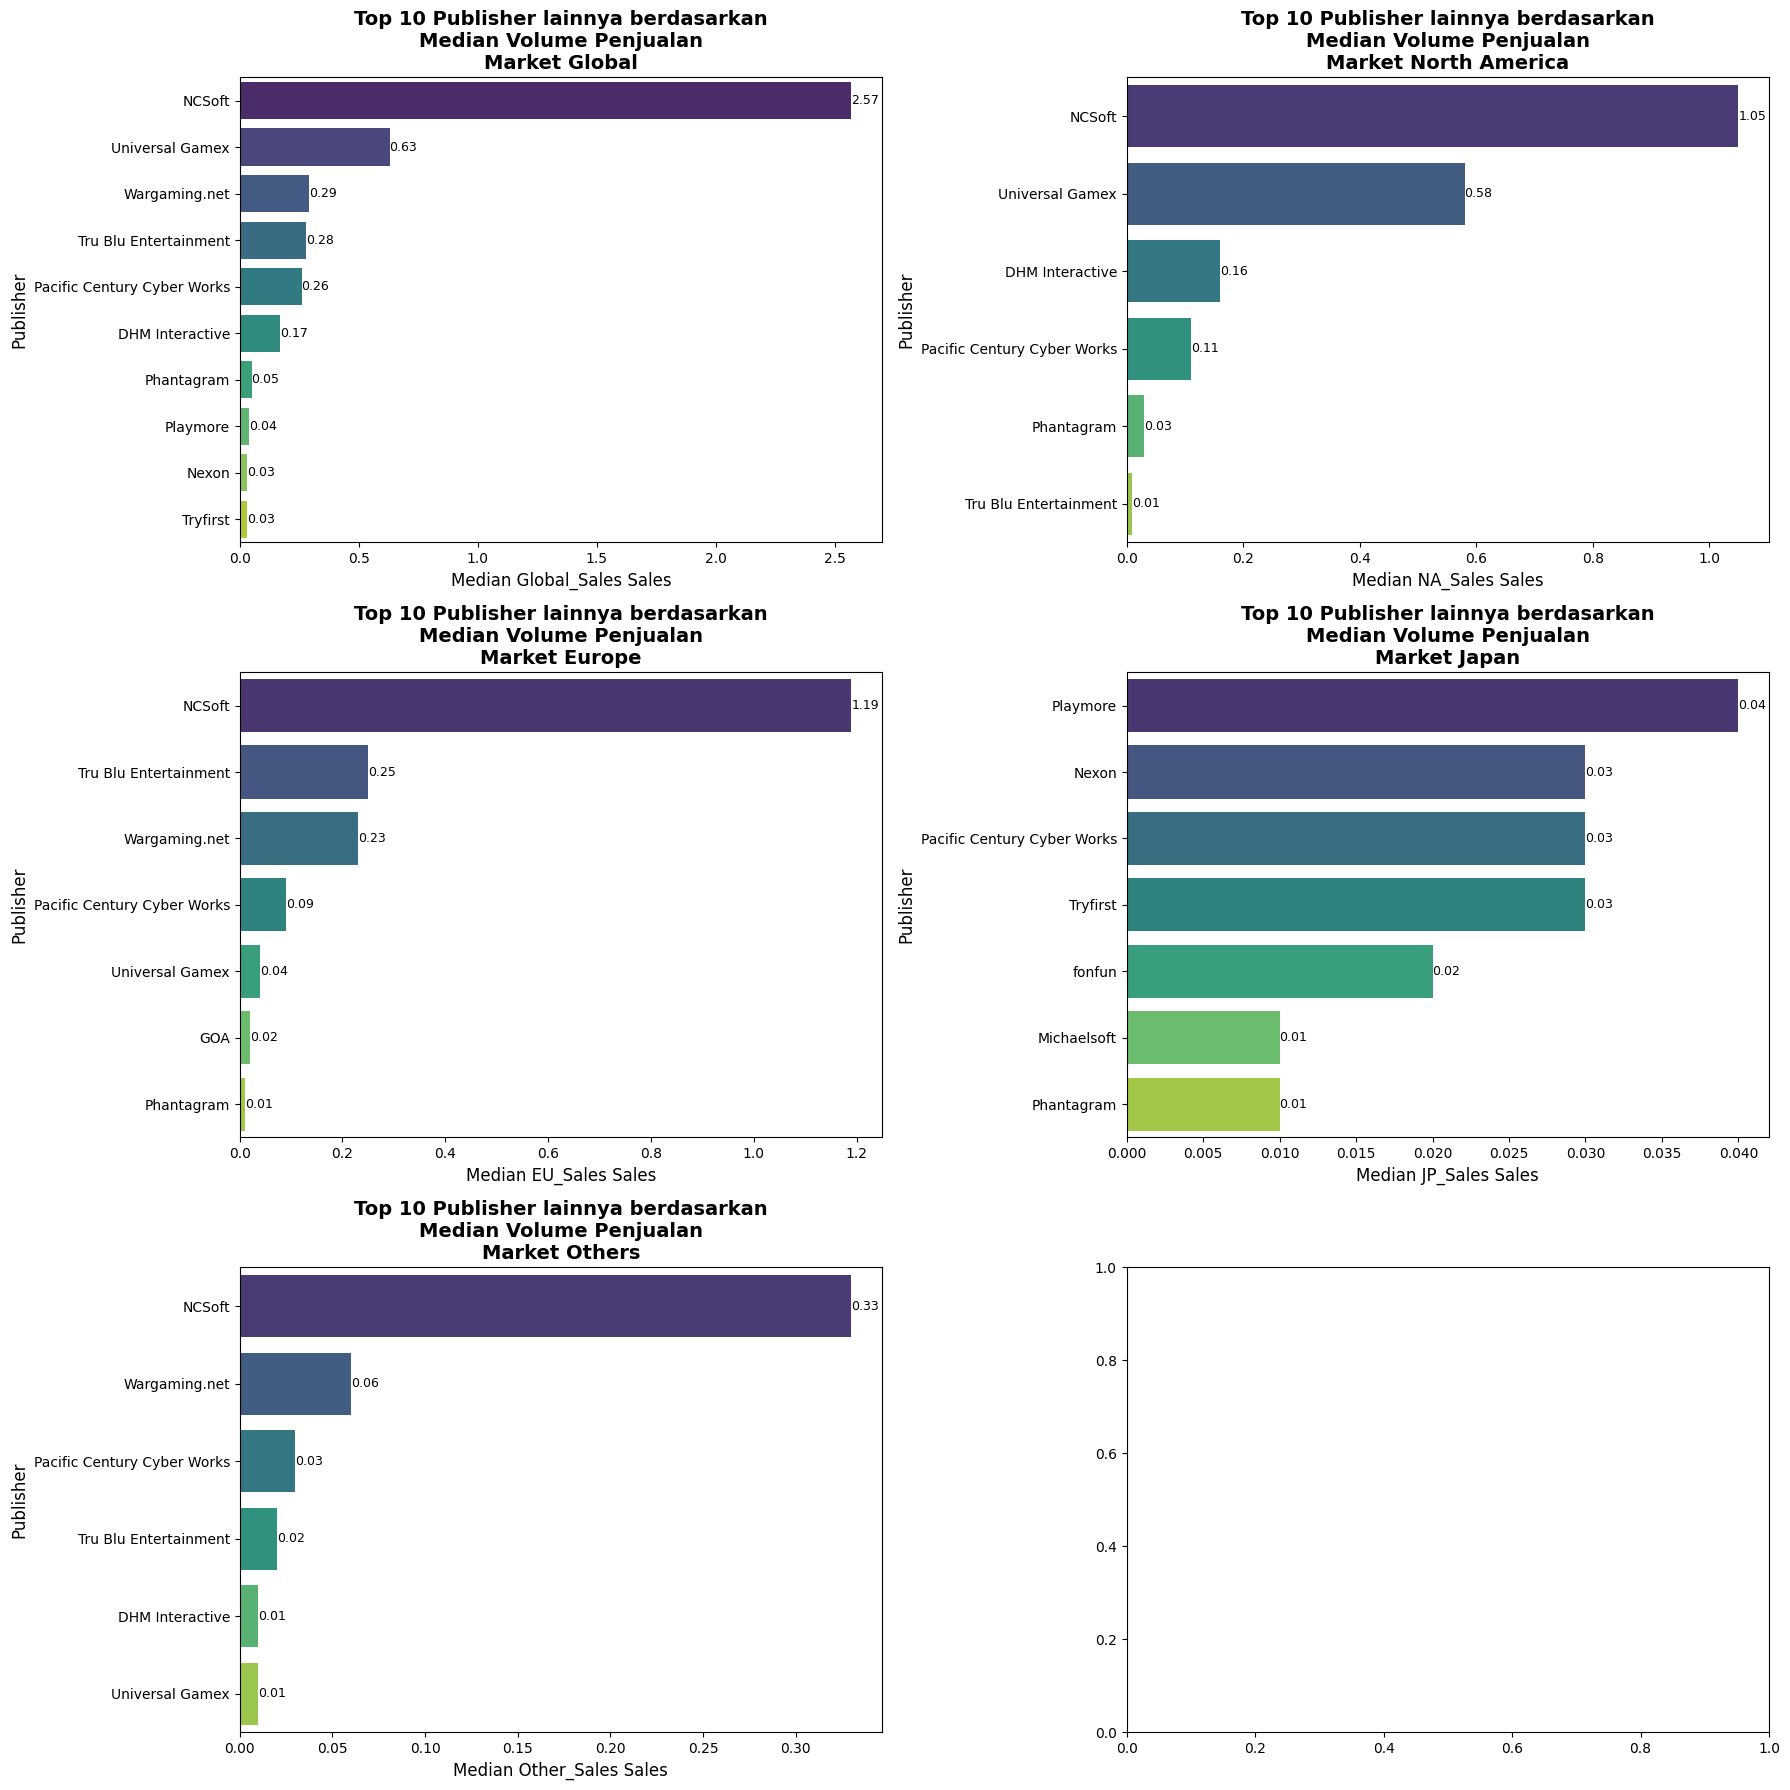

In [405]:
regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
market=['Global','North America', "Europe", "Japan", "Others"]

fig, axs = plt.subplots(3, 2, figsize=(18, 18))
for i, region in enumerate(regions):
    if region=='Global_Sales':
        top__sales = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False).head(10)
    else:
        top__sales = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')[region].sum().reset_index().sort_values(region, ascending=False)
        top__sales =top__sales[top__sales[region] != 0]

    sns.barplot(ax=axs[i//2,i%2], data=top__sales, y='Publisher', x=region, palette='viridis',hue='Publisher', legend=False)
    axs[i//2,i%2].set_ylabel('Publisher', fontsize=12)
    axs[i//2,i%2].set_xlabel(f'Median {region} Sales', fontsize=12)
    axs[i//2,i%2].set_title(f'Top 10 Publisher lainnya berdasarkan\nMedian Volume Penjualan\nMarket {market[i]}', fontsize=14, fontweight='bold')
    for a in axs[i//2,i%2].patches:
        axs[i//2,i%2].annotate(f'{a.get_width():.2f}', (a.get_width(), a.get_y()+a.get_height()/2),ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [406]:
# uji kruskal
from scipy.stats import kruskal

top_med_us_all = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(10)
top_med_us_all =top_med_us_all [top_med_us_all ['Global_Sales'] != 0]
unik_all=top_med_us_all['Publisher'].unique()
top_med_us_all=publisher_sales[publisher_sales['Publisher'].isin(unik_all)]

top_med_us_na = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales', ascending=False).head(10)
top_med_us_na=top_med_us_na[top_med_us_na['NA_Sales'] != 0]
unik_na=top_med_us_na['Publisher'].unique()
top_med_us_na=publisher_sales[publisher_sales['Publisher'].isin(unik_na)]

top_med_us_eu = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales', ascending=False).head(10)
top_med_us_eu=top_med_us_eu[top_med_us_eu['EU_Sales'] != 0]
unik_eu=top_med_us_eu['Publisher'].unique()
top_med_us_eu=publisher_sales[publisher_sales['Publisher'].isin(unik_eu)]

top_med_us_jp = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales', ascending=False).head(10)
top_med_us_jp=top_med_us_jp[top_med_us_jp['JP_Sales'] != 0]
unik_jp=top_med_us_jp['Publisher'].unique()
top_med_us_jp=publisher_sales[publisher_sales['Publisher'].isin(unik_jp)]

top_med_us_ot = publisher_sales[publisher_sales['Publisher_Origin'] == 'Other'].groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales', ascending=False).head(10)
top_med_us_ot=top_med_us_ot[top_med_us_ot['Other_Sales'] != 0]
unik_ot=top_med_us_ot['Publisher'].unique()
top_med_us_ot=publisher_sales[publisher_sales['Publisher'].isin(unik_ot)]

dataframes = [top_med_us_all, top_med_us_na, top_med_us_eu, top_med_us_jp, top_med_us_ot]
markets=['Global', 'North America', 'Europe', 'Japan', 'Others']
sales = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def _kruskal_wallis(data,market,sales):
    sales_data={}
    df=data
    alpha=0.05

    for publisher in df['Publisher'].unique():
        sales_data[publisher] = df[df['Publisher'] == publisher][sales]

    stat, pvalue = kruskal(*sales_data.values())

    if pvalue > alpha:
        print(f'P-Value: {pvalue:.5f} > {alpha}. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}.')
    else:
        print(f"P-Value: {pvalue:.5f} <= {alpha}. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market {market}. Tapi kita tidak tahu yang mana.")

for i in range(len(dataframes)):
    _kruskal_wallis(dataframes[i],markets[i],sales[i])

P-Value: 0.46072 > 0.05. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Global.
P-Value: 0.04723 <= 0.05. Minimal ada 1 perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market North America. Tapi kita tidak tahu yang mana.
P-Value: 0.47057 > 0.05. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Europe.
P-Value: 0.42319 > 0.05. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Japan.
P-Value: 0.11394 > 0.05. Tidak ada perbedaan signifikan antara median volume penjualan Top 10 Publisher Amerika di market Others.


>> Dari hasil tersebut, dapat diartikan bahwa publisher-publisher yang tertera memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Namun karena jumlah publisher lainnnya pada data kurang mendeskripsikan nilai kontribusi terhadap volume penjualan yang ada (0.00 dapat diartikan benar-benar volume penjualan 0 atau 0.sekian dalam million unit), maka tidak dapat diambil kesimpulan untuk TOP 10 Publisher. Namun tetap didapatkan Top Publisher lainnya berdasarkan volume penjualan yang tidak nol pada data.

>> Dapat diartikan bahwa top publisher lainnya memiliki kontribusi yang signifikan terhadap pasar secara global maupun regional. Hal ini dapat menjadi indikator potensial untuk mengatakan bahwa publisher tersebut memiliki produk yang berkualitas atau strategi pemasaran yang efektif. Berikut merupakan ringkasan Top 10 Publisher lainnya yang dapat dijadikan pertimbangan.




In [407]:
# menampilkan Top Publisher Lainnya Berdasarkan Volume Penjualan Secara Global dan per Region dalam tabel
publisher_sales_ot=publisher_sales[publisher_sales['Publisher_Origin']=='Other']
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_ot={}
for col in sales:
    top_pub=publisher_sales_ot.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    top_pub=top_pub[top_pub[col] != 0]
    dict_pub_sales_ot[col]=top_pub['Publisher'].tolist()

max_len = max(len(pub_list) for pub_list in dict_pub_sales_ot.values())
for col in dict_pub_sales_ot:
    dict_pub_sales_ot[col] += [''] * (max_len - len(dict_pub_sales_ot[col]))

result=pd.DataFrame(dict_pub_sales_ot)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP North America', 'TOP Europe', 'TOP Japan', 'TOP Other']
print('Top 10 Publisher Lainnya Berdasarkan Volume Penjualan Secara Global dan per Region')
result

Top 10 Publisher Lainnya Berdasarkan Volume Penjualan Secara Global dan per Region


Rank                TOP 10 Global            TOP North America  \
0     1                       NCSoft                       NCSoft   
1     2              Universal Gamex              Universal Gamex   
2     3                Wargaming.net              DHM Interactive   
3     4        Tru Blu Entertainment  Pacific Century Cyber Works   
4     5  Pacific Century Cyber Works                   Phantagram   
5     6              DHM Interactive        Tru Blu Entertainment   
6     7                   Phantagram                                
7     8                     Playmore                                
8     9                        Nexon                                
9    10                     Tryfirst                                

                    TOP Europe                    TOP Japan  \
0                       NCSoft                     Playmore   
1        Tru Blu Entertainment                        Nexon   
2                Wargaming.net  Pacific Century Cyber Works   
3  Pacific Century Cyber Works                     Tryfirst   
4              Universal Gamex                       fonfun   
5                          GOA                  Michaelsoft   
6                   Phantagram                   Phantagram   
7                                                             
8                                                             
9                                                             

                     TOP Other  
0                       NCSoft  
1                Wargaming.net  
2  Pacific Century Cyber Works  
3        Tru Blu Entertainment  
4              DHM Interactive  
5              Universal Gamex  
6                               
7                               
8                               
9

> Dari analisa top pusbliher baik secara keseluruhan maupun berasal dari regional terhadap volume penjualan secara global maupun region, meskipun diketahui bahwa ada perbedaan signifikan dalam volume penjualan yang dihasilkan, kita tidak memiliki informasi spesifik tentang mana pasar yang memiliki median volume penjualan yang lebih tinggi ataupun rendah. Sehingga akan dilakukan analisa tambahan mengenai jumlah game atau jumlah platofm yang dihasilkan publisher, untuk melihat korelasinya terhadap volume penjualan keseluruhan maupun regional

#### **Korelasi Antara Jumlah Game dan Jumlah Platform Berdasarkan Publisher terhadap Volume Penjualan Berdasarkan Publisher**

> Dilakukan analisa mengenai seberapa kuatnya korelasi pada antara banyaknya game yang dirilis oleh setiap publisher secara keseluruhan, banyaknya platform yang di gunakan oleh setiap publisher secara keseluruhan, terhadap volume penjualan secara keseluruhan dan regional.

> Untuk melihat hubungan antara variabel yang telah disebutkan diatas, kami menggunakan visualisasi `heatmap` dengan menggunakan metode `spearman's correlation`.

In [408]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [409]:
publisher_sales_all

Rank                                              Name Platform  Year  \
0         1                                        Wii Sports      Wii  2006   
1         2                                 Super Mario Bros.      NES  1985   
2         3                                    Mario Kart Wii      Wii  2008   
3         4                                 Wii Sports Resort      Wii  2009   
4         5                          Pokemon Red/Pokemon Blue       GB  1996   
...     ...                                               ...      ...   ...   
16071  1012                                  World Poker Tour      GBA  2005   
16072  1012                        Sousaku Alice to Oujisama!      3DS  2015   
16073  1012                                     Empire Deluxe       PC  1992   
16597  1012                                  Spirits & Spells      GBA  2003   
16595  1013  SCORE International Baja 1000: The Official Game      PS2  2008   

              Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0            Sports              Nintendo     41.49     29.02      3.77   
1          Platform              Nintendo     29.08      3.58      6.81   
2            Racing              Nintendo     15.85     12.88      3.79   
3            Sports              Nintendo     15.75     11.01      3.28   
4      Role-Playing              Nintendo     11.27      8.89     10.22   
...             ...                   ...       ...       ...       ...   
16071          Misc  Take-Two Interactive      0.01      0.00      0.00   
16072    Simulation              Happinet      0.00      0.00      0.01   
16073      Strategy   New World Computing      0.01      0.00      0.00   
16597      Platform               Wanadoo      0.01      0.00      0.00   
16595        Racing            Activision      0.00      0.00      0.00   

       Other_Sales  Global_Sales Publisher_Origin  
0             8.46         82.74           Jepang  
1             0.77         40.24           Jepang  
2             3.31         35.83           Jepang  
3             2.96         33.00           Jepang  
4             1.00         31.38           Jepang  
...            ...           ...              ...  
16071         0.00          0.01          Amerika  
16072         0.00          0.01           Jepang  
16073         0.00          0.01          Amerika  
16597         0.00          0.01            Eropa  
16595         0.00          0.00          Amerika  

[16453 rows x 12 columns]

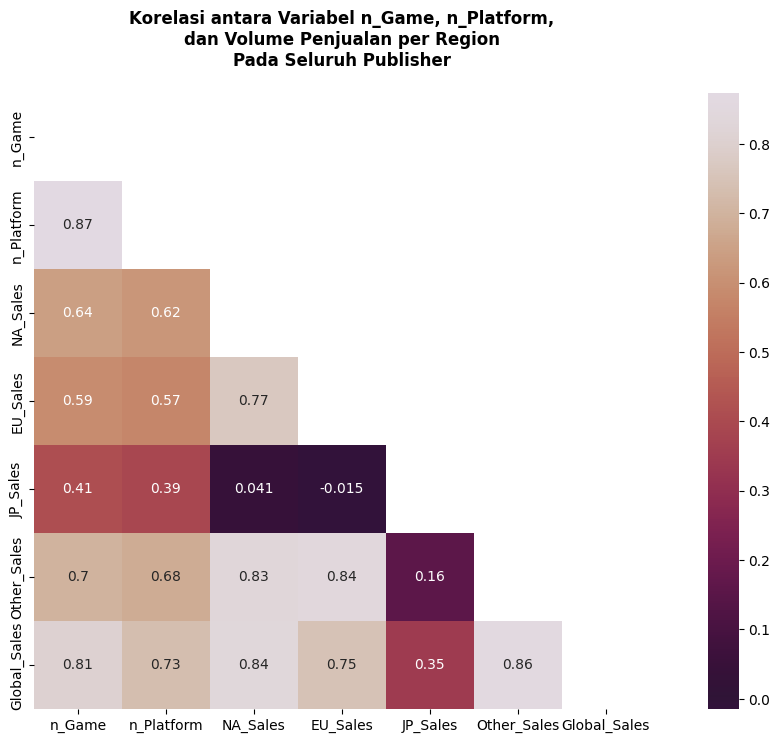

In [410]:
publisher_sales_all=publisher_sales.groupby('Publisher', as_index=False).agg({
    'Name':'count',
    'Platform':'nunique',
    'NA_Sales':'sum',
    'EU_Sales':'sum',
    'JP_Sales':'sum',
    'Other_Sales':'sum',
    'Global_Sales':'sum'})
publisher_sales_all.columns=['Publisher','n_Game','n_Platform','NA_Sales','EU_Sales',"JP_Sales","Other_Sales",'Global_Sales']

plt.figure(figsize=(15,8))
correlation=publisher_sales_all[['n_Game','n_Platform','NA_Sales','EU_Sales',"JP_Sales","Other_Sales",'Global_Sales']].corr(method='spearman')
matrix=np.triu(correlation)

sns.heatmap(data=correlation, annot=True, cmap='twilight',center=0, square=True, mask=matrix)

plt.title('Korelasi antara Variabel n_Game, n_Platform,\ndan Volume Penjualan per Region\nPada Seluruh Publisher', fontweight='bold',loc='center',pad=20)
plt.show()

>> | Value of Correlation Coeffficient | Relationship Interpretation |
>> | --- | --- |
>> | 0.000 - 0.199 | Very Weak |
>> | 0.200 - 0.399 | Weak |
>> | 0.400 - 0.599 | Moderate |
>> | 0.600 - 0.799 | Strong |
>> | 0.800 - 1.000 | Very Strong |

> **n_Game dan variabel lainnya:**

>> Dari heatmap tersebut, diketahui bahwa n_Game memiliki korelasi positif yang sangat kuat terhadap n_Platform (0.87) dan Global_Sales (0.81), artinya: bagi publisher secara keseluruhan, jumlah game yang dirilis  berpengaruh terhadap dengan jumlah platform yang tersedia dan volume penjualan global.
>>
>> n_game juga memiliki korelasi yang signifikan dengan NA_Sales (0.64), EU_Sales (0.59), dan Other_Sales(0.7) artinya: bagi publisher secara keseluruhan, jumlah game yang dirilis akan berpengaruh pada penjualan di pasar Amerika Utara, Eropa, dan pasar lainnya.

> **n_Platfom dan variabel lainnya:**

>> Dari heatmap tersebut, seperti yang dipaparkan sebelumnya, diketahui bahwa n_Platform memiliki korelasi yang sangat kuat terhadap n_Game. n_Platform juga memiliki korelasi yang kuat terhadp Global_Sales (0.73), artinya: bagi publisher secara keseluruhan, jumlah platform yang digunakan berpengaruh terhadap jumlah game yang di rilis oleh publisher dan volume penjualan secara global.
>>
>> n_platform memiliki korelasi yang lebih rendah namun masih kuat terhadap NA_Sales (0.62) dan Other_Sales (0.68), serta korelasi moderate terhadap EU_Sales (0.57). artinya: bagi publisher secara keseluruhan, jumlah platform yang tersedia juga berpengaruh terhadap penjualan di pasar Amerika Utara, Eropa, dan pasar lainnya.

> **Penjualan di pasar regional (NA_Sales, EU_Sales, Other_Sales) pada publisher secara keseluruhan:**

>> NA_Sales memiliki korelasi positif sangat kuat terhadap Global_Sales (0.84) dan Other_Sales (0.83), serta korelasi kuat terhadap EU_Sales (0.77), artinya: bagi publisher secara keseluruhan, volume penjualan di Amerika Utara berpengaruh terhadap volume penjualan global, penjualan lainnya, dan volume penjualan di Eropa.
>>
>> EU_Sales memiliki korelasi positif sangat kuat terhadap Other_Sales (0.84), artinya: bagi publisher secara keseluruhan, volume penjualan di Eropa berpengaruh terhadap volume penjualan pasar lainnya.
>>
>> Other_Sales memiliki korelasi positif sangat kuat terhadap Global_Sales (0.86), artinya: bagi publisher secara keseluruhan, volume penjualan di pasar lainnya selain (Amerika Utara dan Eropa) berpengaruh terhadap volume penjualan global.
>>
> **Penjualan di pasar Jepang (JP_Sales) pada publisher secara keseluruhan:**

>> JP_Sales memiliki korelasi dengan moderate terhadap n_Game (0.41) dan n_Platform (0.39), artinya: bagi publisher secara keseluruhan, volume penjualan di Jepang juga dipengaruhi oleh n_Game dan n_Platform namuan tidak terlalu kuat.
>>
>> JP_Sales memiliki korelasi variabel volume penjualan walaupun rendah Global_Sales (0.16), NA_Sales (0.041), EU (-0.015) dan Other_Sales (0.16), artinya: bagi publisher secara keseluruhan bahwa penjualan di Jepang tidak memiliki hubungan linier yang signifikan dengan variabel lainnya dalam dataset Anda.


> Berdasarkan heatmap yang terbentuk yang menyatakan bahwa terdapat korelasi antara n_Game dan n_Platform terhadap volume penjualan, dilakukan analisa perbandingan antara TOP 10 Publisher beserta informasi n_Game, n_Platform dan volume penjualan, yang ditampilkan pada tabel berikut:

In [411]:
# menampilkan Top 10 seluruh Publisher Berdasarkan Volume Penjualan Secara Global
publisher_sales_all=publisher_sales
sales =['Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]

dict_pub_sales_all={}

for col in sales:
    top_pub=publisher_sales_all.groupby('Publisher', as_index=False).sum().sort_values(col, ascending=False).head(10)
    dict_pub_sales_all[col]=top_pub['Publisher'].tolist()

result=pd.DataFrame(dict_pub_sales_all)
result['Rank']=[1,2,3,4,5,6,7,8,9,10]
result=result[['Rank','Global_Sales', 'NA_Sales', 'EU_Sales',"JP_Sales","Other_Sales"]]
result.columns=['Rank','TOP 10 Global', 'TOP 10 North America', 'TOP 10 Europe', 'TOP 10 Japan', 'TOP 10 Other']

global_all=result['TOP 10 Global'].unique()
# global_na=result['TOP 10 North America'].unique()
# global_eu=result['TOP 10 Europe'].unique()
# global_jp=result['TOP 10 Japan'].unique()
# global_ot=result['TOP 10 Other'].unique()

publisher_sales_all=publisher_sales.groupby('Publisher', as_index=False).agg({
    'Name':'count',
    'Platform':'nunique',
    'NA_Sales':'sum',
    'EU_Sales':'sum',
    'JP_Sales':'sum',
    'Other_Sales':'sum',
    'Global_Sales':'sum'})
publisher_sales_all.columns=['Publisher','n_Game','n_Platform','NA_Sales','EU_Sales',"JP_Sales","Other_Sales",'Global_Sales']
publisher_sales_all=publisher_sales_all[publisher_sales_all['Publisher'].isin(global_all)]
publisher_sales_all=publisher_sales_all.sort_values('Global_Sales', ascending=False)
publisher_sales_all

Publisher  n_Game  n_Platform  NA_Sales  EU_Sales  \
368                     Nintendo     705          10    816.30    416.40   
145              Electronic Arts    1348          19    593.62    370.66   
22                    Activision     977          20    428.17    214.62   
472  Sony Computer Entertainment     681           7    264.69    187.80   
545                      Ubisoft     933          19    254.85    162.67   
509         Take-Two Interactive     415          17    219.60    118.14   
503                          THQ     714          15    208.76     95.61   
283                       Konami     829          23     94.21     70.73   
459                         Sega     641          21    108.39     81.46   
355           Namco Bandai Games     929          23     70.58     42.81   

     JP_Sales  Other_Sales  Global_Sales  
368    457.06        95.37       1785.13  
145     14.18       130.00       1108.46  
22       6.55        75.40        724.74  
472     74.85        80.71        608.05  
545      9.77        50.56        477.85  
509      5.83        55.48        399.05  
503      5.01        32.56        341.94  
283     91.45        30.57        286.96  
459     57.10        24.52        271.47  
355    127.82        14.74        255.95

>Jika dilakukan perbandingan antara Publisher Nintendo dan Electronic Arts, maka didapatkan bahwa Electronic Arts memiliki n_Game dan n_Platform lebih tinggi dibandingkan Nintendo, namun berada di posisi kedua setelah Nintendo (dalam volume penjualan global), padahl pada heatmap, korelasi antara variabel tersebut positif sangat kuat. Oleh karena itu, dapat dikatakan bahwa terdapat faktor lain yang tidak ada dalam data, yang mempengaruhi ketiga variabel tersebut.

>
>Dari hasil heatmap korelasi Publisher keseluruhan, pertanyaan muncul serta volume penjualan Jepang. Seperti informasi yang telah dipaparkan sebelumnya, .jumlah Publisher asal Jepang merupakan jumlah terbanyak pada data. Namun, mengapa pada heatmap, nilai korelasi JP_Salesnya berada di moderate saja? Oleh karena itu, selanjutnya kami ingin mengetahui korelasi antara banyaknya game yang dirilis oleh setiap publisher per region, banyaknya platform yang di gunakan oleh setiap publisher per region, serta volume penjualan secara keseluruhan dan regional.

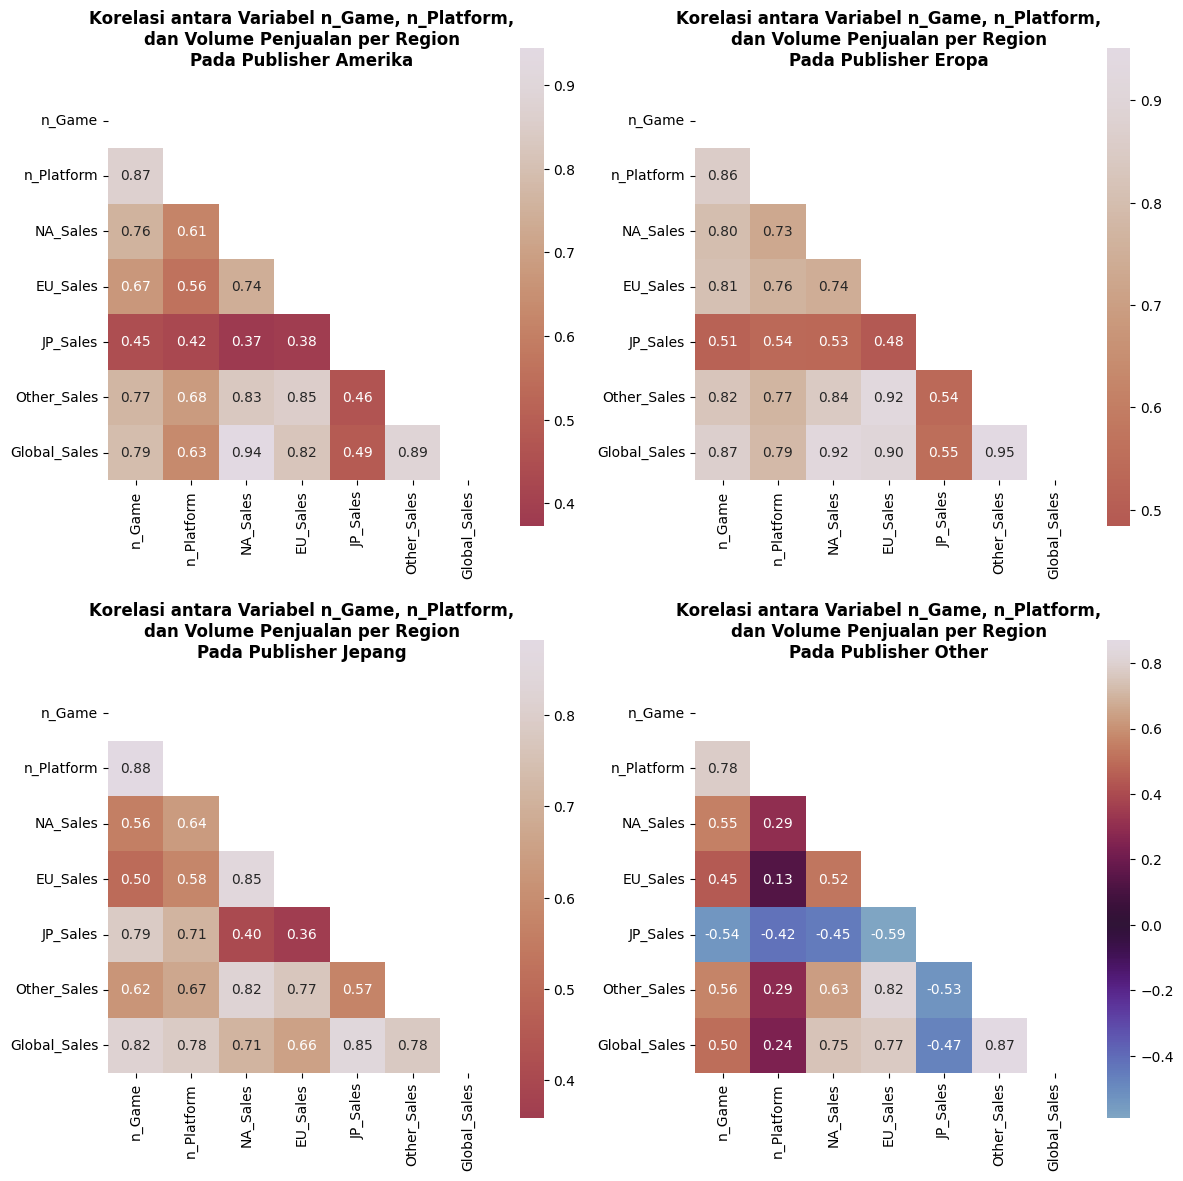

In [412]:
def plot_cor_heatmap(publisher_sales, origin, ax):
    publisher_sales_=publisher_sales[publisher_sales['Publisher_Origin']==origin]
    publisher_sales_=publisher_sales_.groupby('Publisher', as_index=False).agg({
        'Name':'count',
        'Platform':'nunique',
        'NA_Sales':'sum',
        'EU_Sales':'sum',
        'JP_Sales':'sum',
        'Other_Sales':'sum',
        'Global_Sales':'sum'})
    publisher_sales_.columns=['Publisher','n_Game','n_Platform','NA_Sales','EU_Sales',"JP_Sales","Other_Sales",'Global_Sales']

    correlation=publisher_sales_[['n_Game','n_Platform','NA_Sales','EU_Sales',"JP_Sales","Other_Sales",'Global_Sales']].corr(method='spearman')
    matrix=np.triu(correlation)

    sns.heatmap(data=correlation, annot=True, fmt='.2f',cmap='twilight',center=0, square=True, mask=matrix, ax=ax)
    ax.set_title(f'Korelasi antara Variabel n_Game, n_Platform,\ndan Volume Penjualan per Region\nPada Publisher {origin}', fontweight='bold',loc='center',pad=20)


fig,axs=plt.subplots(2,2,figsize=(12,12))

asal=['Amerika','Eropa','Jepang','Other']
for i, origin in enumerate(asal):
    plot_cor_heatmap(publisher_sales,origin, ax=axs[i//2,i%2])

plt.tight_layout()
plt.show()

>> | Value of Correlation Coeffficient | Relationship Interpretation |
>> | --- | --- |
>> | 0.000 - 0.199 | Very Weak |
>> | 0.200 - 0.399 | Weak |
>> | 0.400 - 0.599 | Moderate |
>> | 0.600 - 0.799 | Strong |
>> | 0.800 - 1.000 | Very Strong |

>**Publisher Amerika:**
>>n_Game dan n_Platform: berkorelasi sangat kuat (0.87), artinya: publisher Amerika cendrung merilis banyak game pada berbagai platform.
>>
>>Global_Sales: korelasi sangat kuat dengan variabel semua variabel selain JP_Sales.
>>
>**Publisher Eropa:**
>>n_Game dan n_Platform: berkorelasi sangat kuat (0.86), artinya: publisher Eropa cendrung merilis banyak game pada berbagai platform.
>>
>>Global_Sales: korelasi sangat kuat dengan variabel semua variabel selain JP_Sales.
>>
>**Publisher Jepang:**
>>n_Game dan n_Platform: berkorelasi sangat kuat (0.88), artinya: publisher Jepang cendrung merilis banyak game pada berbagai platform, yang berpengaruh pada volume penjualan di Jepang.
>>
>>Global_Sales: korelasi sangat kuat dengan variabel n_Game dan JP_Sales, artinya: volume penjualan global sangat dipengaruhi oleh jumlah game yang dirilis publisher Jepang dan volume penjualan Jepang.
>>
>>Publisher Jepang memiliki strategi yang fokus pada jumlah game yang besar dan dukungan platform yang luas, dengan volume penjualan global yang sangat dipengaruhi oleh kinerja market Jepang.
>>
>**Publisher lainnya:**
>>Korelasi secara umum lebih rendah dibandingkan dengan publisher Jepang, Amerika, dan Eropa untuk hampir semua hubungan antara n_Game, n_Platform, dan volume penjualan secara global dan regional. Korelasi dengan JP_Sales cendrung negatif, artinya: penjualan dari publisher lainnya tidak memiliki kolerasi
>>
>**Kesimpulan:**
>>Publisher Jepang, Amerika dan Eropa memiliki kecenderungan yang mirip dalam korelasi terhadap jumlah game, jumlah platform, volume penjualan global, namun publisher Jepang menunjukkan korelasi yang kuat terutama terkait dengan volume penjualan di Jepang.
>>
>>Publisher Amerika, Eropa, dan lainnya memiliki pola korelasi yang lebih rendah secara umum, dan khususnya memiliki korelasi negatif dengan volume penjualan di Jepang. Hal ini menunjukkan bahwa ada kemungkinan perbedaan strategi pemasaran atau preferensi pasar yang berbeda.
>>
>>Secara keseluruhan, korelasi yang tinggi antara jumlah game, jumlah platform, dan volume penjualan global menunjukkan pentingnya skala dan studi market dalam industri game global, sementara korelasi yang rendah antara publisher dari Amerika, Eropa, dan lainnya dengan penjualan di Jepang menunjukan bahwa ada tantangan tersendiri untuk memasuki pasar tersebut.

---
# _Kesimpulan_

> Dari data diketahui bahwa total volume penjualan global lebih dari 8,8 miliar unit game, dengan  49.22% volume penjualan North America (total volume penjualan: 4370,11 unit million), diikuti oleh 27.27%  volume penjualan Europe (total volume penjualan: 2421,5 unit million),  14.52%  volume penjualan  Japan (total volume penjualan: 1289,53 unit million), dan  8.98% volume penjualan region lainnya (total volume penjualan: 797,49 unit million), artinya: volume penjualan game di region North America lebih banyak dibandingkan dengan region lain. Namun, jika dianalisa lebih lanjut, berikut beberapa rekomendasi untuk menaikkan volume penjualan game secara keseluruhan maupun regional

>**Rekomendasi berdasarkan `Publisher` keseluruhan, `Platform`, dan `Genre` terbaik berdasarkan volume penjualan**

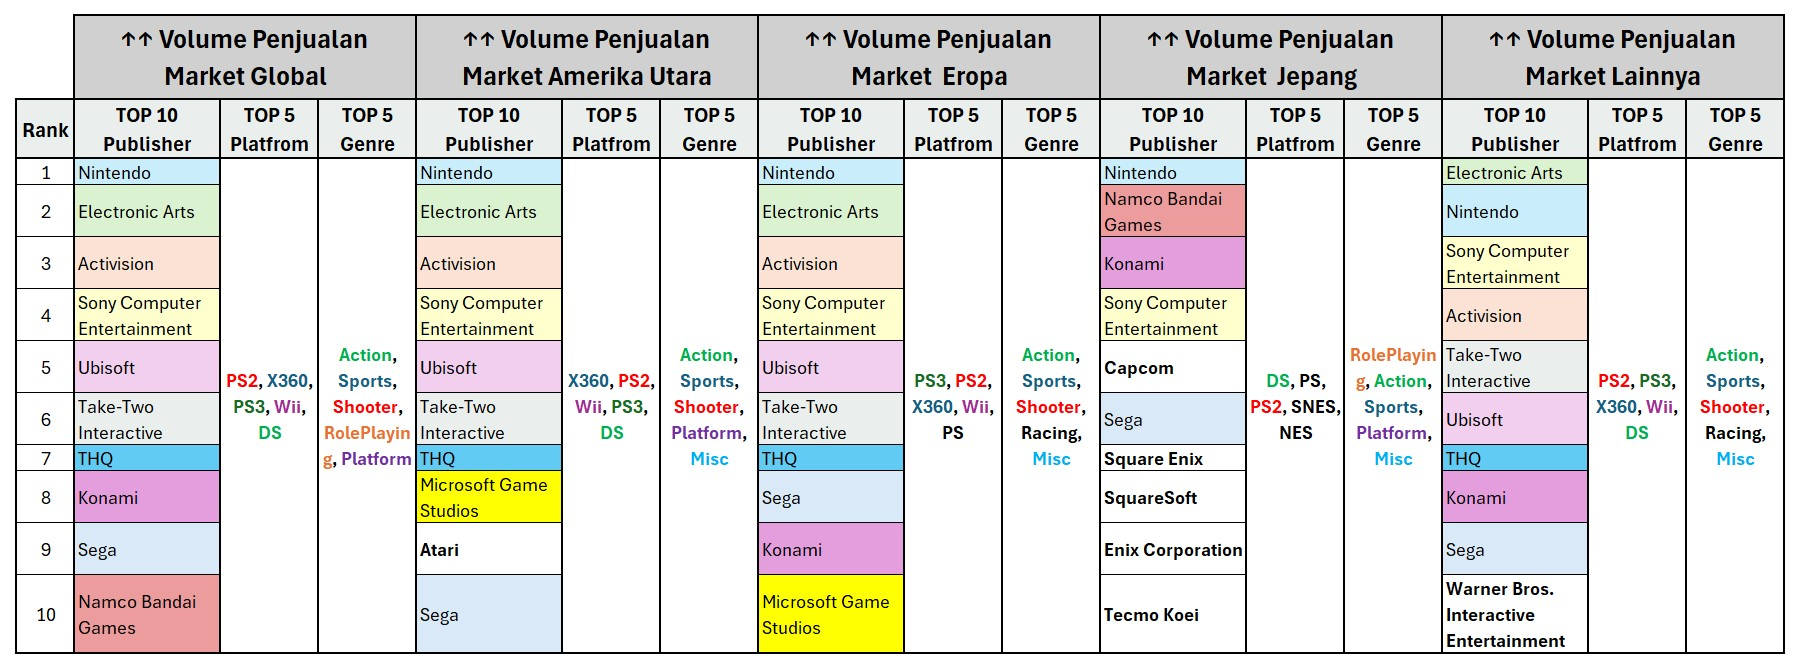

>> Tabel diatas menampilkan TOP 10 Publisher keseluruhan, dengan TOP 5 Platform dan TOP 5 Genre yang dituliskan secara berurutan ke samping berdasarkan rangking. Informasi pada tabel tersebut dapat menjadi acuan terhadap rekomendasi untuk mendapatkan volume penjualan secara global dan regional. Jadi, jika ingin memaksimalkan volume penjualan secara global, stakeholder dapat mempertimbangkan Publisher : Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft, Take-Two Interactive, THQ, Konami, Sega, dan Namco Bandai Games sebagai partner yang terdata sebagai 10 publisher dengan kontribusi terbesar terhadap volume penjualan global. Dengan mempertimbangkan menggunakan platform: PS2, X360, PS3, Wii, DS yang terdata sebagai 10 platform dengan kontribusi terbesar terhadap volume penjualan global. Selain itu stakeholder bisa mempertimbangkan untuk mengangkat genre: Action, Sports, Shooter, RolePlaying, Platform yang terdata sebagai 10 platform dengan kontribusi terbesar terhadap volume penjualan global. Begitupun untuk memaksimalkan volume penjualan secara regional, stakeholder dapat mempertimbangkan TOP 10 Publisher, TOP 5 Platform dan TOP 5 Genre yang tertera pada tabel di atas.
>>
>> Namun pada kolom volume penjualan market Jepang, terlihat bahwa **hanya** Publisher asal Jepang yang menjadi Top 10 Publisher yang berpengaruh terhadap volume penjualan di Jepang. Hal ini dapat menggambarkan bahwa adanya perbedaan regional mungkin dapat mempengaruhi, preferensi publisher, platform, serta genre.
>>
>> Untuk menguasai market Jepang, diperlukan Publisher yang memiliki platform atau game RPG yang kuat. Teknologi pada Platform DS dan PS yang terbukti populer di Jepang, dapat menjadi strategi untuk menaikkan volume penjualan di Jepang. Dengan demikian memanfaatkan preferensi lokal tersebut, publisher dan stakeholder dapat lebih baik untuk bersaing di pasar Jepang.

> **Rekomendasi berdasarkan dominasi pasar dari `Publisher` keseluruhan, `Platform`, dan `Genre` terbaik**

>>Dari tabel di atas, dilakukan pemetaan TOP Publisher , TOP Platform, dan TOP Genre terhadap kontribusi volume penjualan global dan regional tertinggi yang ditandai dengan tanda 'v'. Hal ini guna menggambarkan dominasi dari Publisher, Platform, serta Genre terhadap volume penjualan.
>>
>>Dominasi yang kuat dapat menggambarkan bahwa Publisher, Platform, ataupun Genre dapat menggambarkan bahwa adanya pengakuan akan Publisher, Platform, ataupun Genre tersebut terkenal secara luas di berbagai pasar. Selain itu dapat menggambarkan bahwa konsumen akan familiar dengan Publisher, Platform, ataupun Genre yang mendominasi pasar. Sehingga Publisher, Platform, ataupun Genre yang mendominasi dapat berkompetisi secara signifikan dengan pesaingnya baik dalam segi inovasi, strategi pemasaran, maupun kualitas produk. Namun pada konteks ini, dominasi Publisher, Platform, ataupun Genre berkompetisi dalam hal volume penjualan.

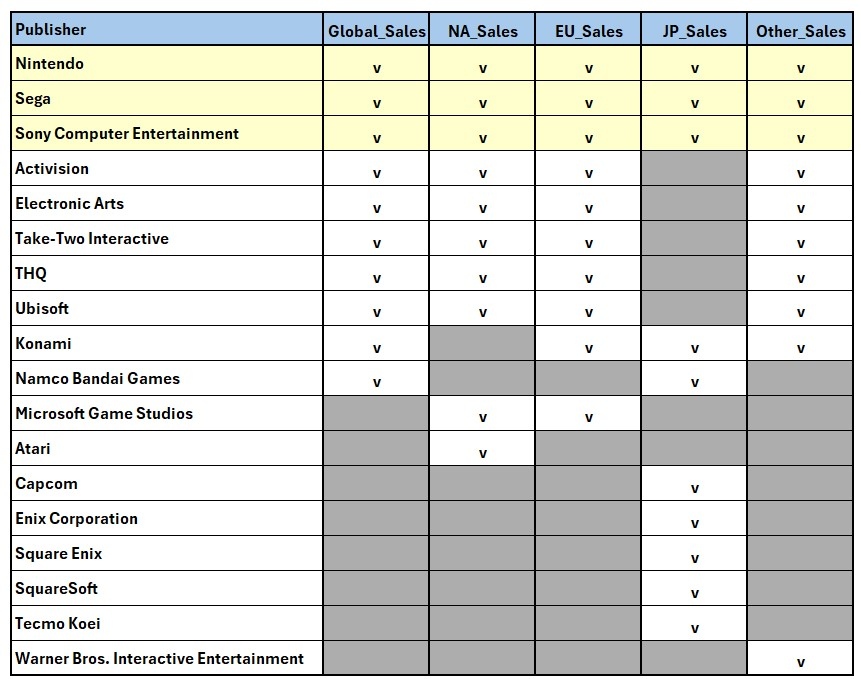

>> Dari tabel diatas, diketahui bahwa Publisher Nintendo, Sega, dan Sony Computer Entertainment yang mendominasi seluruh pasar. Sehingga, stakeholder dapat mempertimbangkan ketiga Publisher tersebut sebagai partner dari segi dominasi volume penjualan pasar global dan seluruh volume pasar regional.

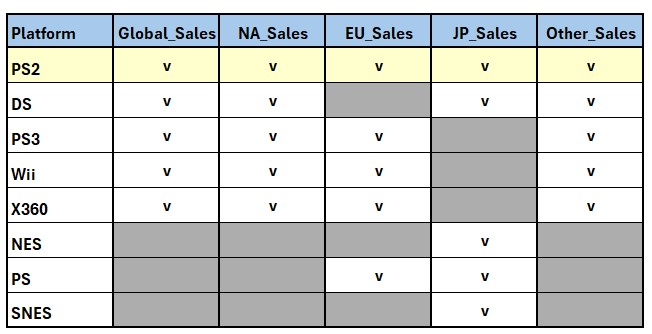

>> Dari tabel diatas, diketahui bahwa platform PS2 yang mendominasi seluruh pasar. Sehingga, stakeholder dapat mempertimbangkan platform PS2 tersebut sebagai partner dari segi dominasi volume penjualan pasar global dan seluruh volume pasar regional.

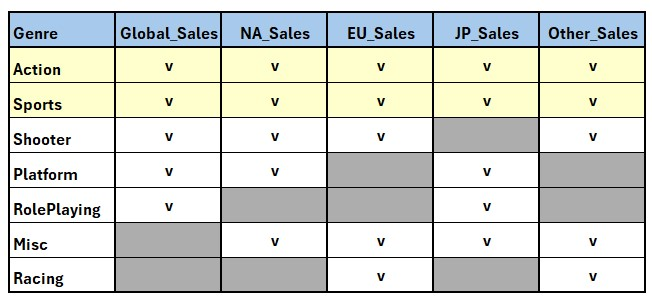

>> Dari tabel diatas, diketahui bahwa platform PS2 yang mendominasi seluruh pasar. Sehingga, stakeholder dapat mempertimbangkan platform PS2 tersebut sebagai partner dari segi dominasi volume penjualan pasar global dan seluruh volume pasar regional.

> Dari analisis yang telah dilakukan, dapat dibentuk kesimpulan serta rekomendasi untuk `Platform` permainan:
> 1. Penggunaan `Platform` yang berbeda akan berpengaruh terhadap volume penjualan permainan yang berlaku untuk seluruh region (North America, Europe, Japan, Other, dan Global)
> 2. Berdasarkan total volume penjualan, Top `Platform` untuk region North America, Europe, Japan, Other, dan Global secara berurutan adalah `X360`, `PS3`, `DS`, `PS2`, `PS2`
> 3. Terdapat korelasi **negatif cukup kuat** antara usia `Platform` dengan median volume penjualan secara global yang menandakan permainan yang dirilis lebih lama setelah platform diluncurkan cenderung memiliki median penjualan volume yang lebih rendah.
> 4. Platform `PC` memiliki performa yang lebih bagus dibanding platform `Console Based` berdasarkan performa berkepanjangan
> 5. Platform `Console Based` memiliki *golden time* untuk memperoleh volume penjualan yang tinggi, yaitu mem*publish* permainan pada range 0 hingga 5 tahun setelah platform release
> 6. Terdapat korelasi **positif sangat kuat** antara jumlah `Platform` yang digunakan untuk permainan yang sama dengan median volume penjualan secara global. Hal ini menandakan semakin banyaknya jumlah platform yang digunakan cenderung memiliki median penjualan volume yang lebih tinggi

> **REKOMENDASI UNTUK STAKEHOLDER**:
> 1. Sebaiknya pilih platform dengan umur yang tidak terlalu tua. Kami merekomendasikan di umur platform 0 hingga 5 tahun.
> 2. Sebaiknya pilih PC sebagai salah satu platform menimbang platform PC memiliki performa berkepanjangan yang lebih bagus dibanding platform Console Based
> 3. Sebaiknya pertimbangkan untuk mem*publish* permainan yang sama pada banyak platform yang berbeda

> **Rekomendasi berdasarkan `Publisher` asal Jepang, `Platform`, dan `Genre` terbaik berdasarkan volume penjualan**

>> Dari tabel rekomendasi berdasarkan `Publisher` keseluruhan, `Platform`, dan `Genre` terbaik berdasarkan volume penjualan sebelumnya, diketahui bahwa hanya Publisher Jepang yang berpengaruh terhadap top 10 volume penjualan di Jepang. Hal ini menunjukkan bahwa ada segmentasi dan strategi pasar tersendiri dari Publisher asal Jepang. Pada analisis data mengenai Publisher, diketahui bahwa jumlah Publisher asal Jepang yang terdata menjadi jumlah terbesar dibandingkan jumlah Publisher asal Amerika, Eropa, dan lainnya. Sehingga, stackholder bisa mempertimbangkan Publisher asal Jepang sebagai partner.
>>
>> Berikut merupakan rekomendasi Publisher asal Jepang, Platform, dan Genre terbaik berdasarkan volume penjualan secara global dan regional:

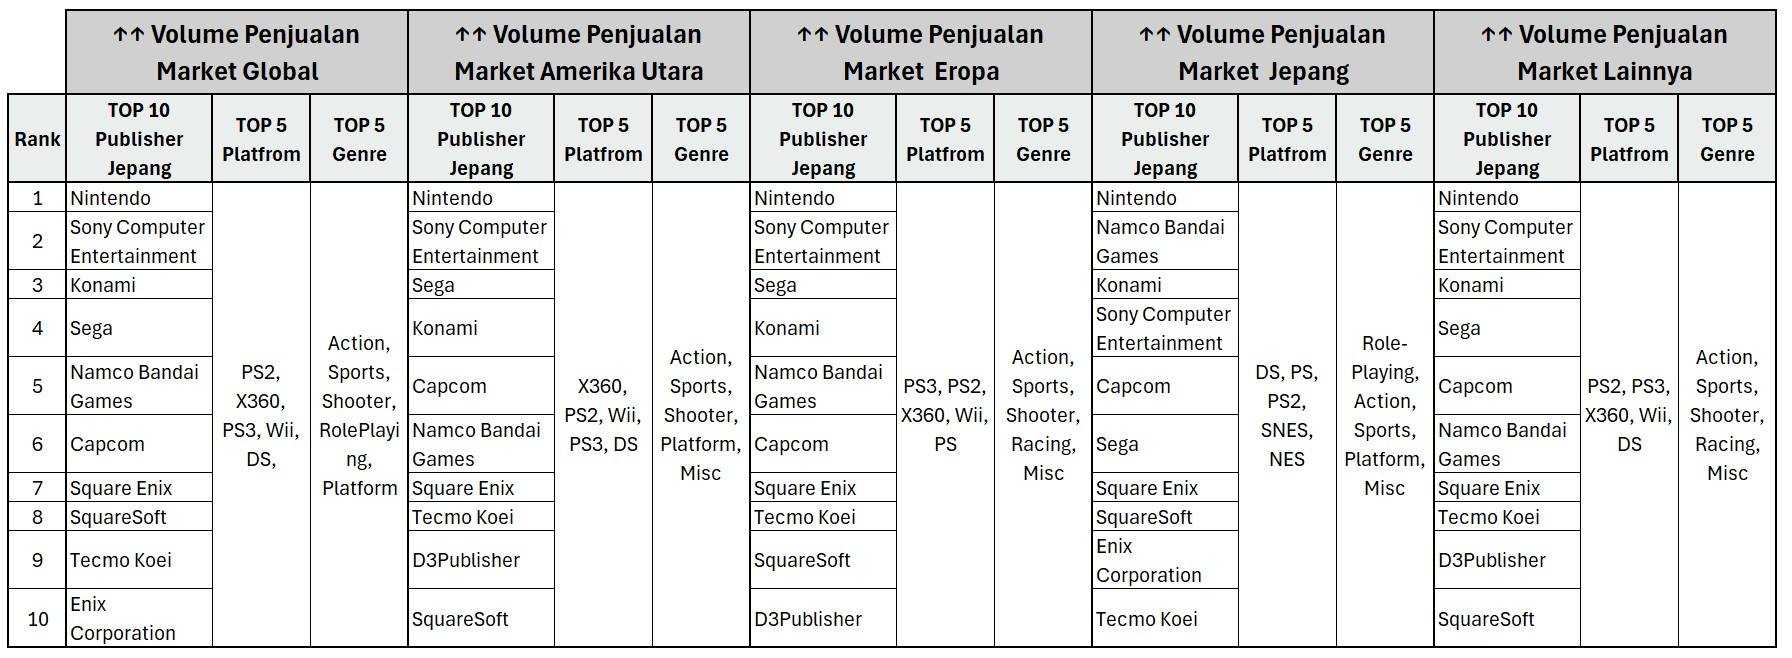

>> Tabel ini menunjukkan bahwa Nintendo merupakan Publisher asal Jepang yang dominan, yang dapat ditunjukkan dengan kehadirannya pada posisi pertama untuk semua market. Sehingga jika stackholder ingin menjadikan Nintendo sebagai partner Publisher, maka dampaknya akan positif bukan hanya ke market Jepang, namun market secara keseluruhan. Sedangkan untuk rekomendasi Platform yang akan dipakai dan serta Genre yang akan diangkat dapat disesuaikan seperti yang tertera pada tabel mengikuti hasil analisa Platform dan Genre terbaik untuk setiap pasarnya.